In [441]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, scale
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market and wants to know factors detemining the SalePrice of House in Australian Market and predominantly is looking for answers to below two questions:

    - Which variables are significant in predicting the price of a house, and

    - How well those variables describe the price of a house.

# Basic Data Understanding

In [442]:
housing_df = pd.read_csv('train.csv', na_values = "NAN")

In [443]:
print(housing_df.shape)
housing_df.head()

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [444]:
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [445]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [446]:
housing_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [447]:
housing = housing_df.copy()

# EDA

### Handling Missing Values in Features

In [448]:
irrelvant_features = list()
relevant_features = list()
irrelvant_features.append("Id")

In [449]:
def getMissingValueInfo(df):
    total = df.isnull().sum()
    percent = df.isnull().sum() * 100 / df.shape[0]
    missing_data_info = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data_info.sort_values(by='Total', ascending = False, inplace=True)
    return missing_data_info

In [450]:
print(getMissingValueInfo(housing).head(20))

              Total    Percent
PoolQC         1453  99.520548
MiscFeature    1406  96.301370
Alley          1369  93.767123
Fence          1179  80.753425
FireplaceQu     690  47.260274
LotFrontage     259  17.739726
GarageYrBlt      81   5.547945
GarageCond       81   5.547945
GarageType       81   5.547945
GarageFinish     81   5.547945
GarageQual       81   5.547945
BsmtFinType2     38   2.602740
BsmtExposure     38   2.602740
BsmtQual         37   2.534247
BsmtCond         37   2.534247
BsmtFinType1     37   2.534247
MasVnrArea        8   0.547945
MasVnrType        8   0.547945
Electrical        1   0.068493
Id                0   0.000000


In [451]:
# looking more deeply into the below features with missing values as they have higher % of missing values
# we will handle missing values in these first and then move on to others
# some the features here have NA which means unavailabilty of the feature like absence of pool

# other features have relatively small % of missing values and we can handle it by mode value imputation

def missing_val_column_uniques(df, missing_val_cols):
    for feature in top_missing_value_columns:
        print ("------------ "+ feature + " ------------")
        print (df[feature].unique())
        print ("--------------------------------")
        
top_missing_value_columns = ['PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', "Alley", "LotFrontage"]
missing_val_column_uniques(housing, top_missing_value_columns)

------------ PoolQC ------------
[nan 'Ex' 'Fa' 'Gd']
--------------------------------
------------ Fence ------------
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
--------------------------------
------------ MiscFeature ------------
[nan 'Shed' 'Gar2' 'Othr' 'TenC']
--------------------------------
------------ FireplaceQu ------------
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
--------------------------------
------------ Alley ------------
[nan 'Grvl' 'Pave']
--------------------------------
------------ LotFrontage ------------
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 

- Lot Frontage is a numerical value and imputing median or mode to this feature seems not apt
- on imputing with mean and median we see a distplot which peaks at the imputed value
- hence dropping this feature

In [452]:
irrelvant_features.append("LotFrontage")
top_missing_value_columns.remove("LotFrontage")

In [453]:
#out of the remaining missing value features the below again have NULL as a special meaning of the feature not present
null_to_none_features = ['PoolQC', 'Fence', "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",  "GarageType", "GarageFinish", "GarageQual", "GarageCond", 'MiscFeature', 'FireplaceQu', "Alley"]
for feature in null_to_none_features:
    housing[feature].fillna("None", inplace=True)

In [454]:
print(getMissingValueInfo(housing).head(6))

             Total    Percent
LotFrontage    259  17.739726
GarageYrBlt     81   5.547945
MasVnrType       8   0.547945
MasVnrArea       8   0.547945
Electrical       1   0.068493
KitchenQual      0   0.000000


In [455]:
# handling columns for missing values ["GarageYrBlt", "MasVnrType", "MasVnrArea"]
housing["GarageYrBlt"].fillna(housing["GarageYrBlt"].median(), inplace=True)
housing["MasVnrArea"].fillna(housing["MasVnrArea"].median(), inplace=True)
housing["MasVnrType"].fillna("None", inplace=True)

In [456]:
print(getMissingValueInfo(housing).head(6))

              Total    Percent
LotFrontage     259  17.739726
Electrical        1   0.068493
BedroomAbvGr      0   0.000000
GarageYrBlt       0   0.000000
GarageType        0   0.000000
FireplaceQu       0   0.000000


- dropping the row in 'Electrical' as only one row is missing

In [457]:
print(irrelvant_features)
housing.drop(irrelvant_features, axis=1, inplace=True)
housing.dropna(inplace=True)

['Id', 'LotFrontage']


In [458]:
print(getMissingValueInfo(housing).head(6))

              Total  Percent
MSSubClass        0      0.0
KitchenAbvGr      0      0.0
GarageYrBlt       0      0.0
GarageType        0      0.0
FireplaceQu       0      0.0
Fireplaces        0      0.0


In [459]:
housing.head(10)

MSSubClass MSZoning  LotArea Street Alley LotShape LandContour Utilities  \
0          60       RL     8450   Pave  None      Reg         Lvl    AllPub   
1          20       RL     9600   Pave  None      Reg         Lvl    AllPub   
2          60       RL    11250   Pave  None      IR1         Lvl    AllPub   
3          70       RL     9550   Pave  None      IR1         Lvl    AllPub   
4          60       RL    14260   Pave  None      IR1         Lvl    AllPub   
5          50       RL    14115   Pave  None      IR1         Lvl    AllPub   
6          20       RL    10084   Pave  None      Reg         Lvl    AllPub   
7          60       RL    10382   Pave  None      IR1         Lvl    AllPub   
8          50       RM     6120   Pave  None      Reg         Lvl    AllPub   
9         190       RL     7420   Pave  None      Reg         Lvl    AllPub   

  LotConfig LandSlope  ... PoolArea PoolQC  Fence MiscFeature MiscVal  MoSold  \
0    Inside       Gtl  ...        0   None   None        None       0       2   
1       FR2       Gtl  ...        0   None   None        None       0       5   
2    Inside       Gtl  ...        0   None   None        None       0       9   
3    Corner       Gtl  ...        0   None   None        None       0       2   
4       FR2       Gtl  ...        0   None   None        None       0      12   
5    Inside       Gtl  ...        0   None  MnPrv        Shed     700      10   
6    Inside       Gtl  ...        0   None   None        None       0       8   
7    Corner       Gtl  ...        0   None   None        Shed     350      11   
8    Inside       Gtl  ...        0   None   None        None       0       4   
9    Corner       Gtl  ...        0   None   None        None       0       1   

   YrSold  SaleType  SaleCondition SalePrice  
0    2008        WD         Normal    208500  
1    2007        WD         Normal    181500  
2    2008        WD         Normal    223500  
3    2006        WD        Abnorml    140000  
4    2008        WD         Normal    250000  
5    2009        WD         Normal    143000  
6    2007        WD         Normal    307000  
7    2009        WD         Normal    200000  
8    2008        WD        Abnorml    129900  
9    2008        WD         Normal    118000  

[10 rows x 79 columns]

In [460]:
print(getMissingValueInfo(housing).head(10))

              Total  Percent
MSSubClass        0      0.0
KitchenAbvGr      0      0.0
GarageYrBlt       0      0.0
GarageType        0      0.0
FireplaceQu       0      0.0
Fireplaces        0      0.0
Functional        0      0.0
TotRmsAbvGrd      0      0.0
KitchenQual       0      0.0
BedroomAbvGr      0      0.0


### Univariate, Bivariate and multivariate Analysis

In [461]:
def get_segregated_columns_by_type(df):
    num_cols = list()
    cat_cols = list()
    
    num_cols = list(df.select_dtypes(include=['int64', 'float64']).columns)
    cat_cols = list(df.select_dtypes(include='object').columns)
    return num_cols, cat_cols

numeric_columns, categorical_columns = get_segregated_columns_by_type(housing)

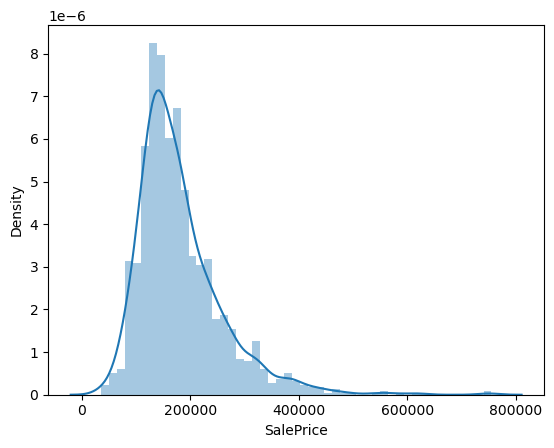

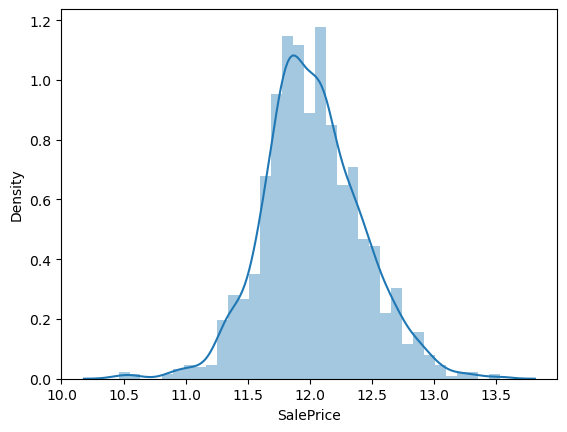

In [462]:
sns.distplot(housing['SalePrice'])
plt.show()
sns.distplot(np.log(housing['SalePrice']))
plt.show()

- We see a normal bult right skewed distribution of SalePrice (target variable)
- log transformation of the target variable 'SalePrice' gives us a more normal distribution to work with

In [463]:
housing['TransformedSalePrice'] = np.log(housing['SalePrice'])

In [464]:
numeric_columns

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

The below features though numerical, some represent nominal some ordinal categorical variables and some just numbers like no. of bats. These need to be checked with box plot

- OverallQual
- OverallCond
- YearBuilt
- YearRemodAdd
- BsmtFullBath
- BsmtHalfBath
- FullBath
- HalfBath
- BedroomAbvGr
- KitchenAbvGr
- TotRmsAbvGrd
- GarageYrBlt
- MiscVal
- MoSold
- YrSold

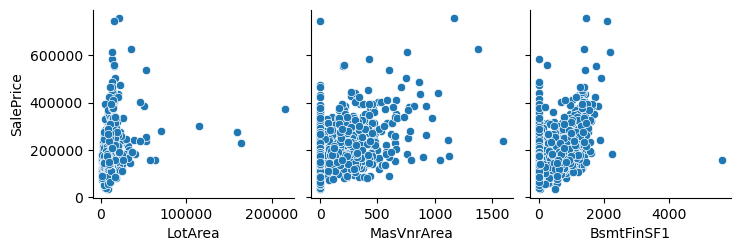

In [465]:
scatter_plot_features = ['LotArea', 'MasVnrArea','BsmtFinSF1',
                         'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                         '1stFlrSF', '2ndFlrSF', 'GrLivArea', 
                         'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                         'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
                         'PoolArea']

sns.pairplot(data=housing, x_vars=scatter_plot_features[0:3], y_vars=['SalePrice'])
plt.show()

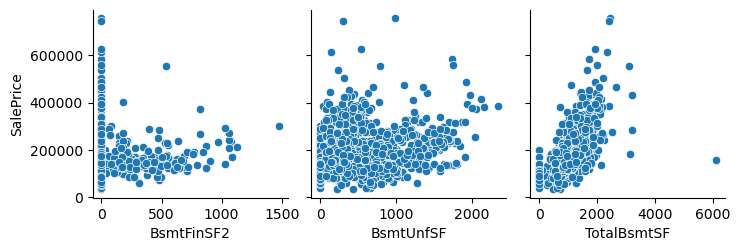

In [466]:
sns.pairplot(data=housing, x_vars=scatter_plot_features[3:6], y_vars=['SalePrice'])
plt.show()

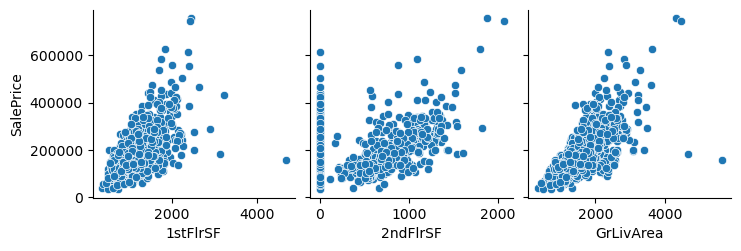

In [467]:
sns.pairplot(data=housing, x_vars=scatter_plot_features[6:9], y_vars=['SalePrice'])
plt.show()

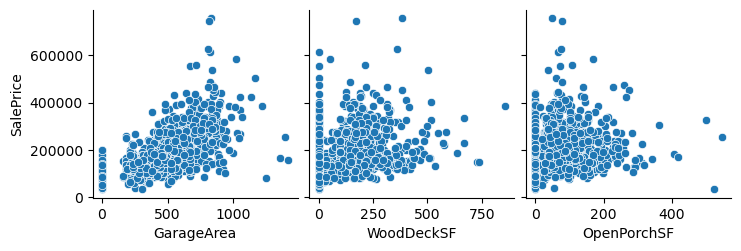

In [468]:
sns.pairplot(data=housing, x_vars=scatter_plot_features[9:12], y_vars=['SalePrice'])
plt.show()

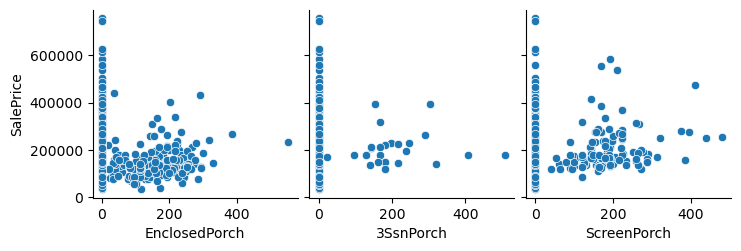

In [469]:
sns.pairplot(data=housing, x_vars=scatter_plot_features[12:15], y_vars=['SalePrice'])
plt.show()

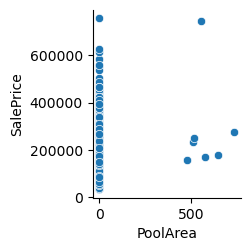

In [470]:
sns.pairplot(data=housing, x_vars=scatter_plot_features[15:], y_vars=['SalePrice'])
plt.show()

We see we have some linear relations and some scatter plots show non-linear relation

In [471]:
box_plot_numeric_columns = list(set(numeric_columns) - set(scatter_plot_features))
box_plot_numeric_columns.remove('SalePrice')
box_plot_numeric_columns

['YrSold',
 'GarageCars',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'MoSold',
 'LowQualFinSF',
 'KitchenAbvGr',
 'OverallCond',
 'FullBath',
 'HalfBath',
 'MSSubClass',
 'BsmtHalfBath',
 'MiscVal',
 'OverallQual',
 'BsmtFullBath',
 'BedroomAbvGr',
 'YearBuilt',
 'YearRemodAdd',
 'Fireplaces']

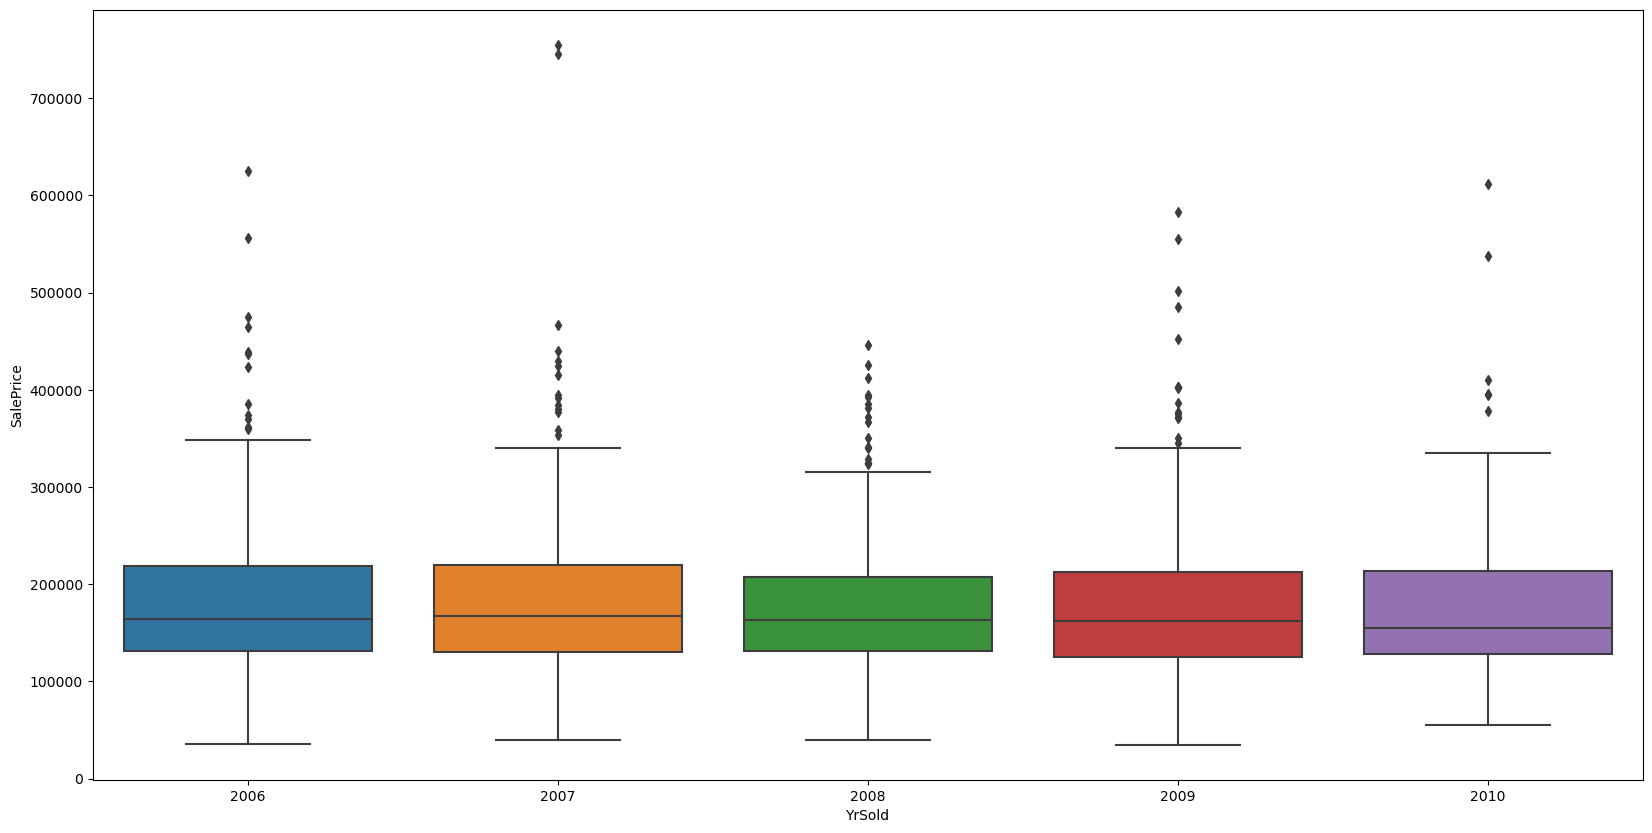

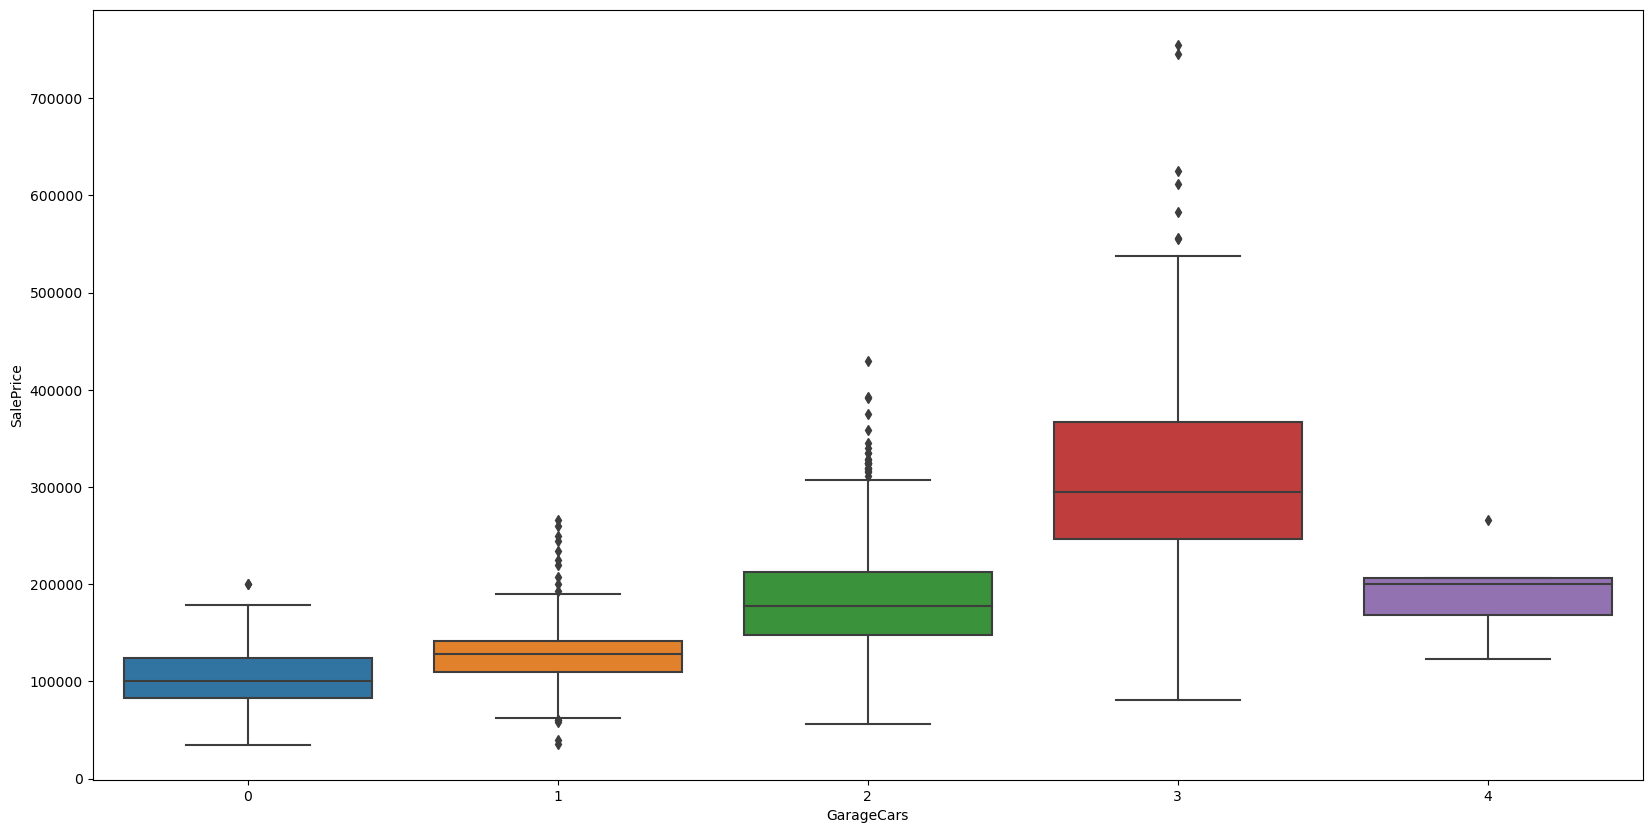

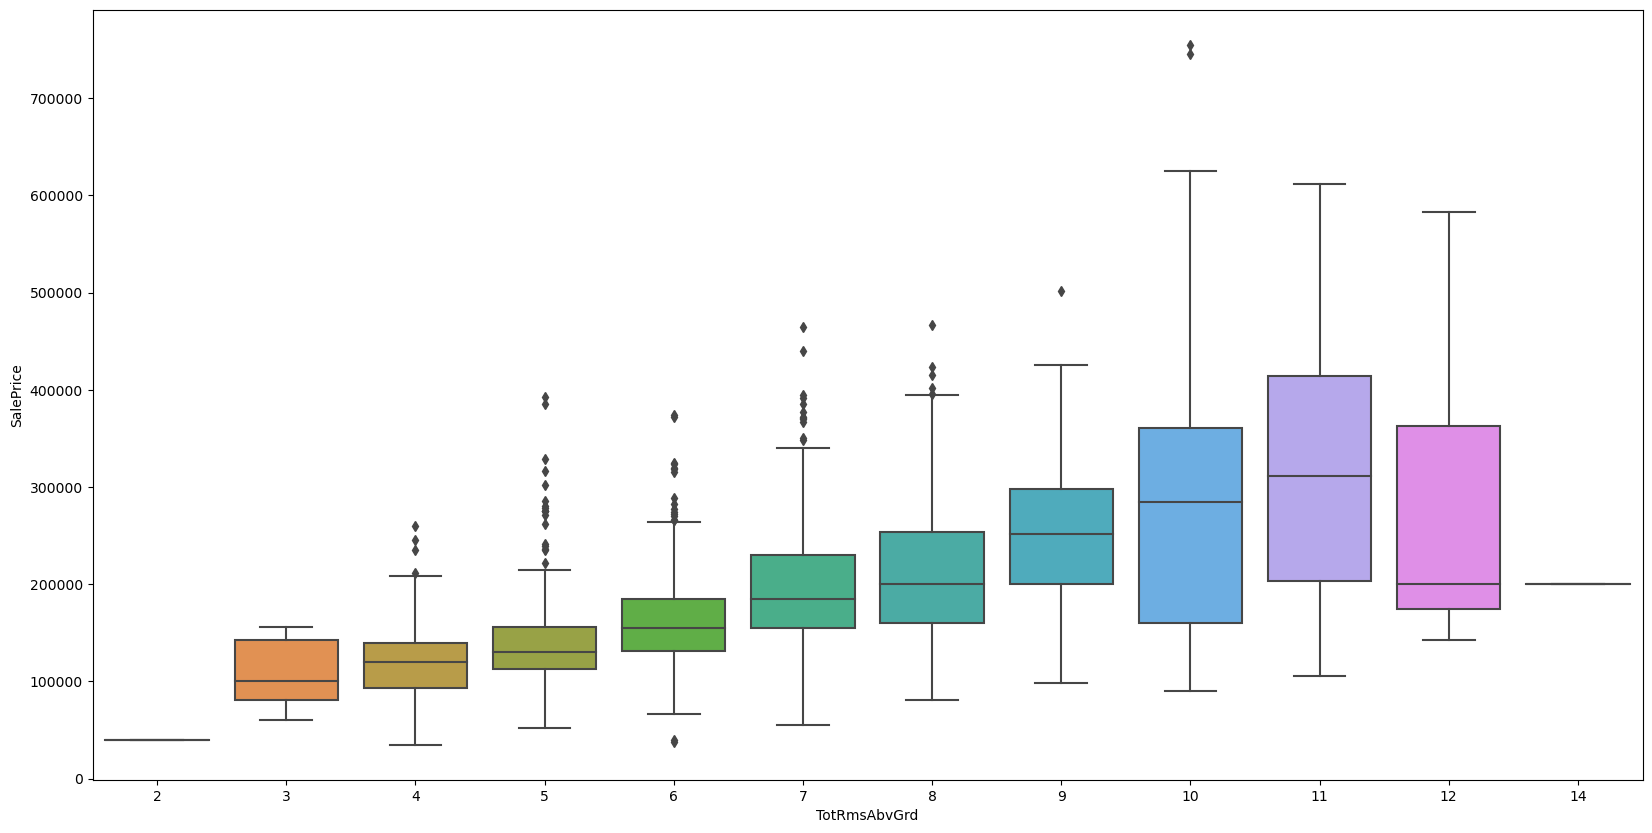

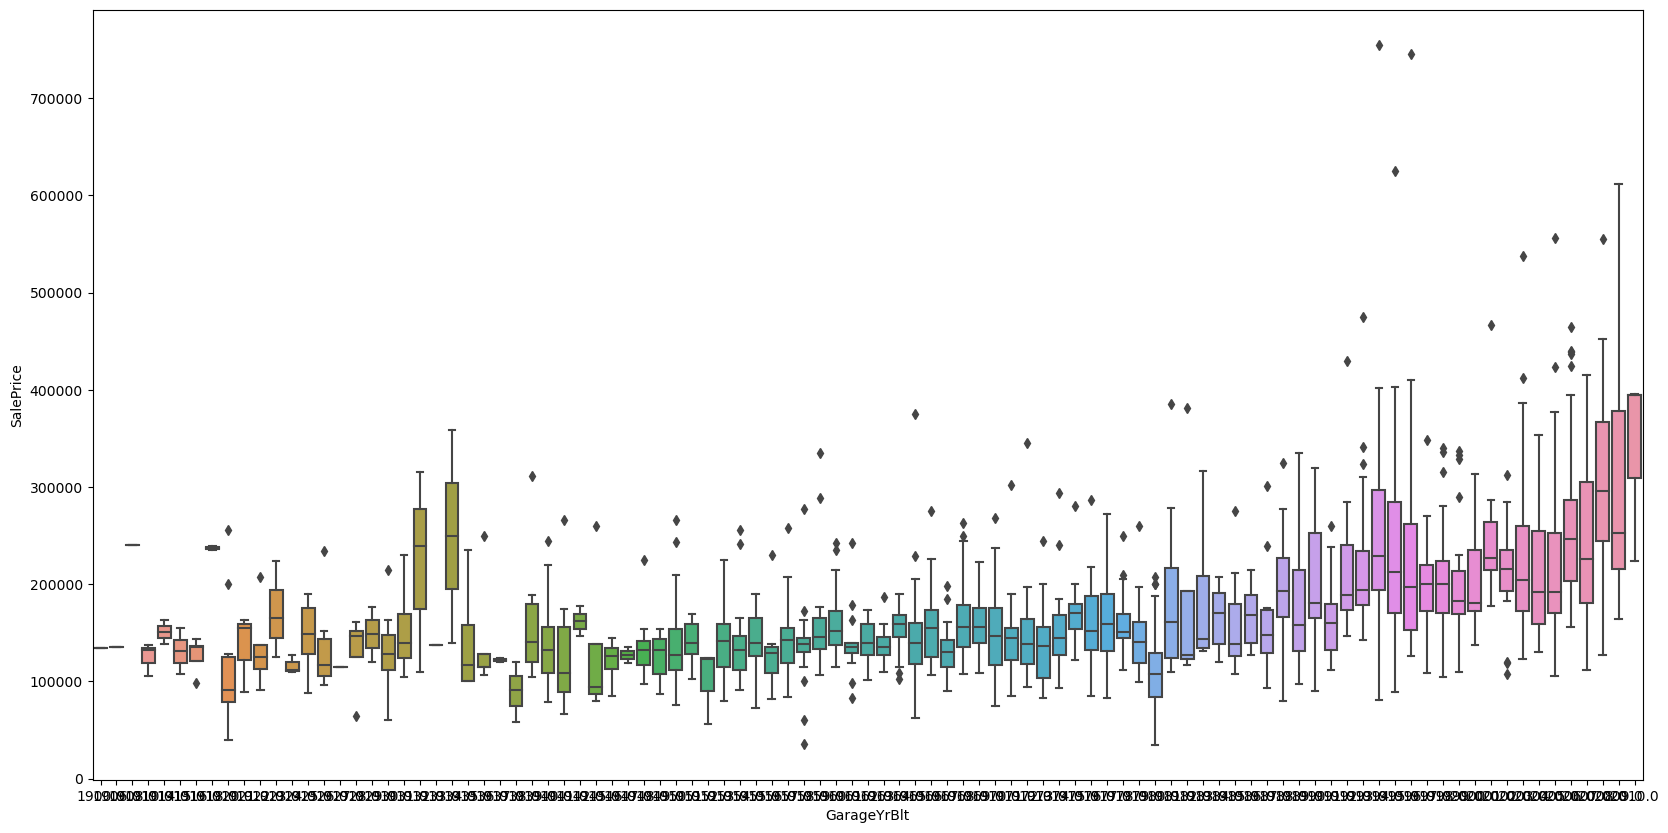

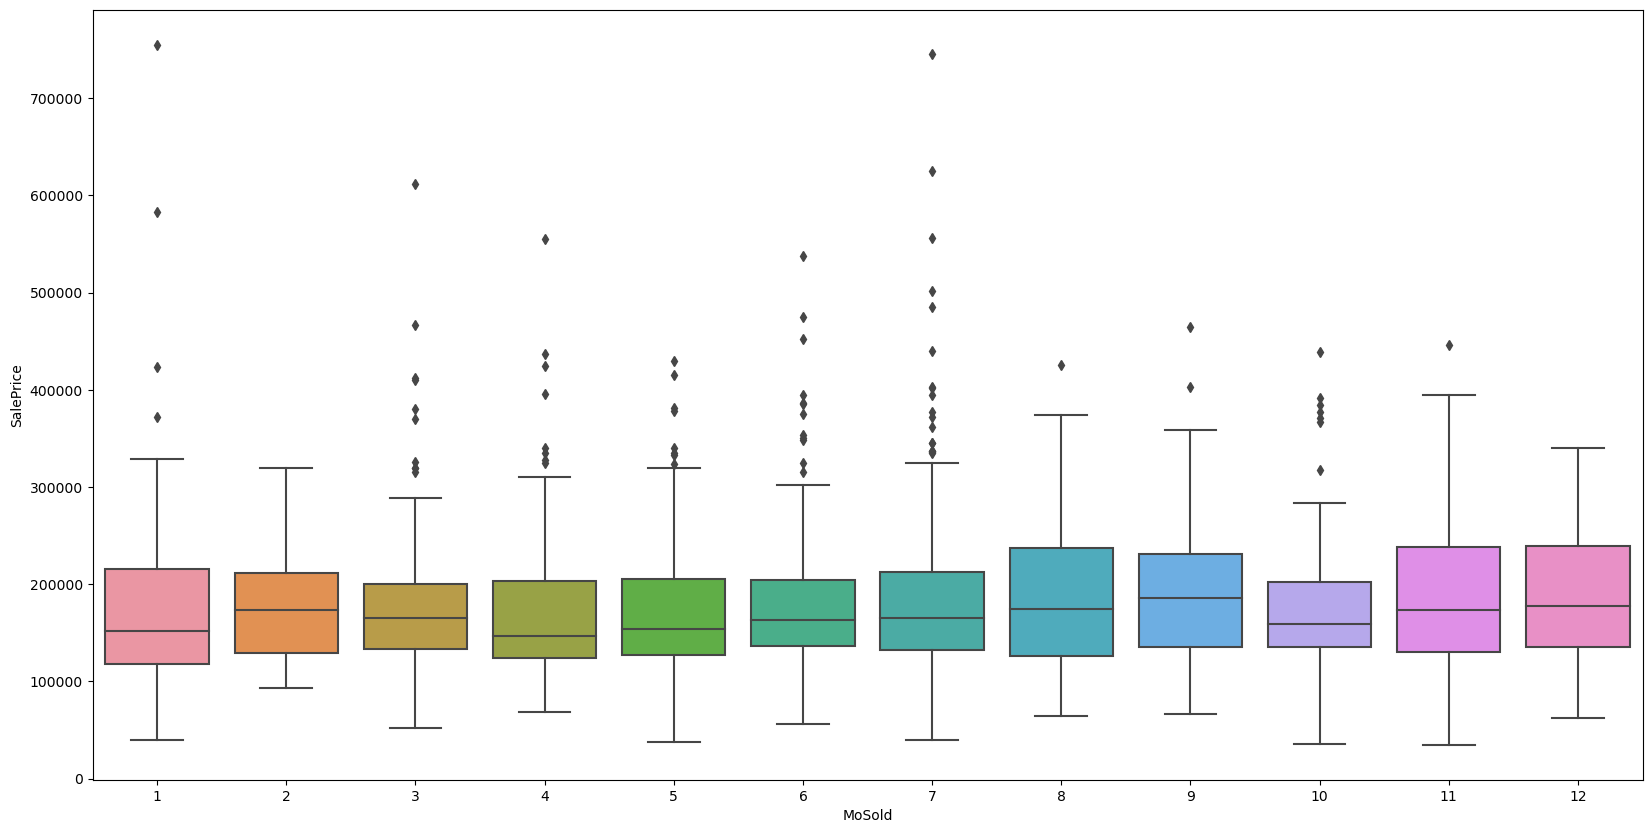

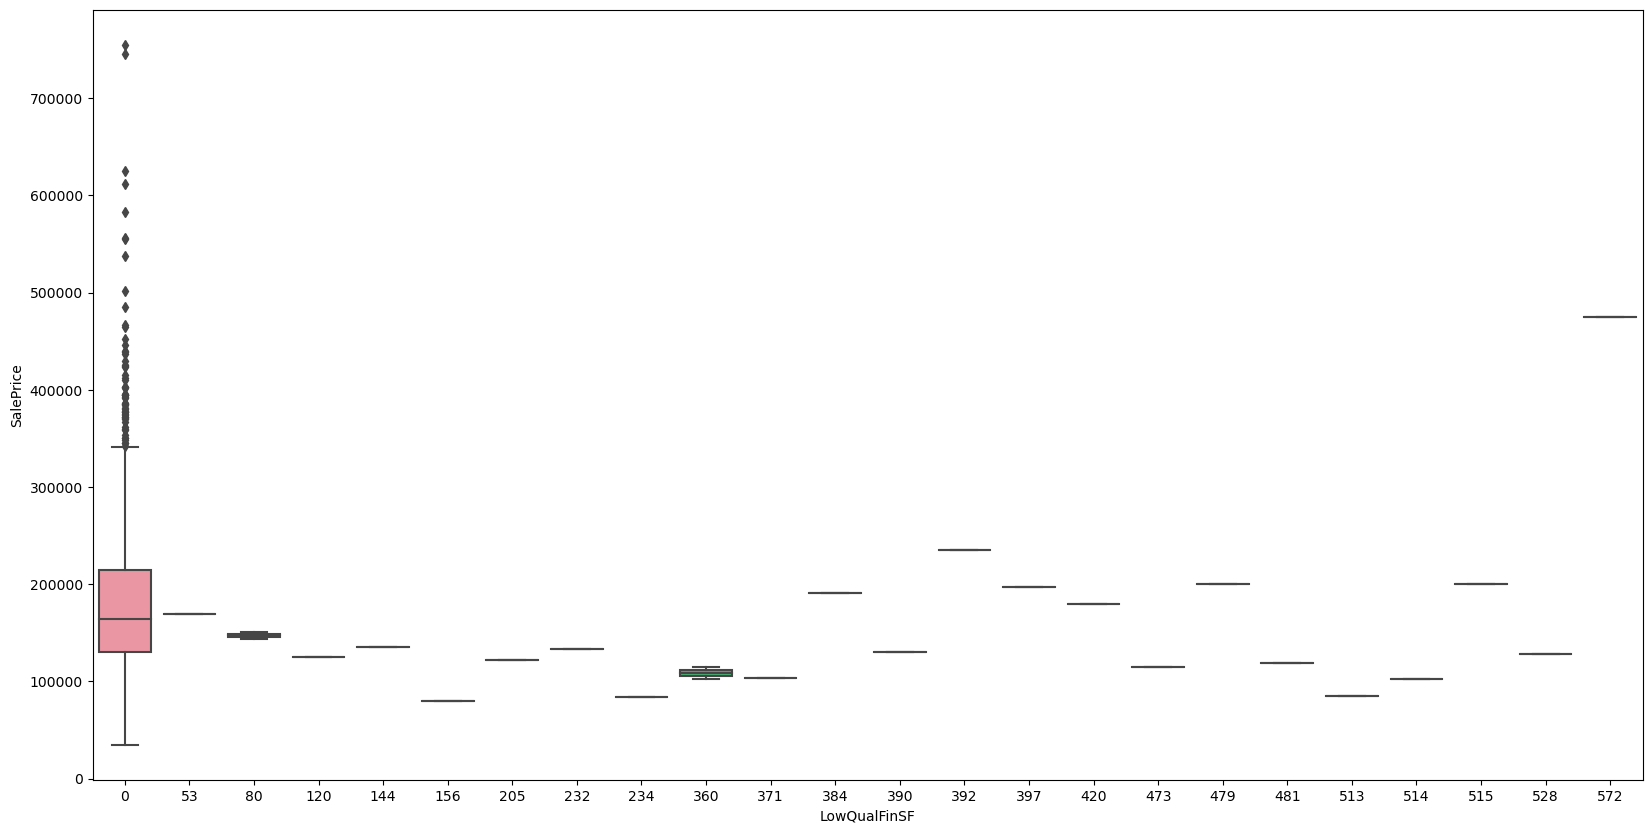

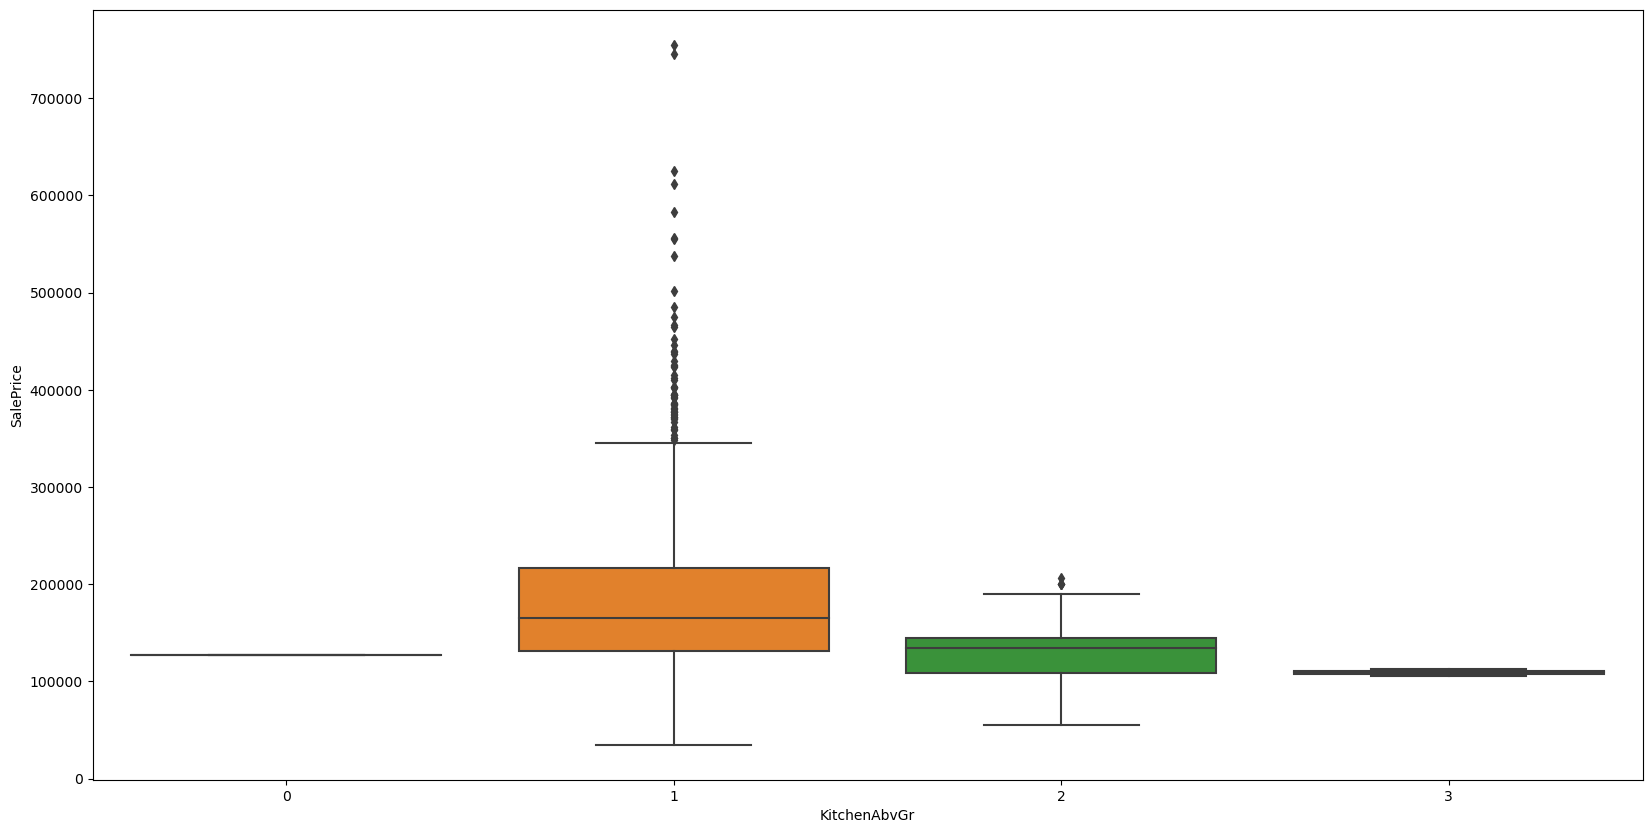

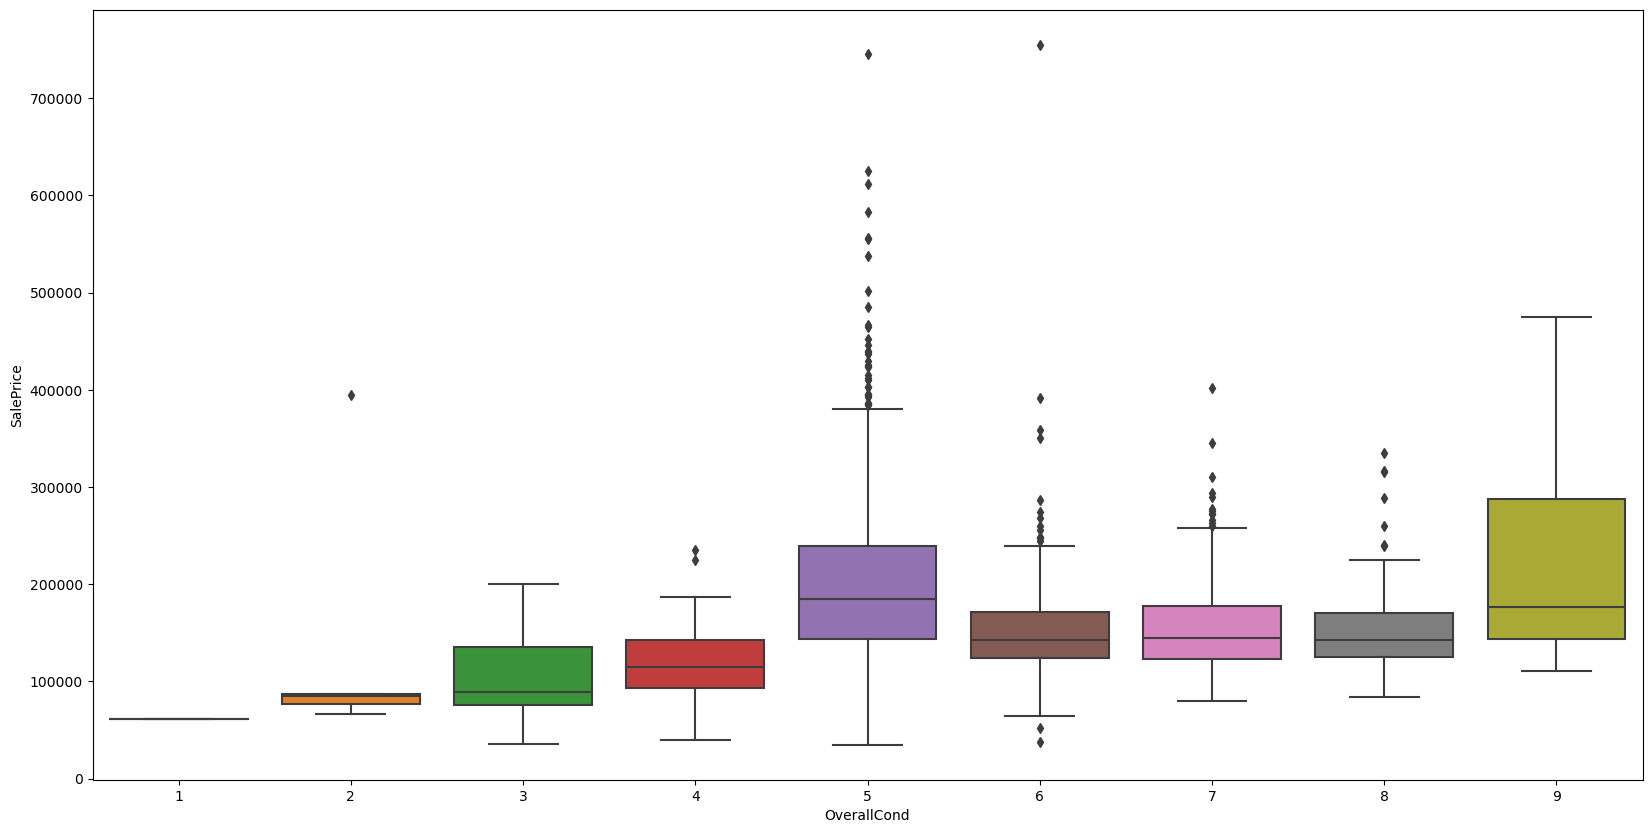

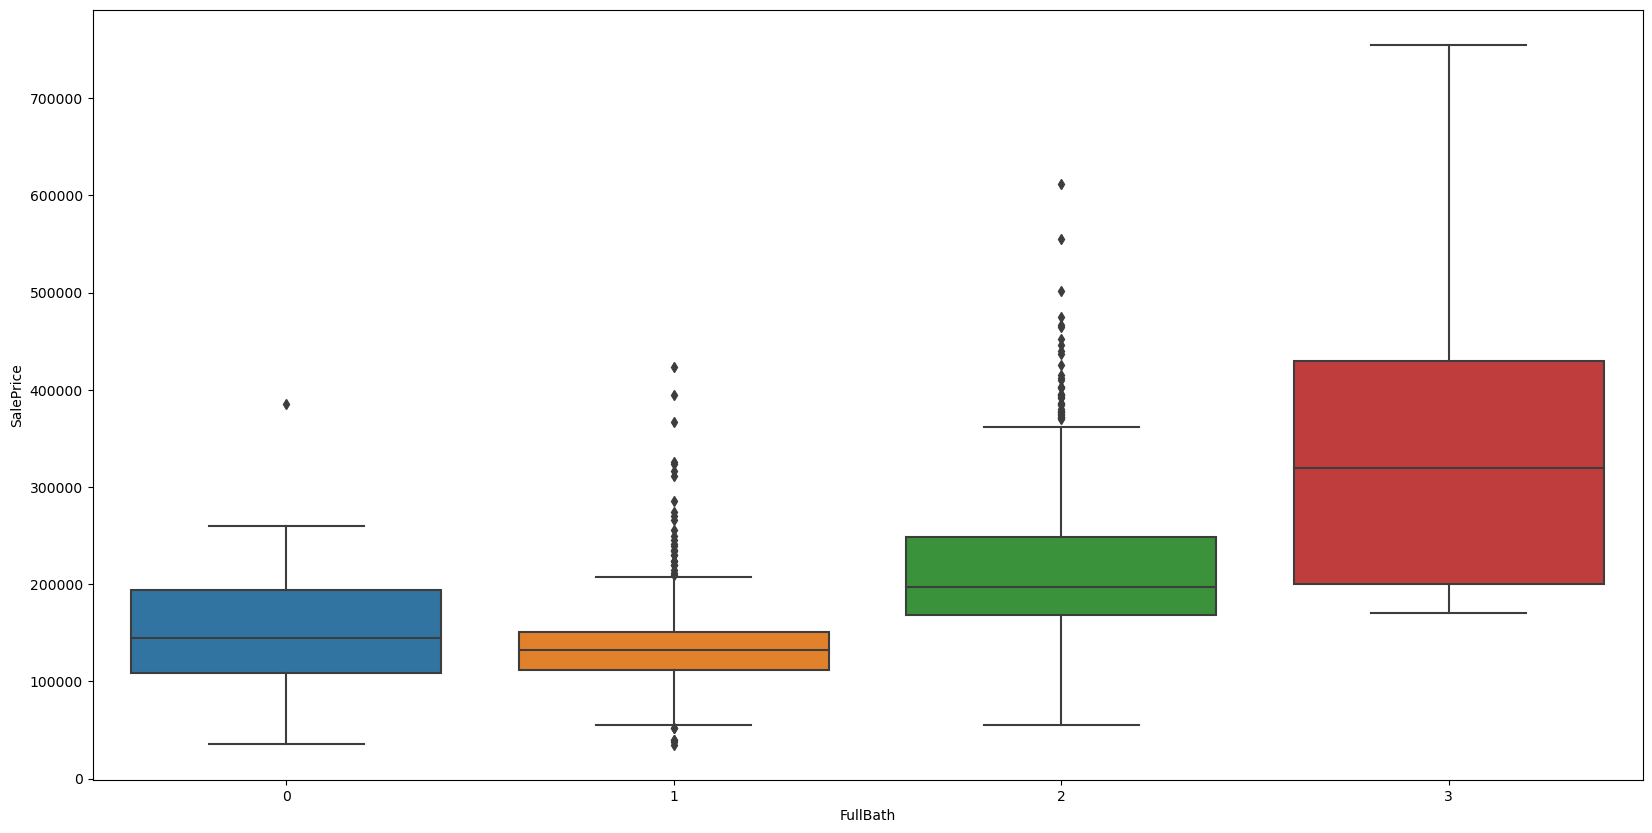

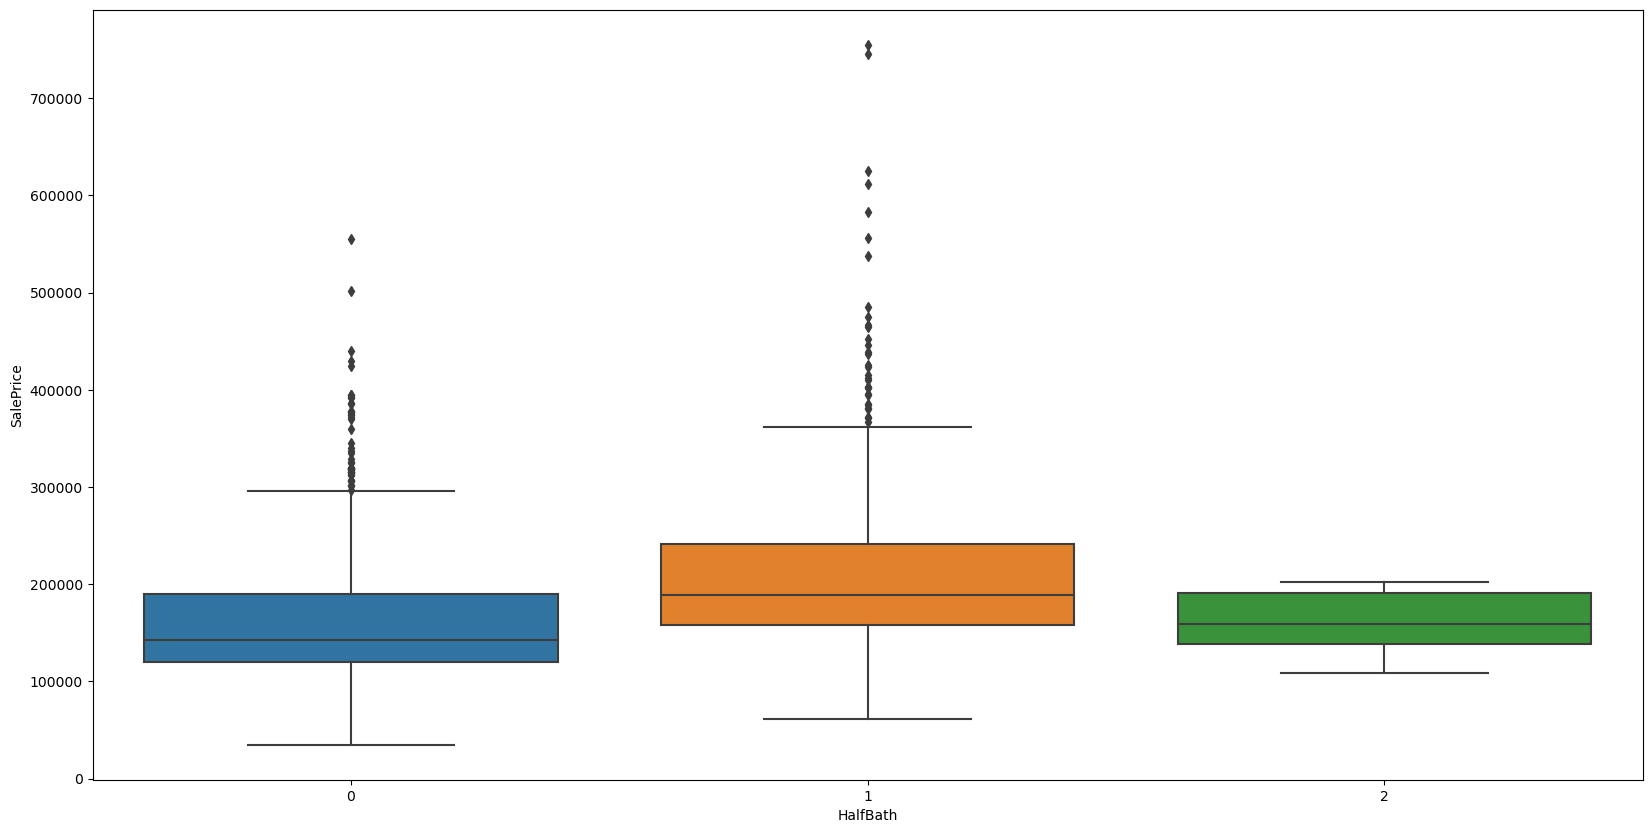

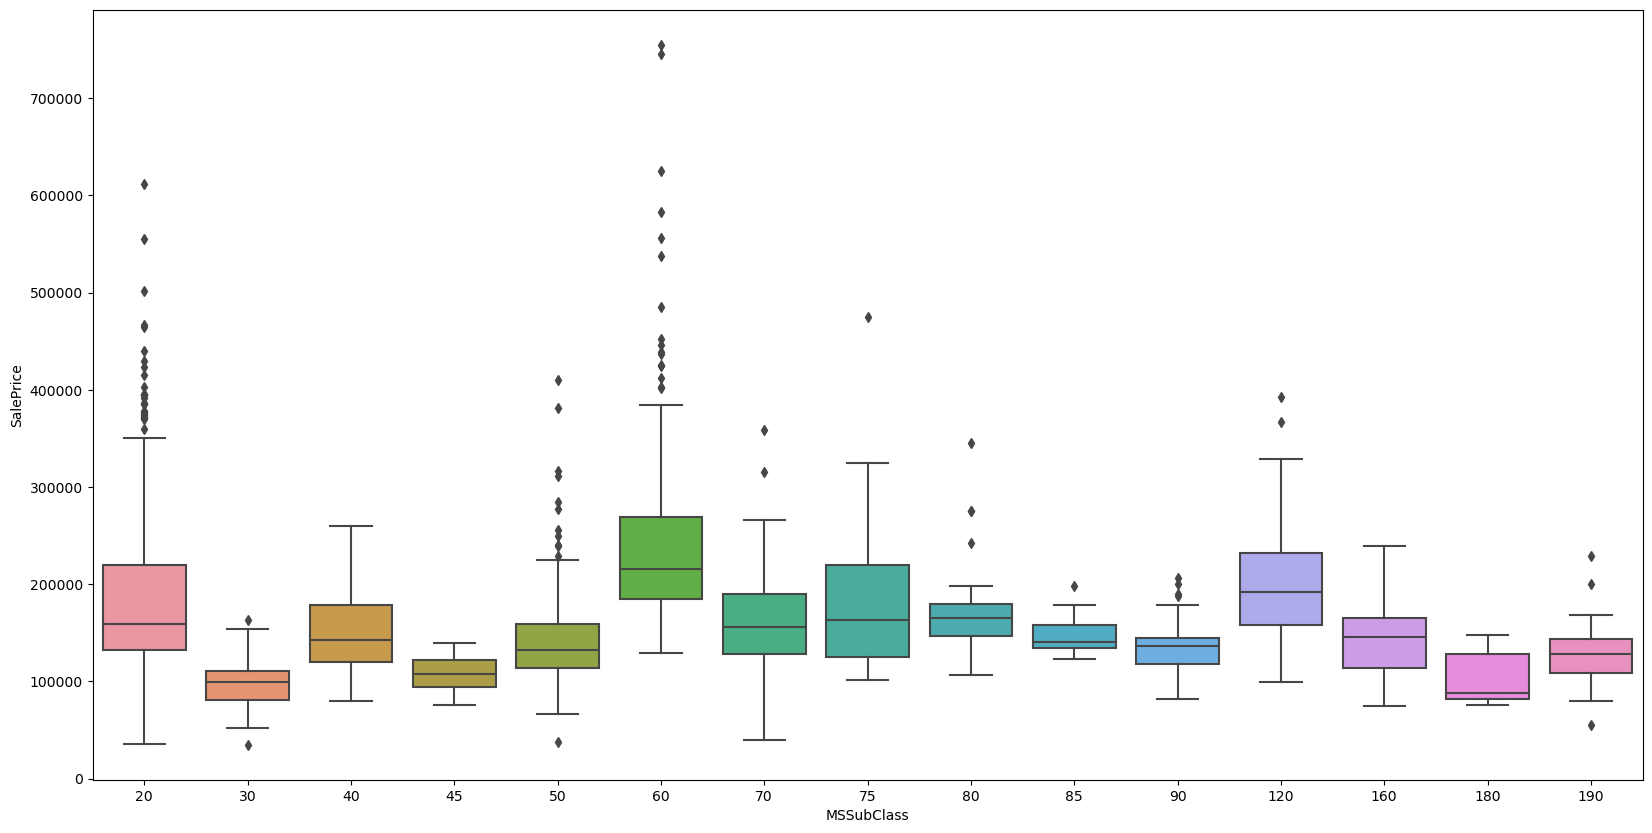

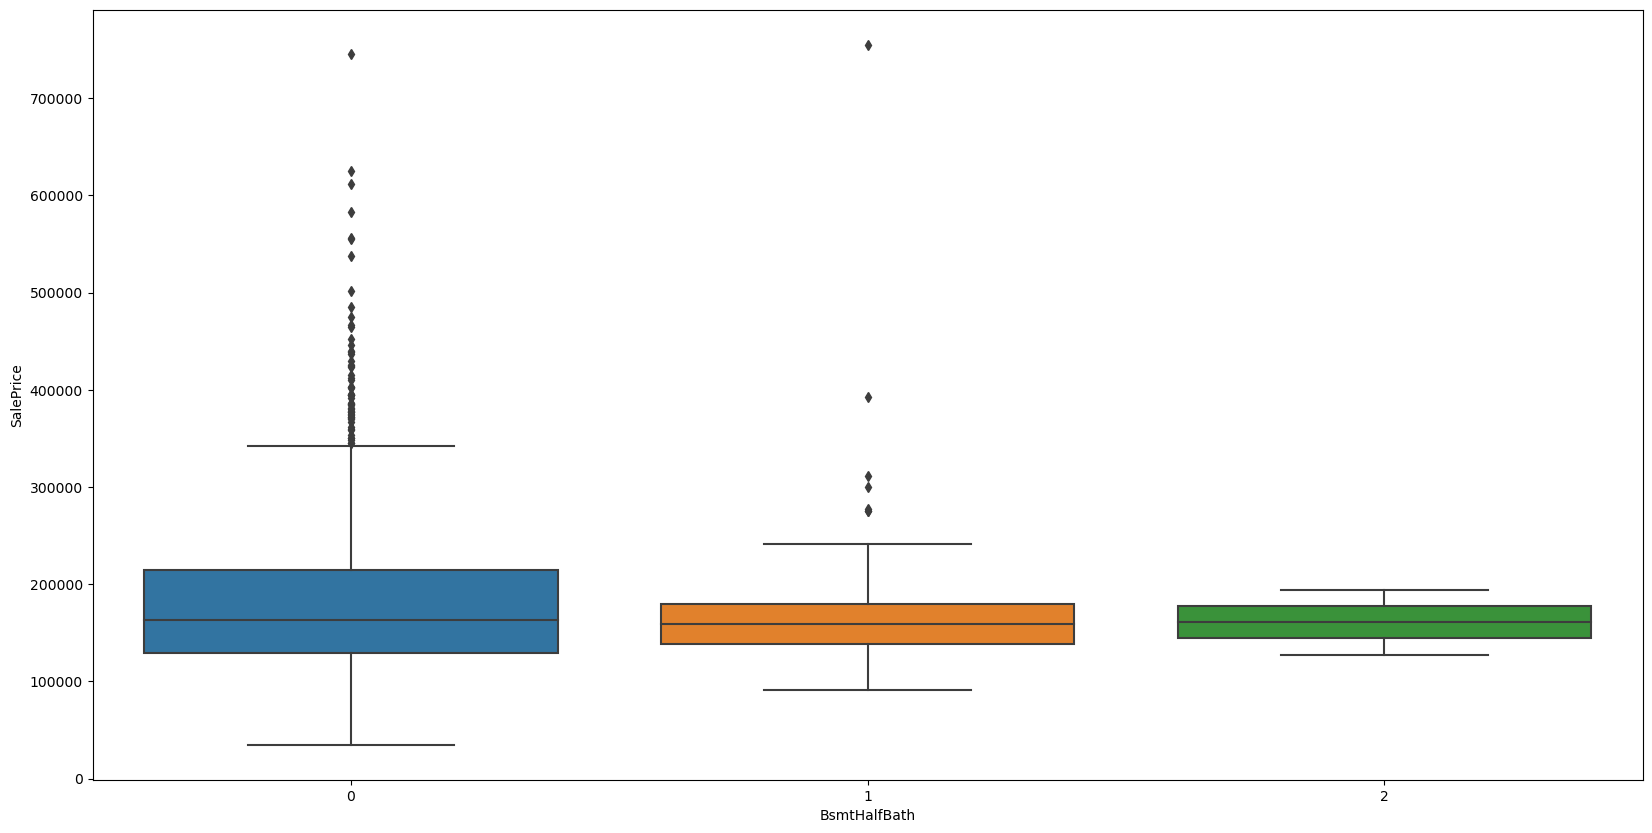

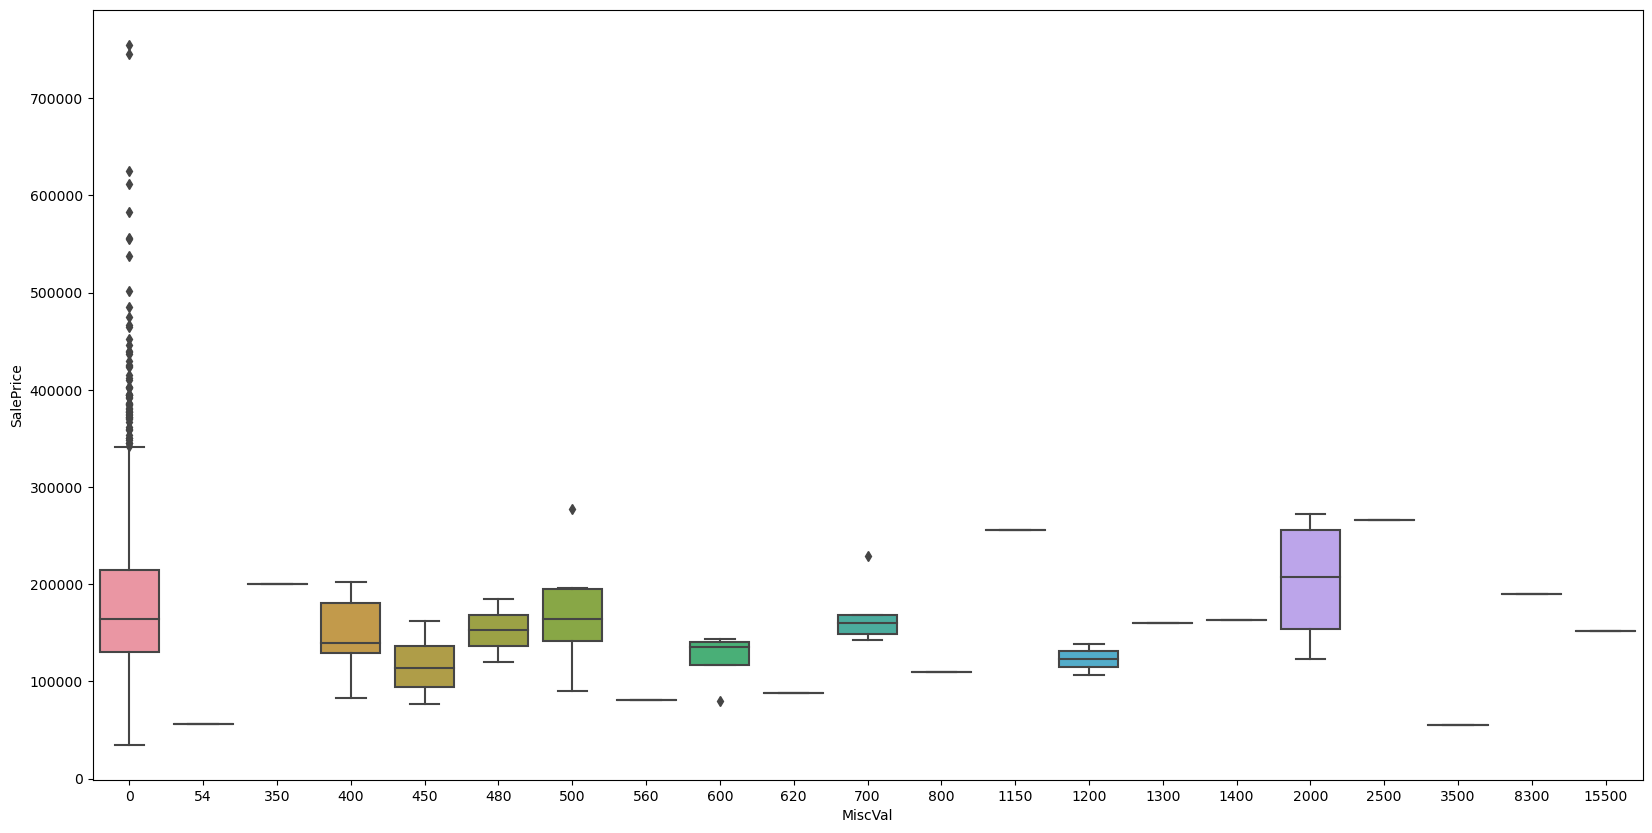

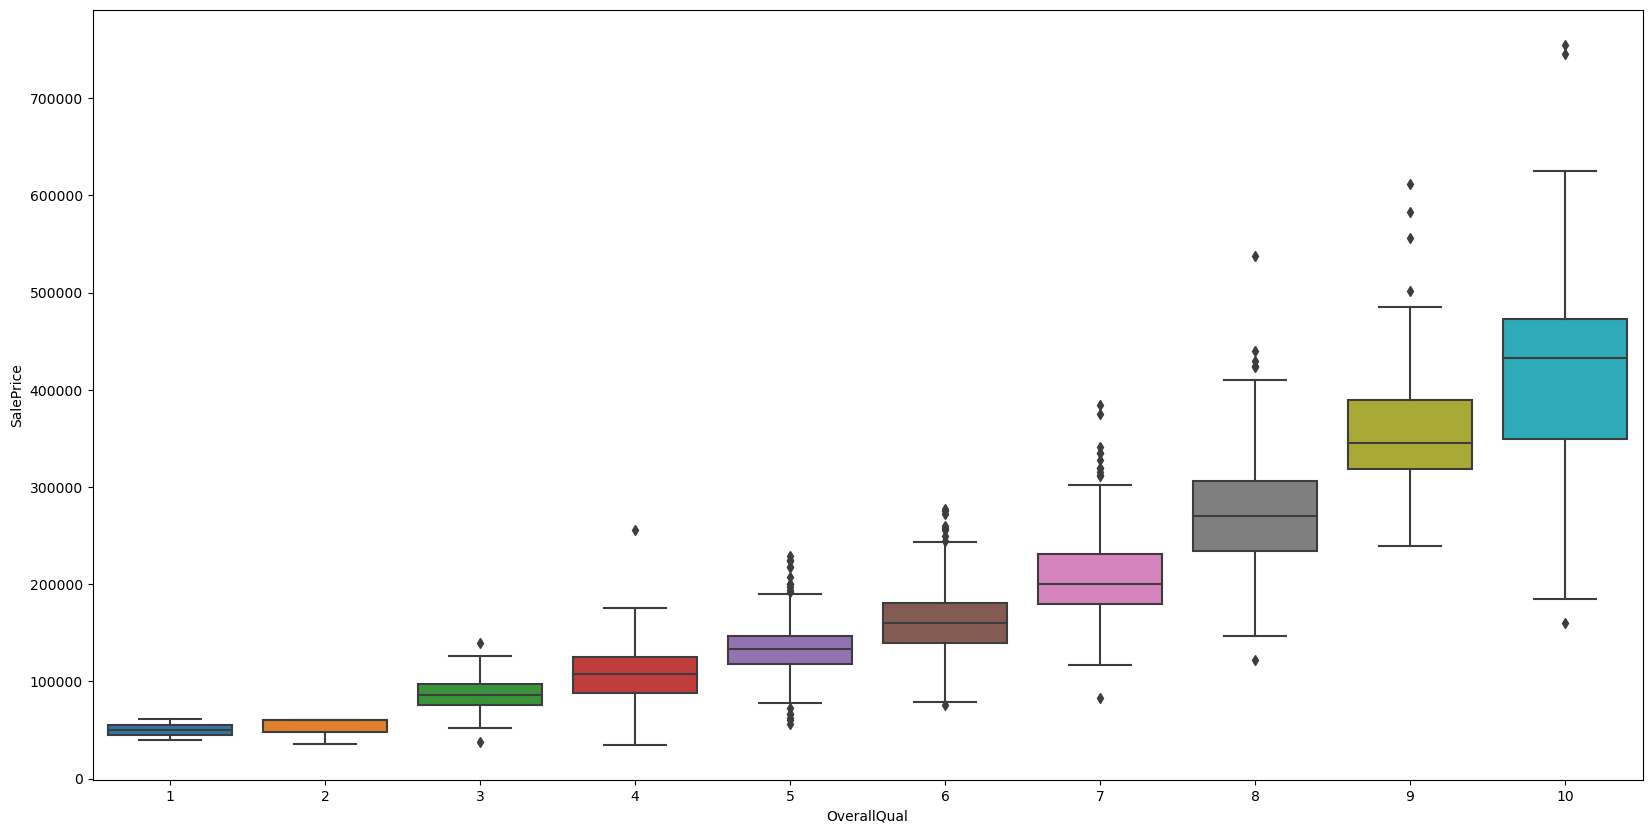

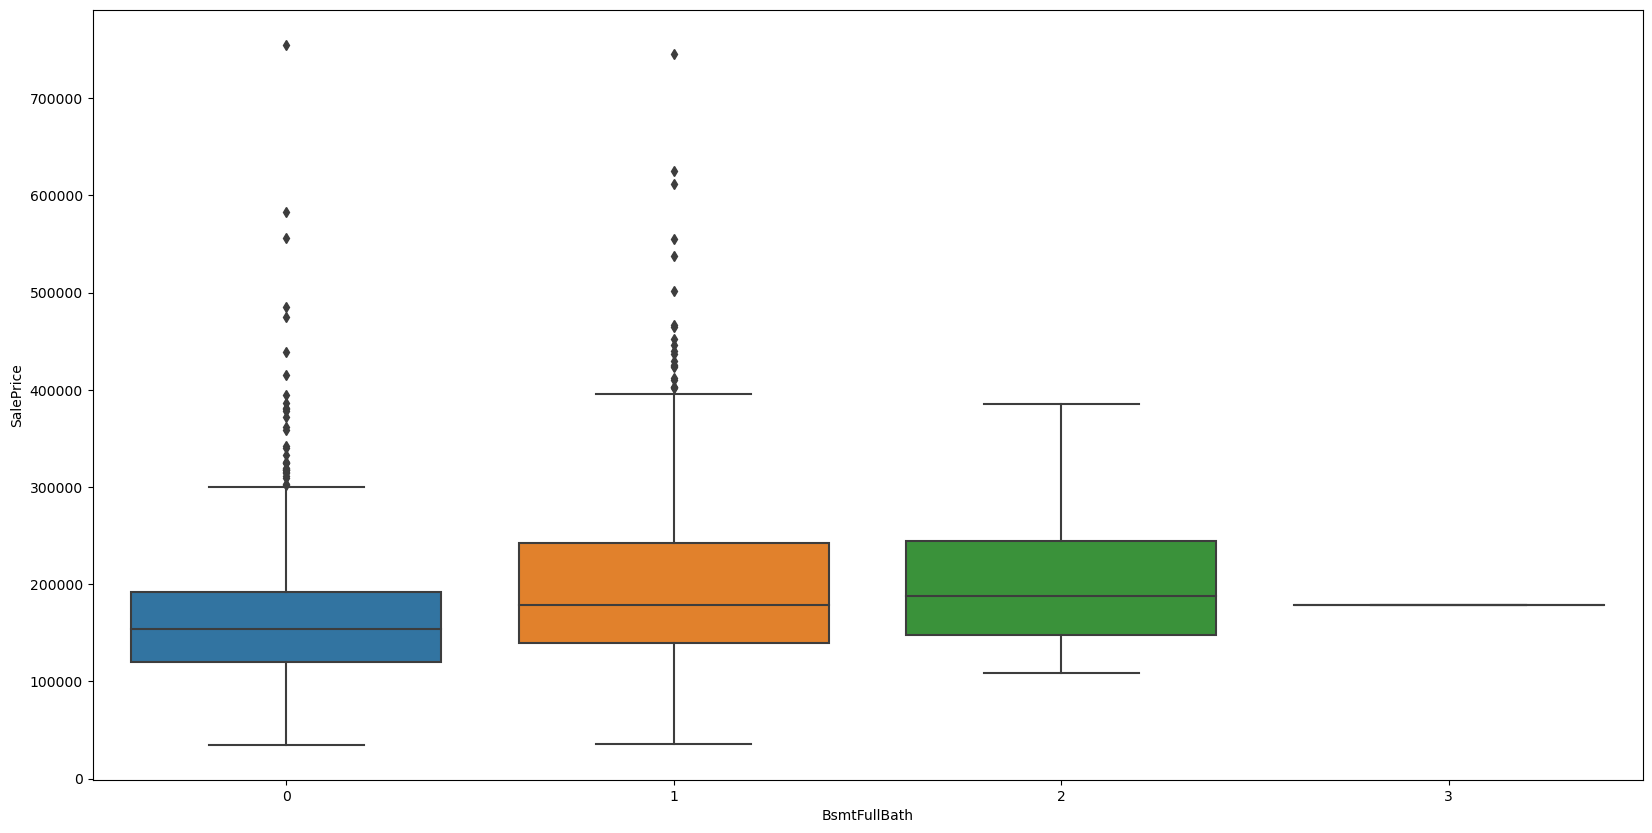

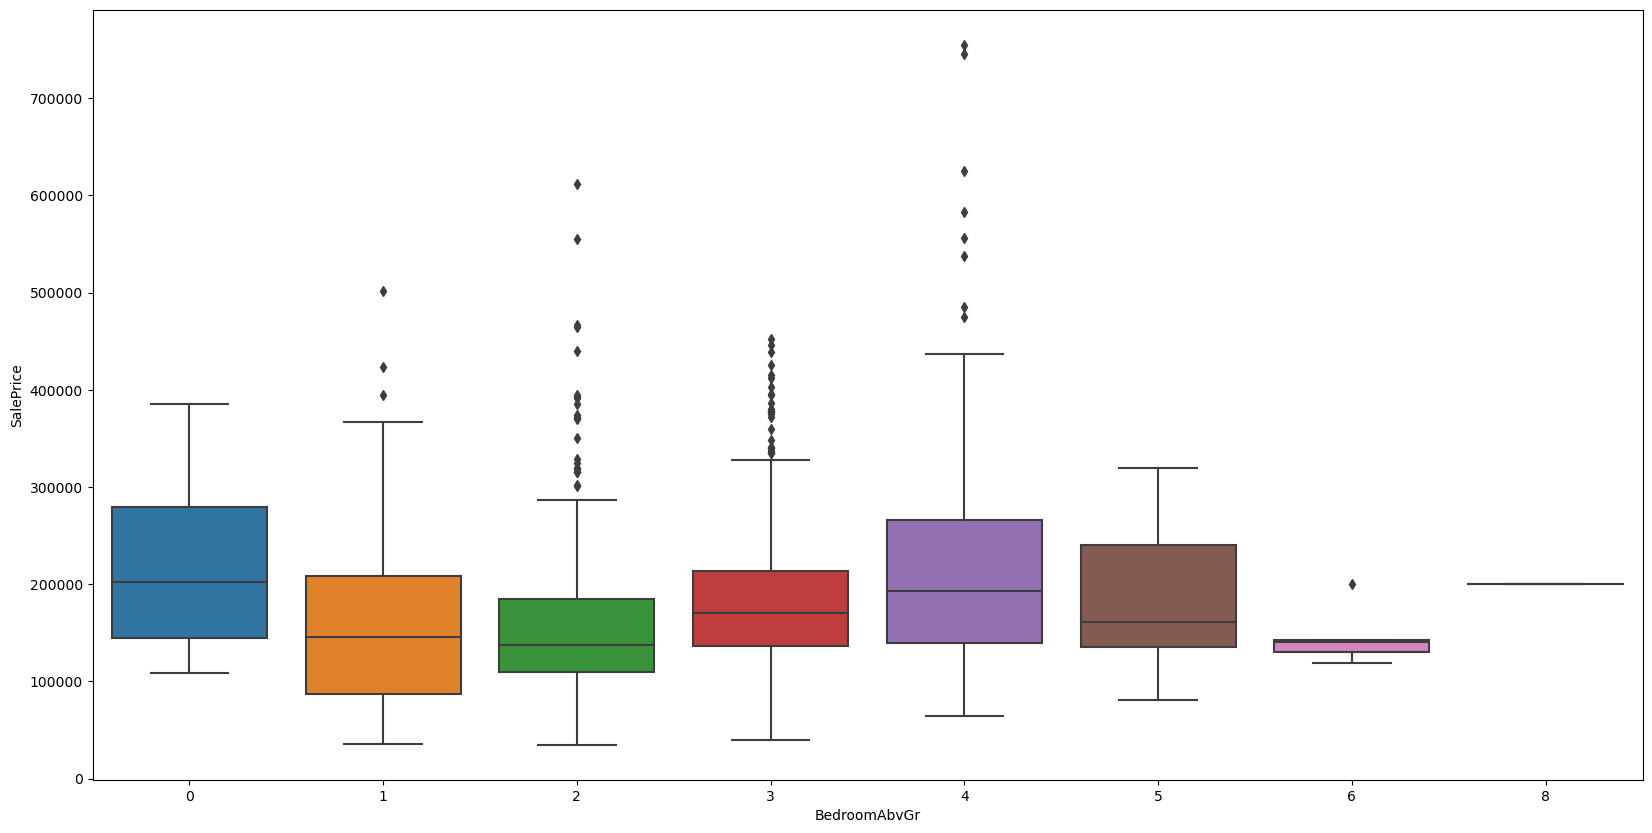

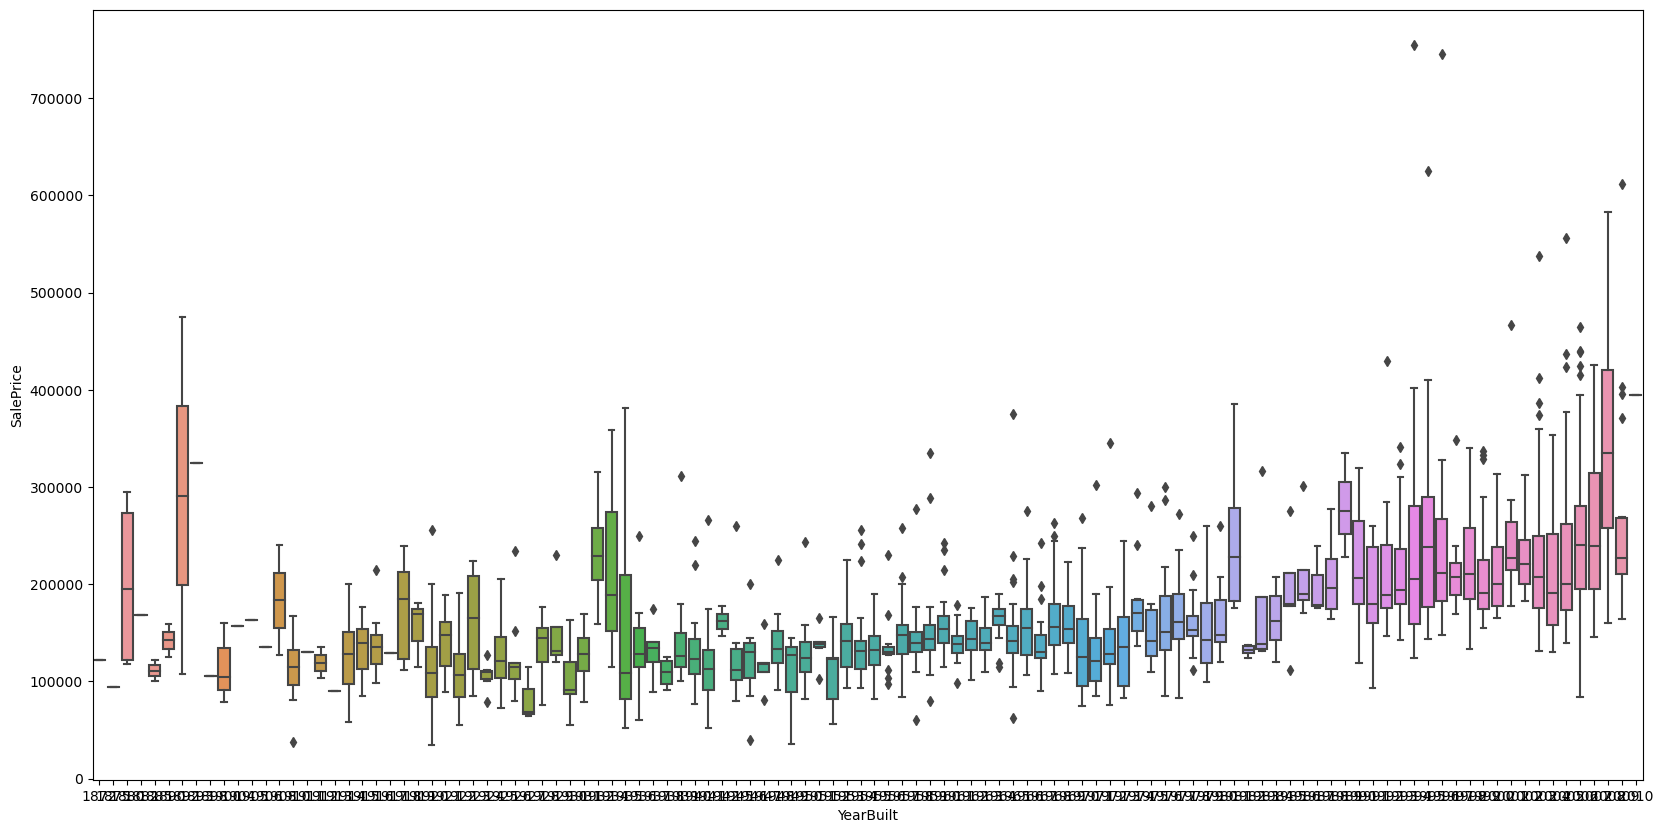

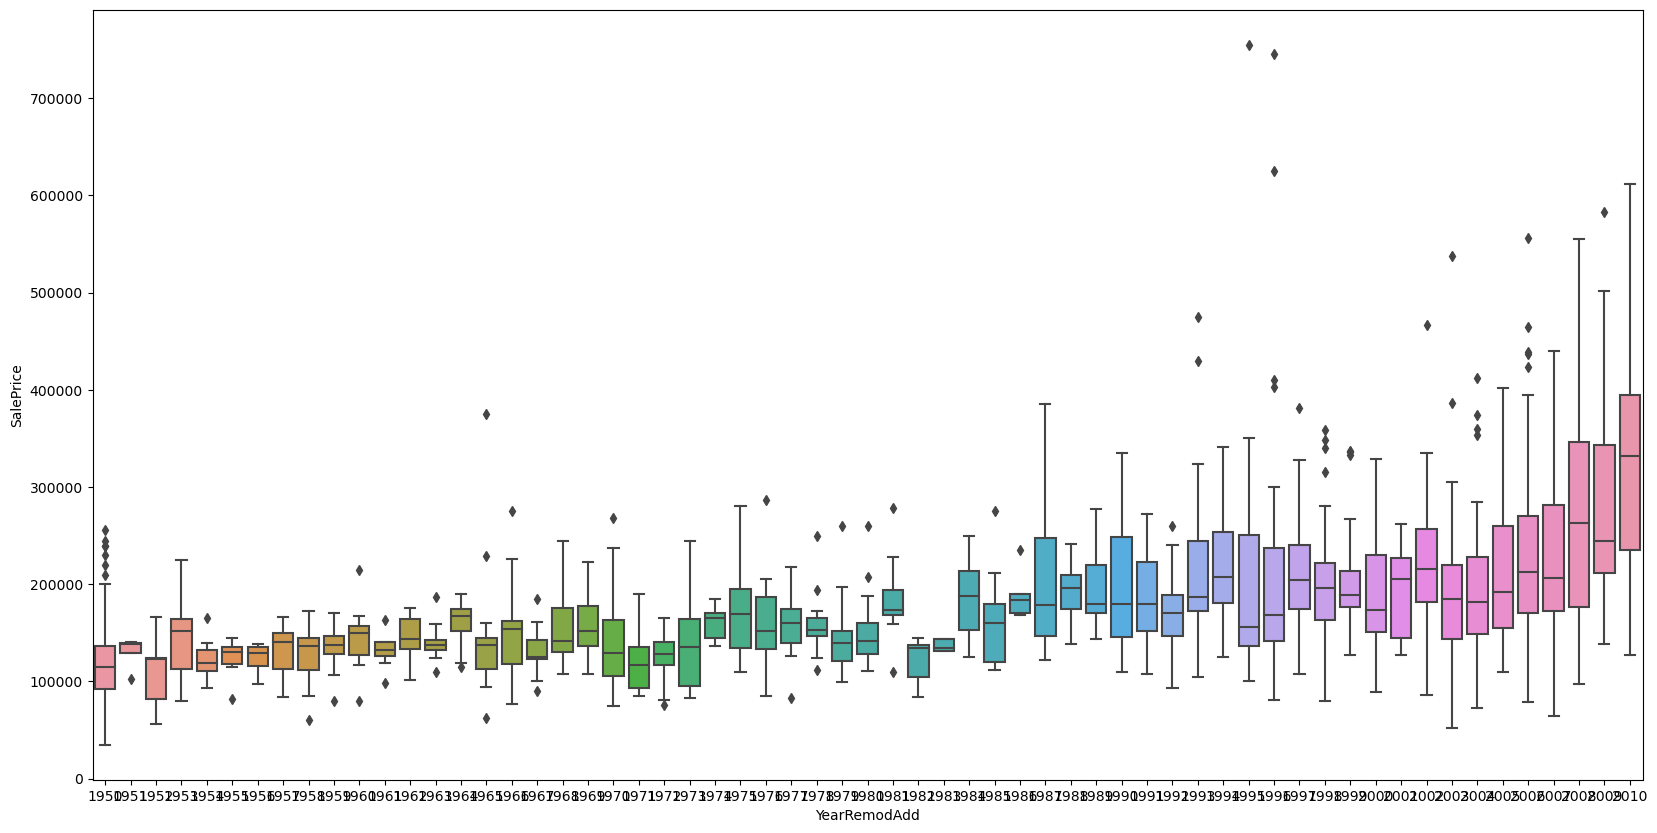

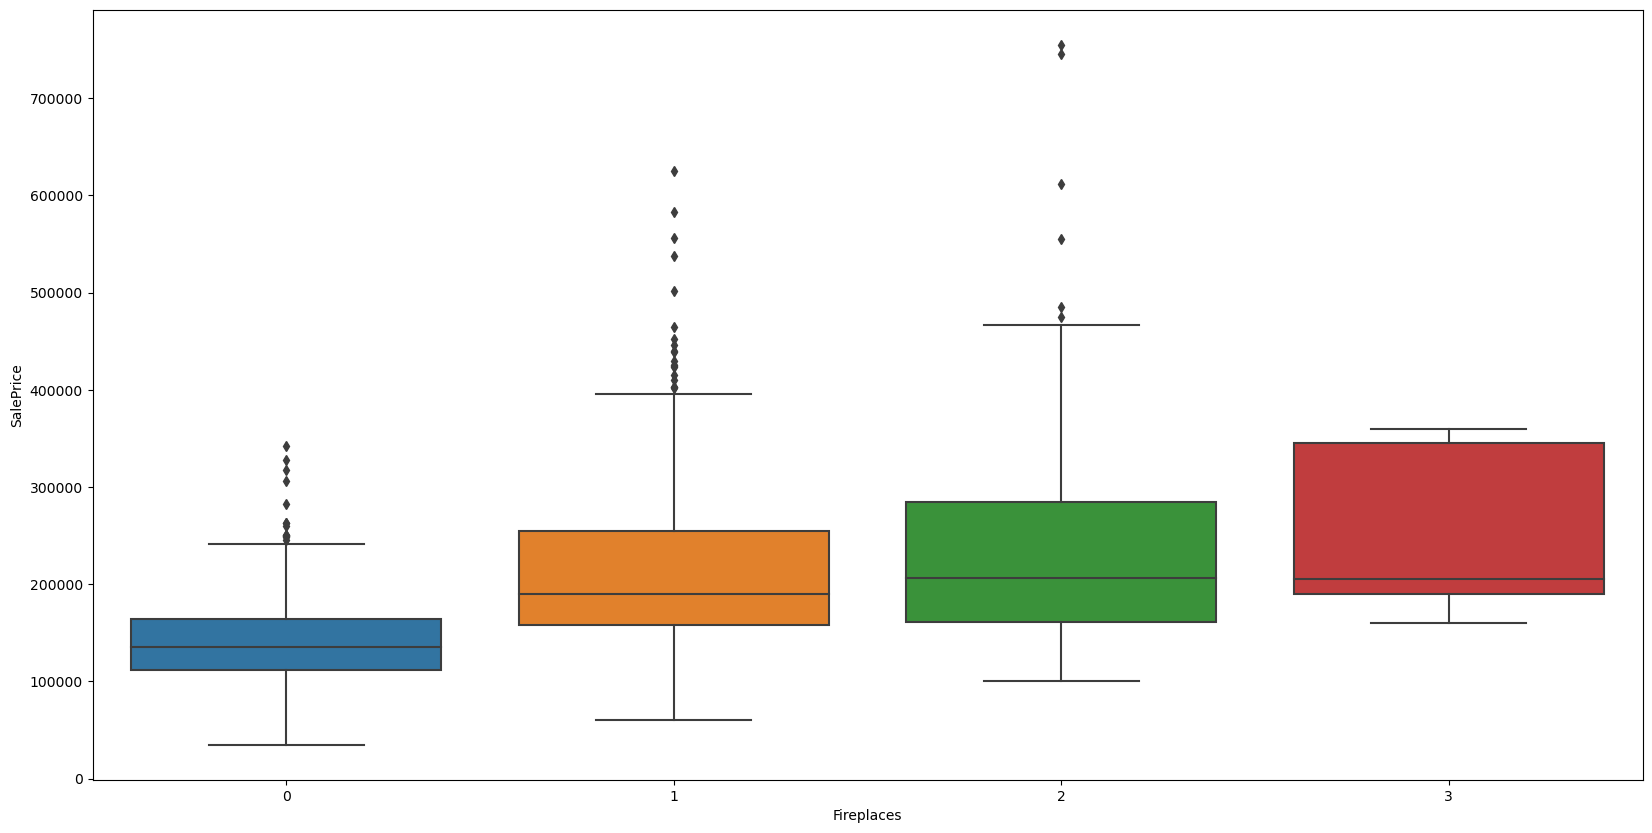

In [472]:
for i in box_plot_numeric_columns:
    plt.figure(figsize=(20,10))
    sns.boxplot(data=housing, x=i, y='SalePrice')
    plt.show()

- Direct visual aid shows ['MoSold' , 'YrSold' , 'LowQualFinSF'] have no influence on SalePrice, hence dropping these or could see later if lasso eliminates these features
- OverallCond and OverallQual represent ordinal categorical variable, treating them same

In [473]:
irrelvant_features.append('MoSold')
irrelvant_features.append('YrSold')
irrelvant_features.append('LowQualFinSF')
numeric_columns.remove('MoSold')
numeric_columns.remove('YrSold')
numeric_columns.remove('LowQualFinSF')
housing.drop(['MoSold', 'YrSold', 'LowQualFinSF'], axis=1, inplace=True)

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

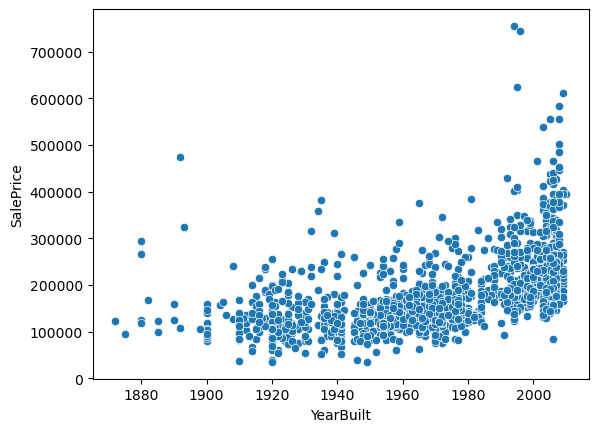

In [474]:
sns.scatterplot(housing, x='YearBuilt', y='SalePrice')

<Axes: xlabel='OverallCond', ylabel='SalePrice'>

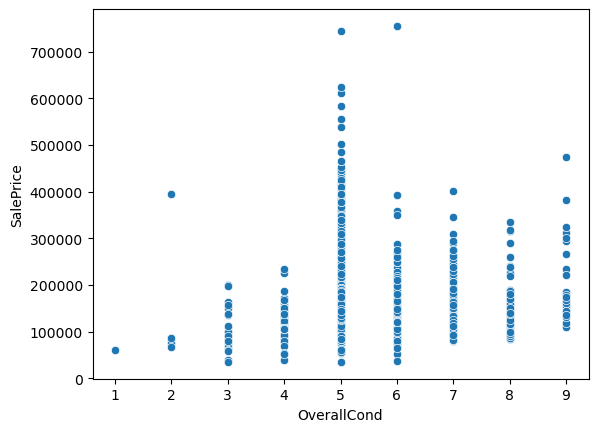

In [475]:
sns.scatterplot(housing, x='OverallCond', y='SalePrice')

<Axes: xlabel='GarageYrBlt', ylabel='SalePrice'>

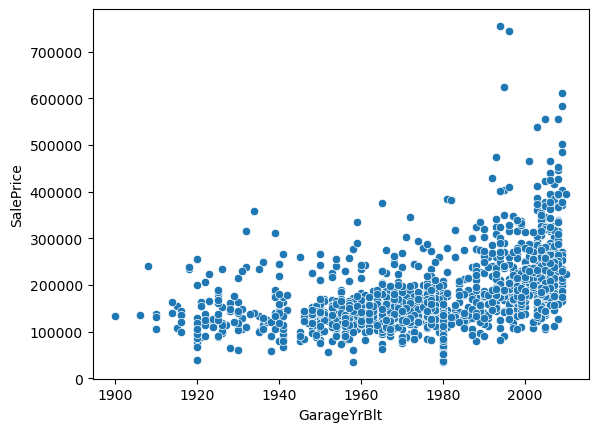

In [476]:
sns.scatterplot(housing, x='GarageYrBlt', y='SalePrice')

- 'OverallQual' and 'OverallCond' though numerical in values are categorical in nature and must be visualized with boxplot

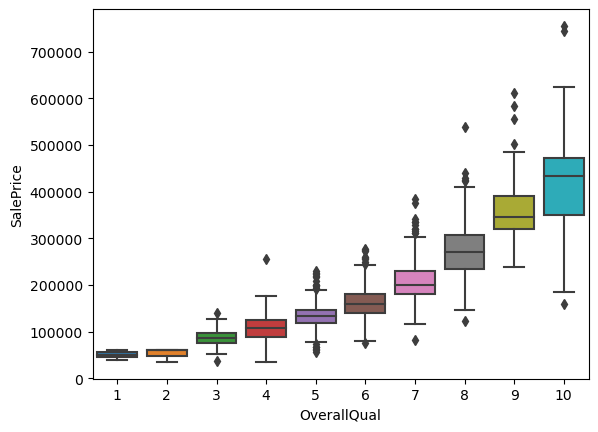

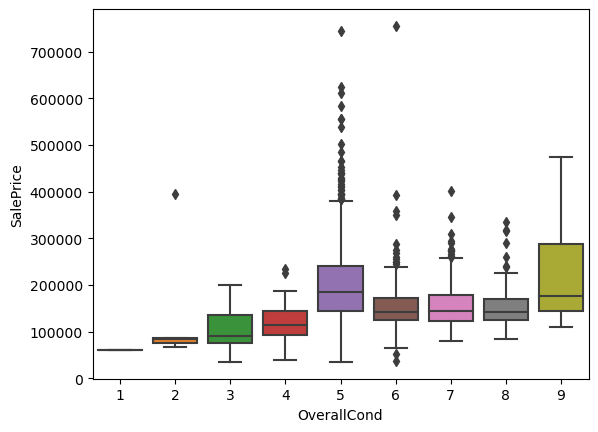

In [477]:
sns.boxplot(data=housing, x='OverallQual', y='SalePrice')
plt.show()
sns.boxplot(data=housing, x='OverallCond', y='SalePrice')
plt.show()

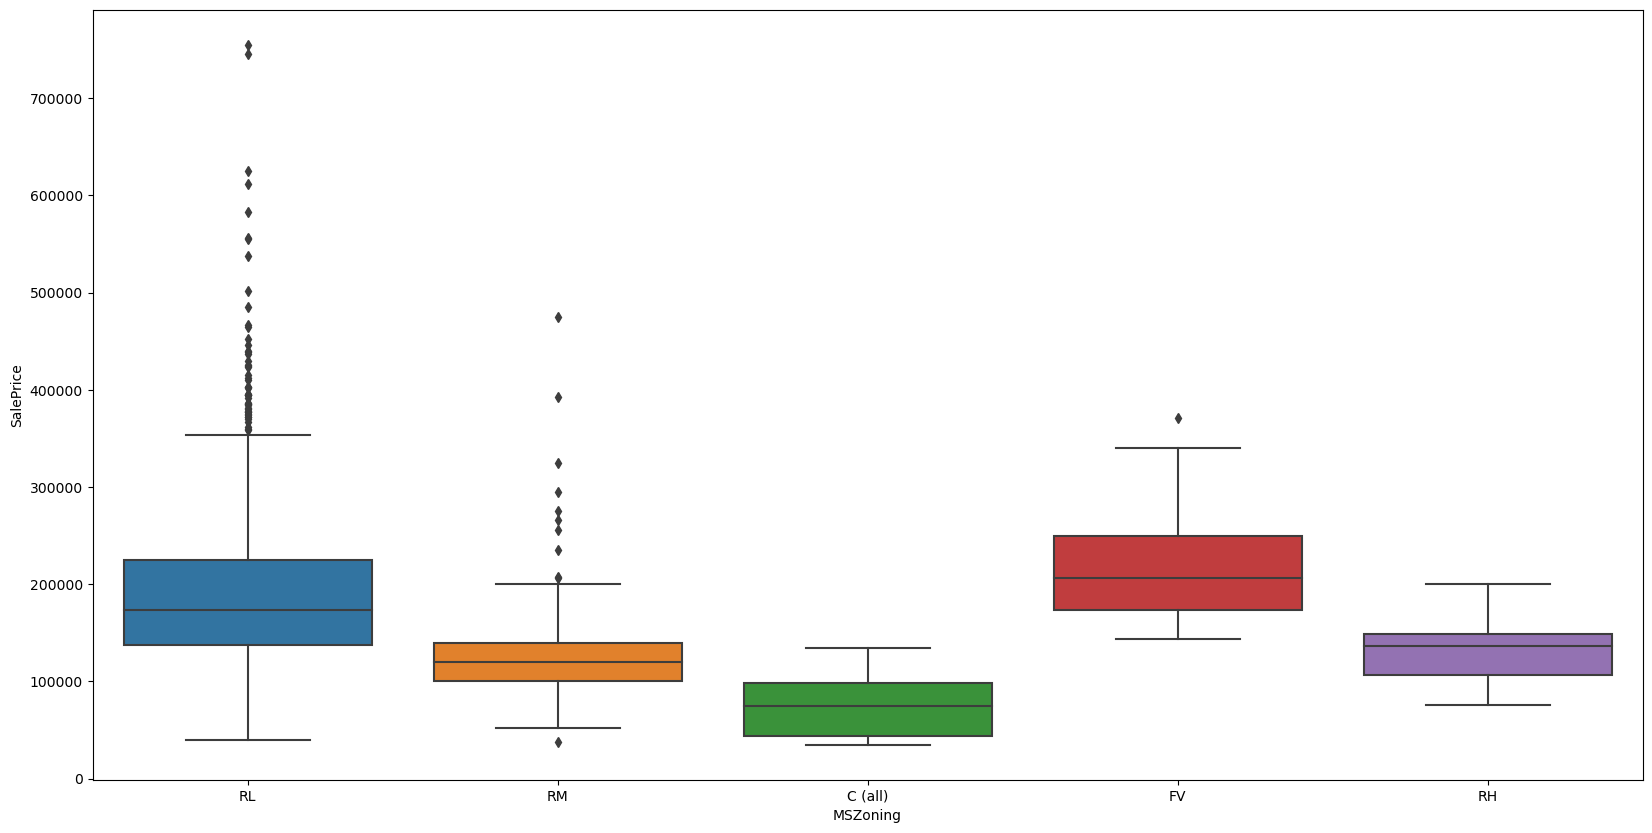

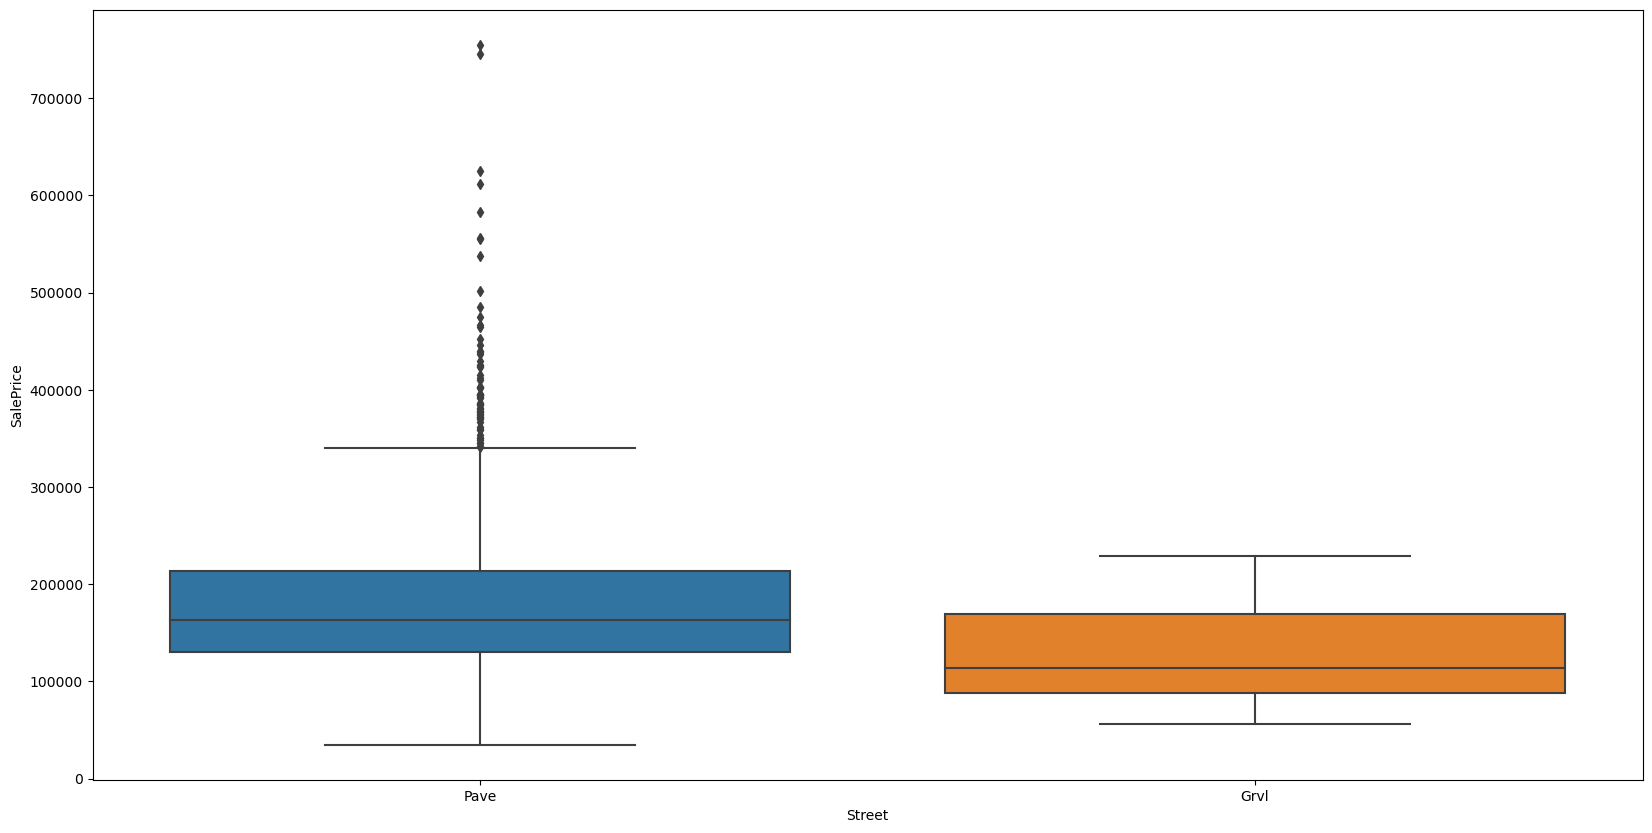

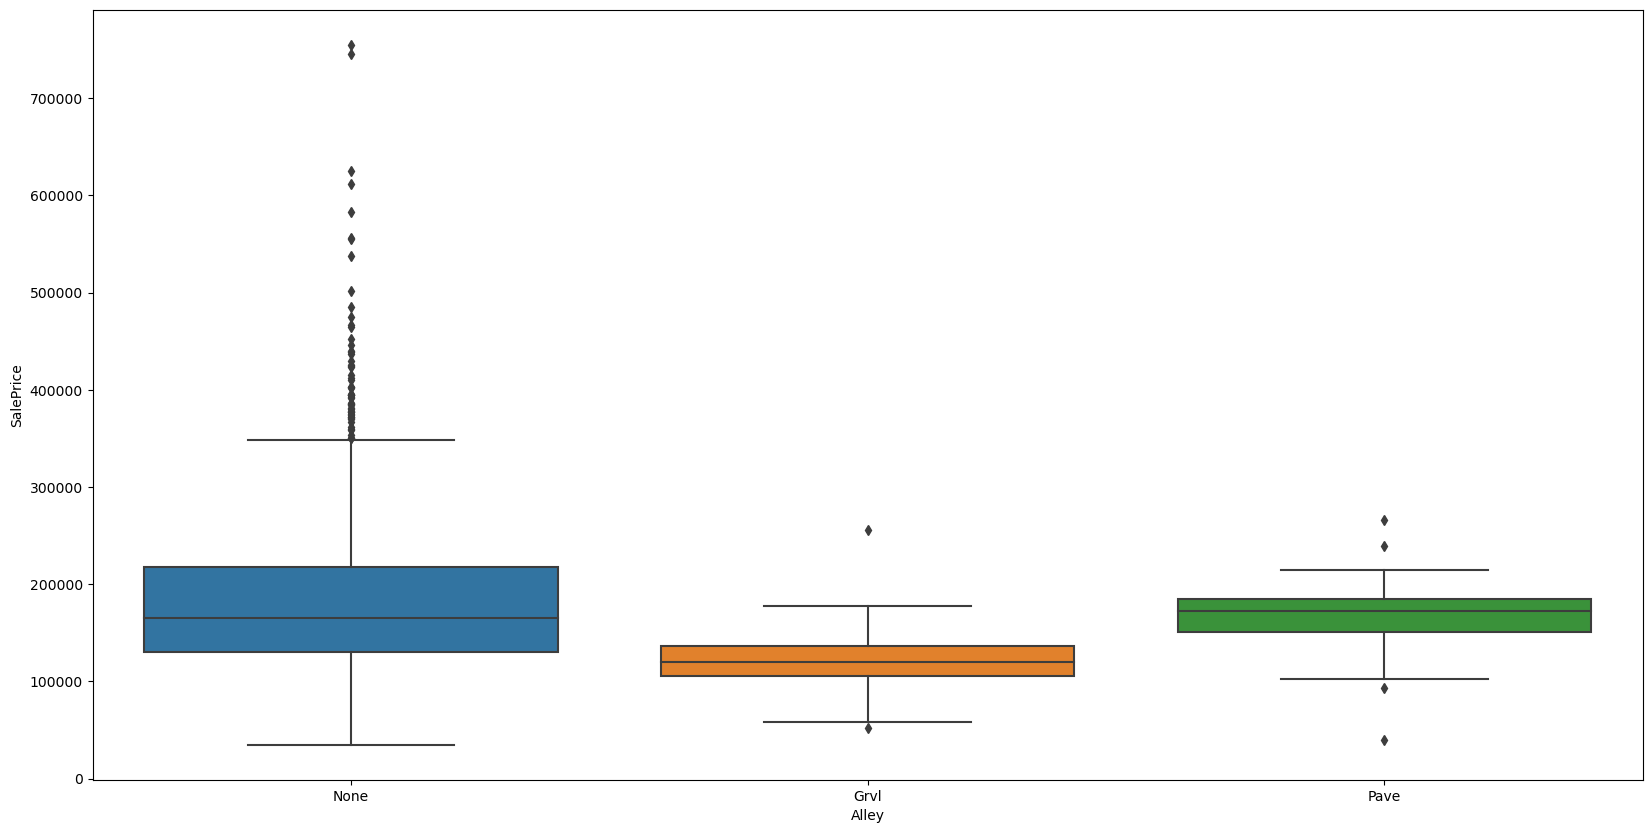

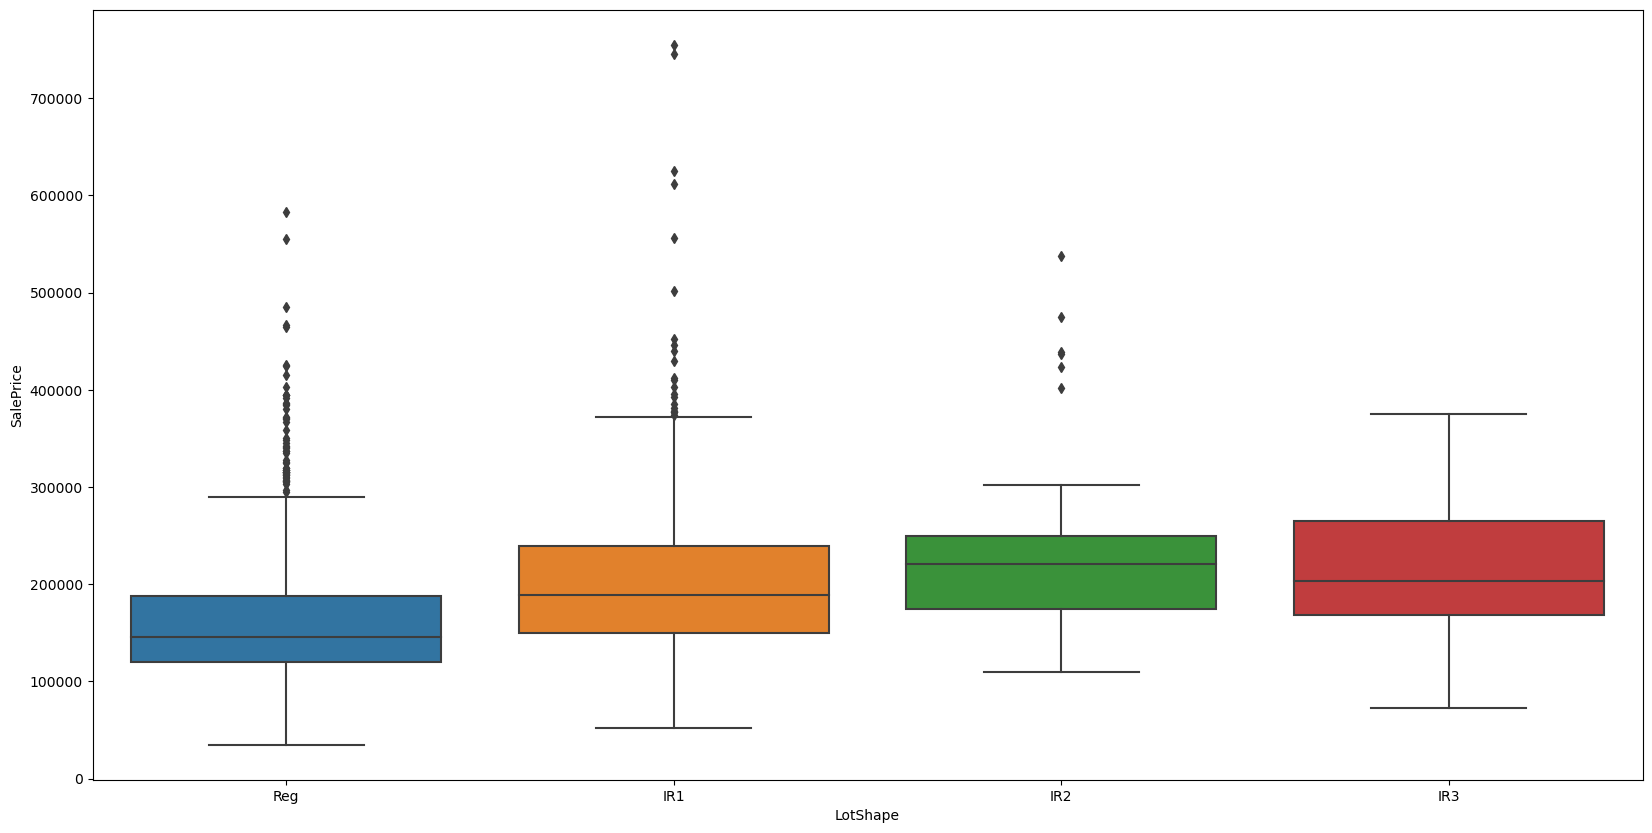

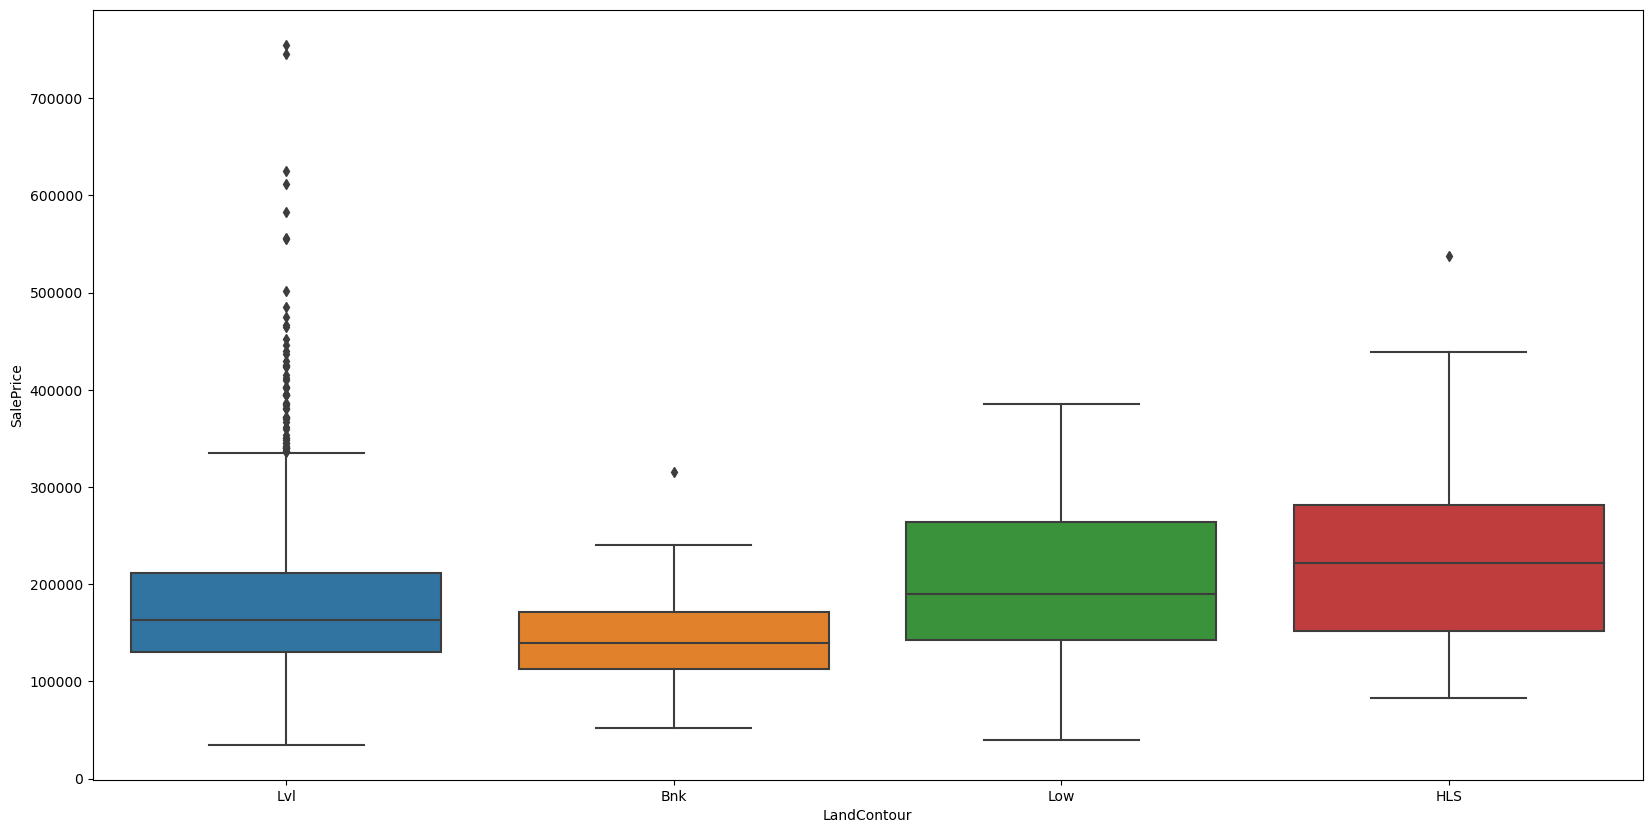

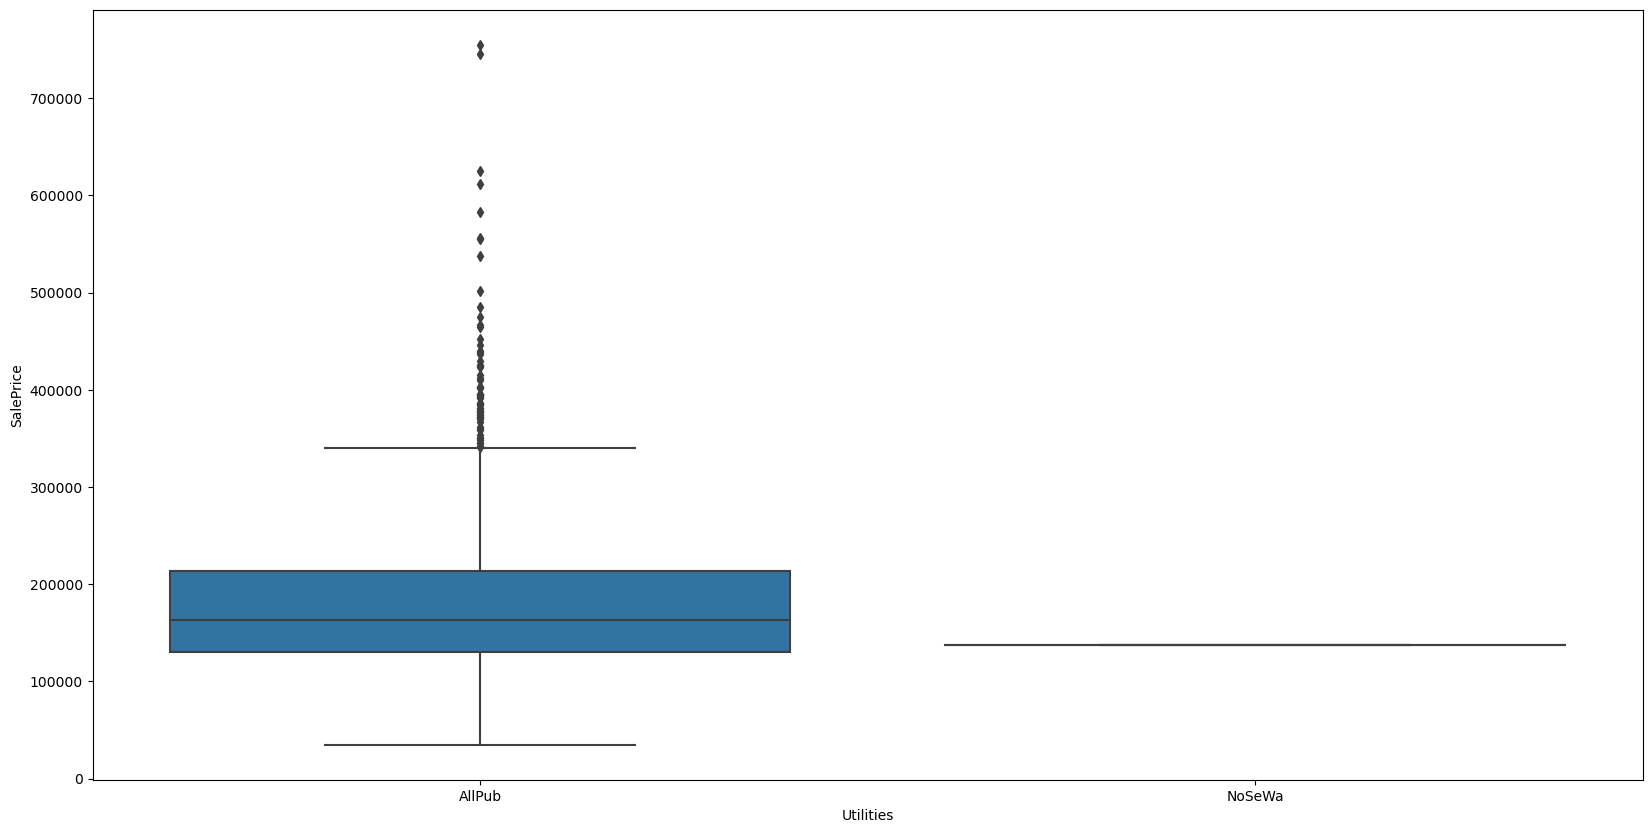

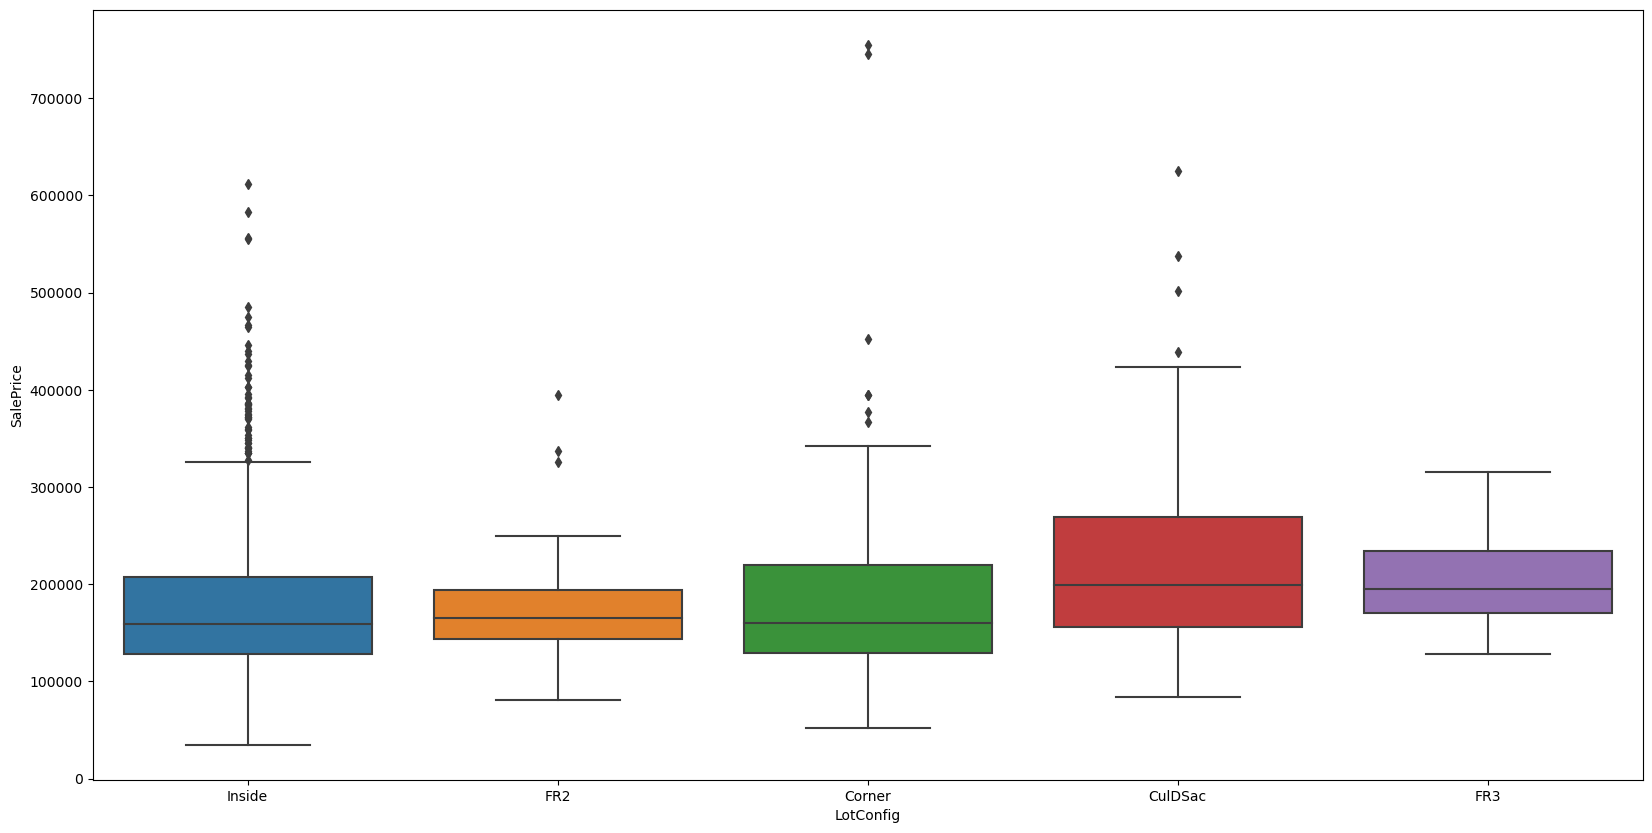

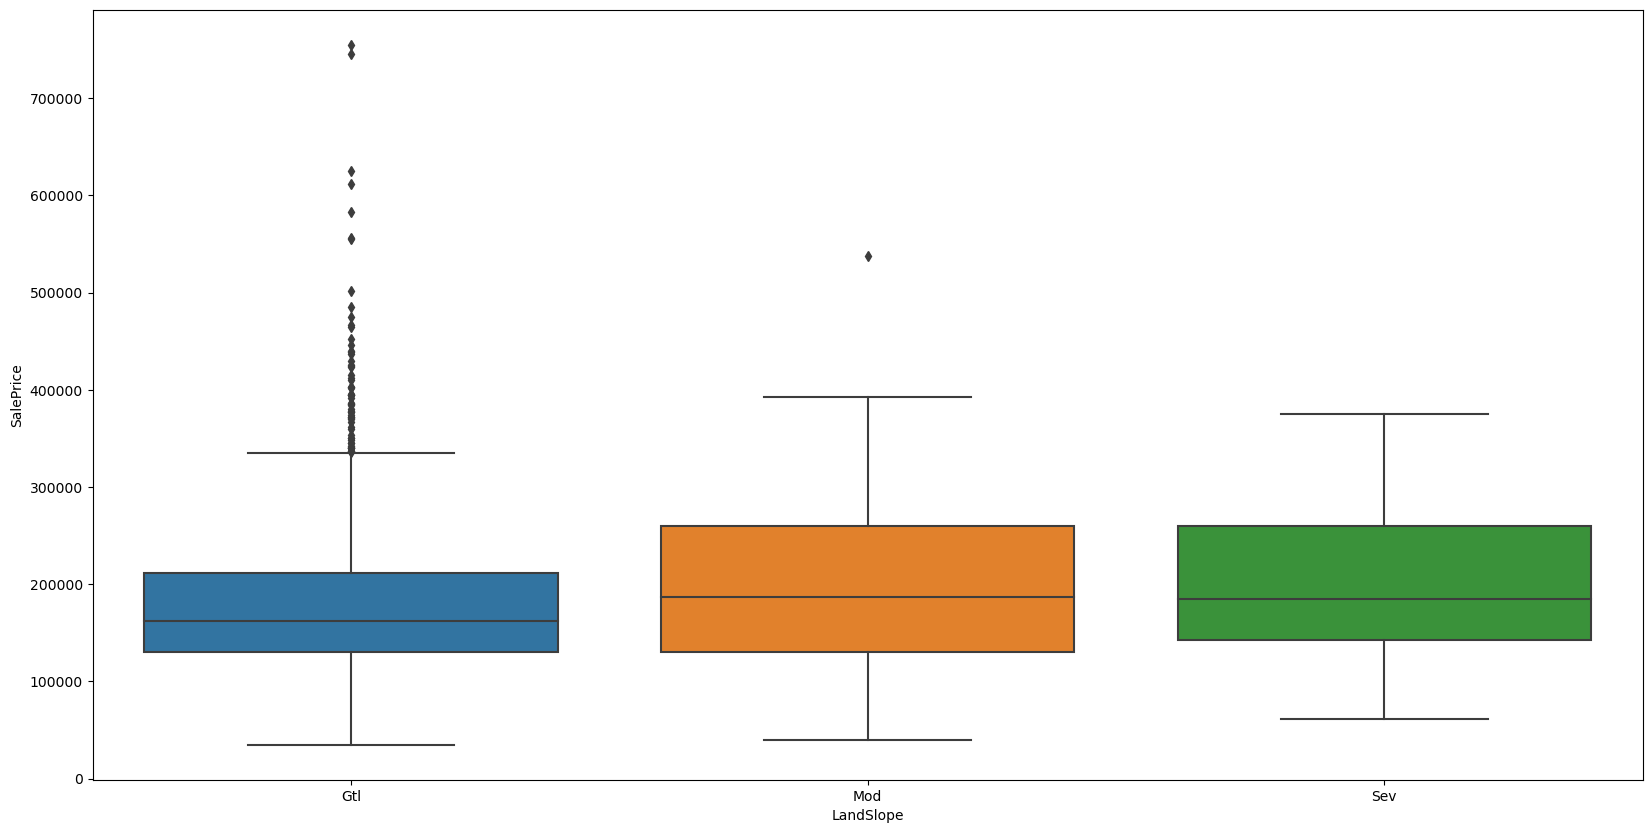

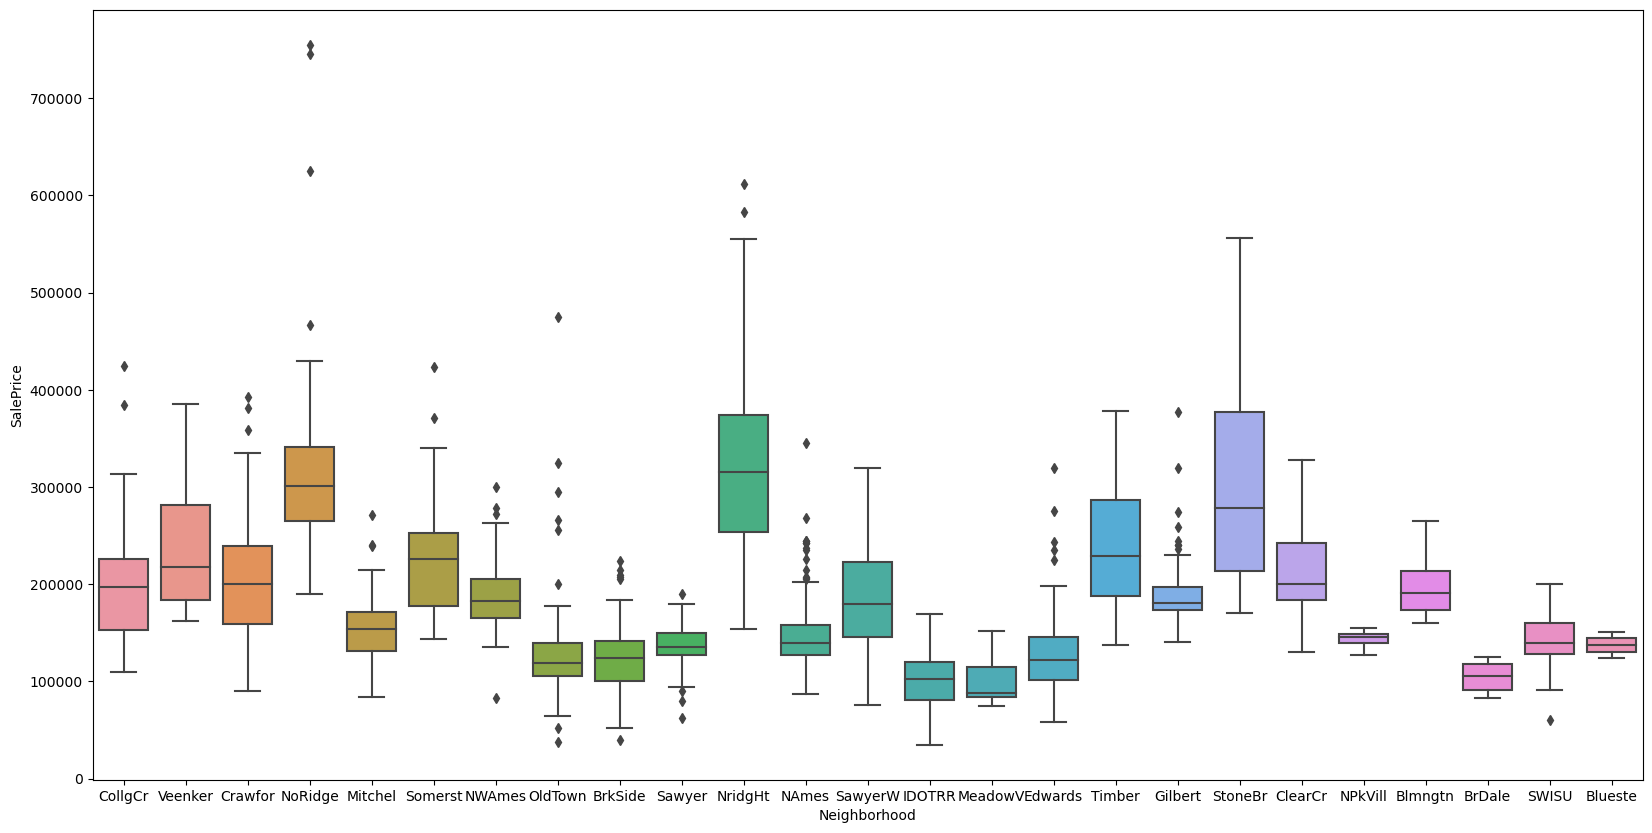

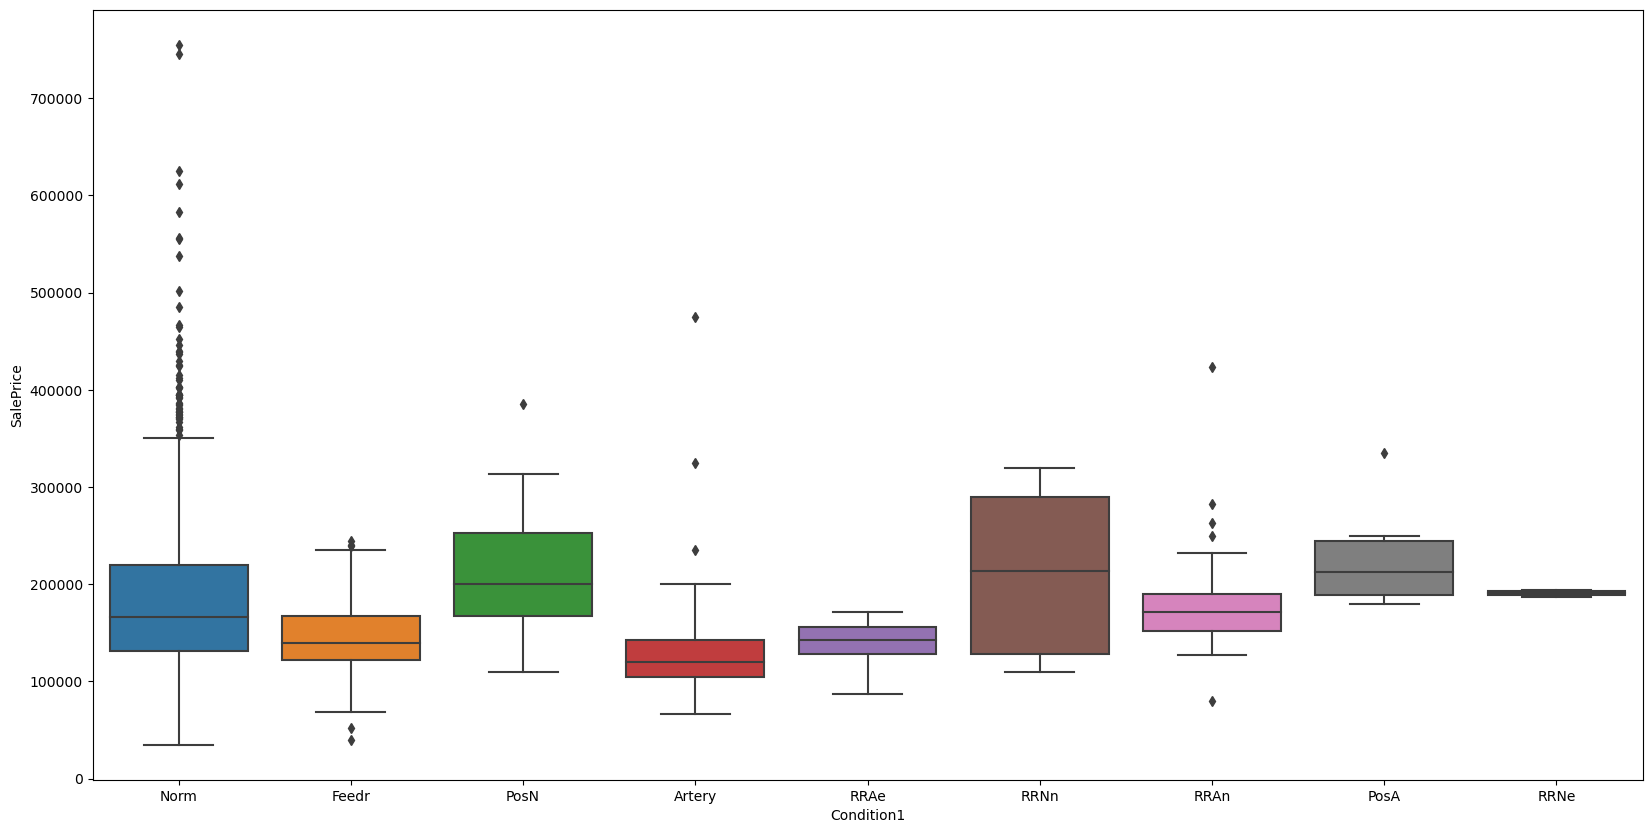

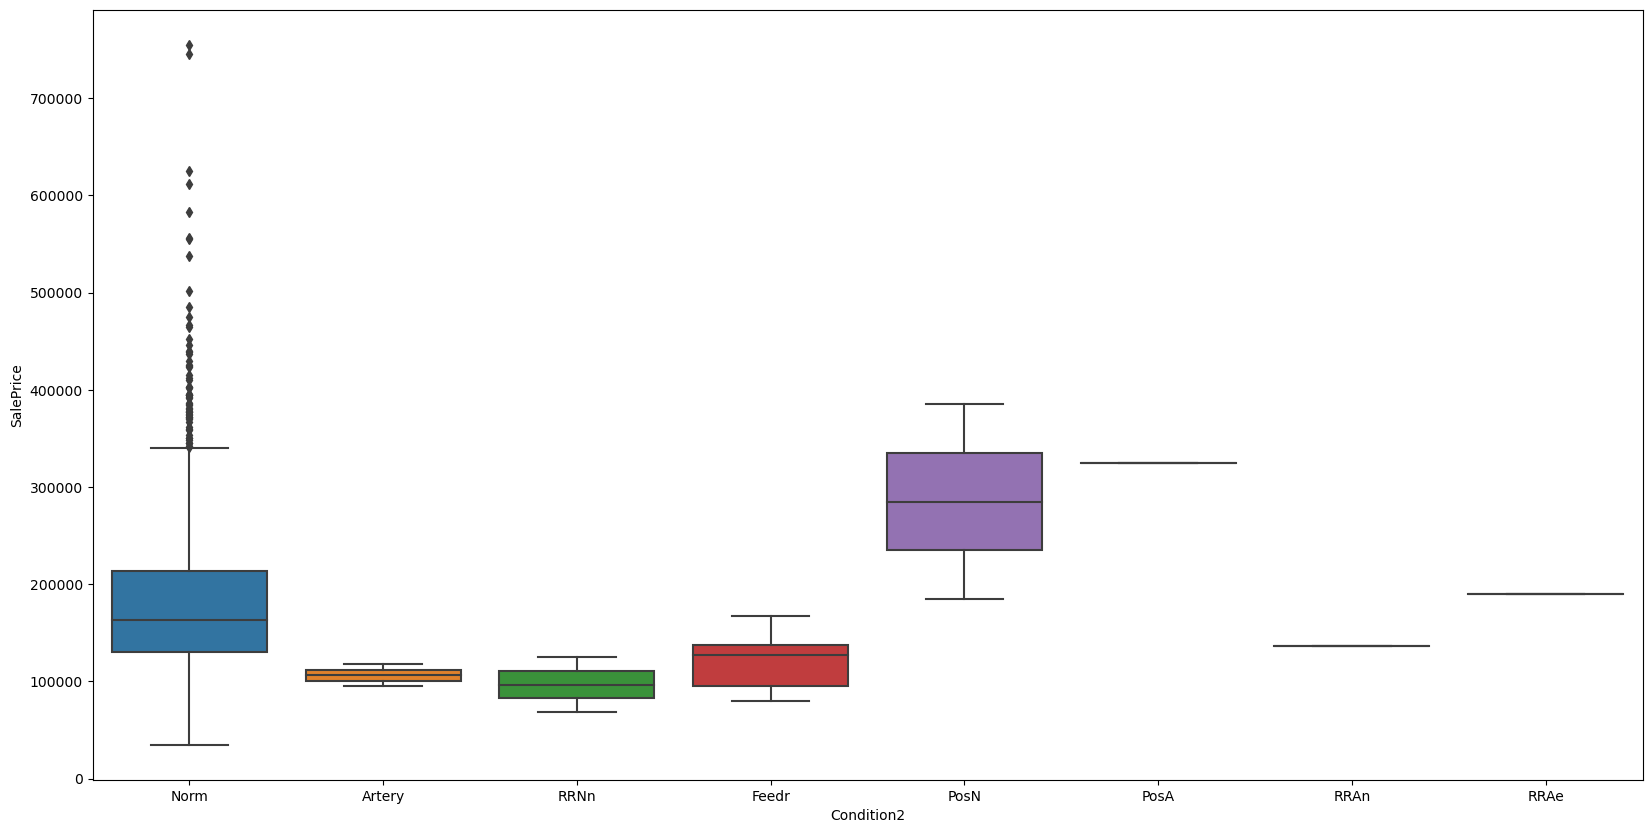

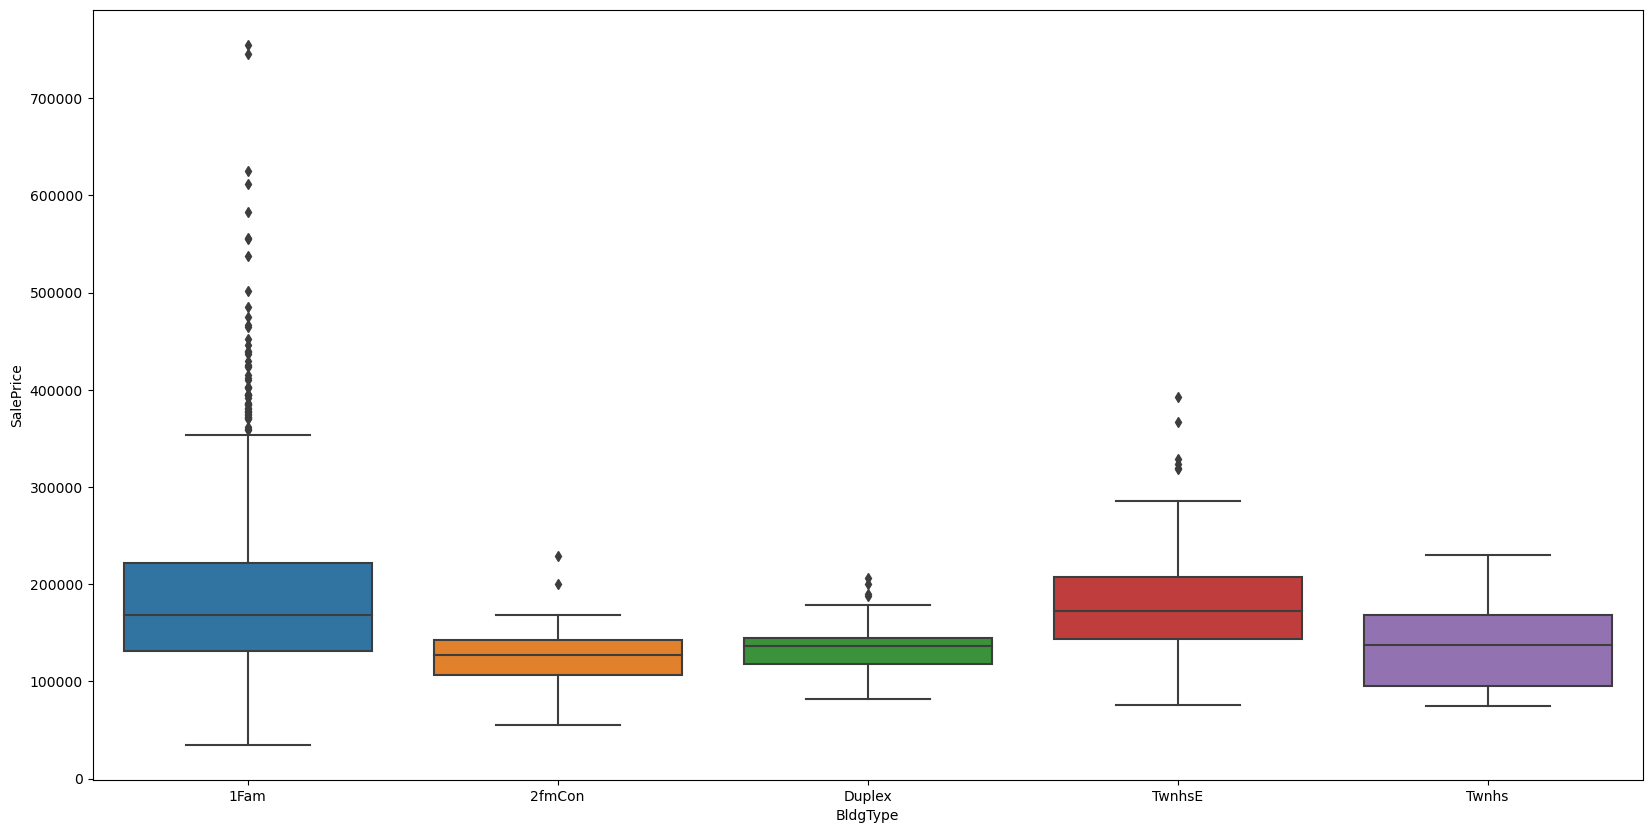

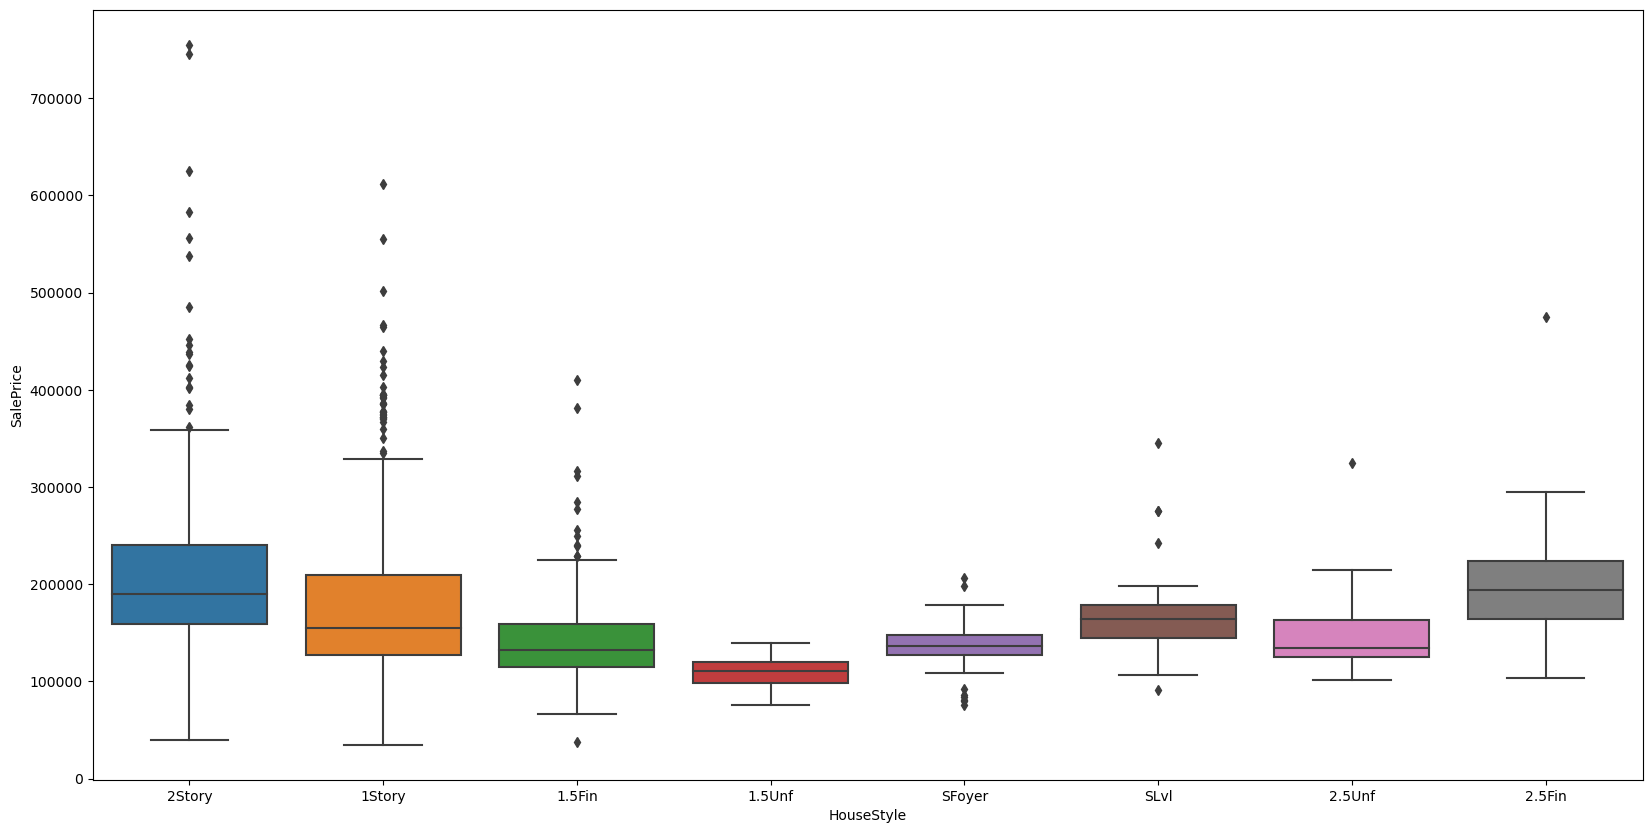

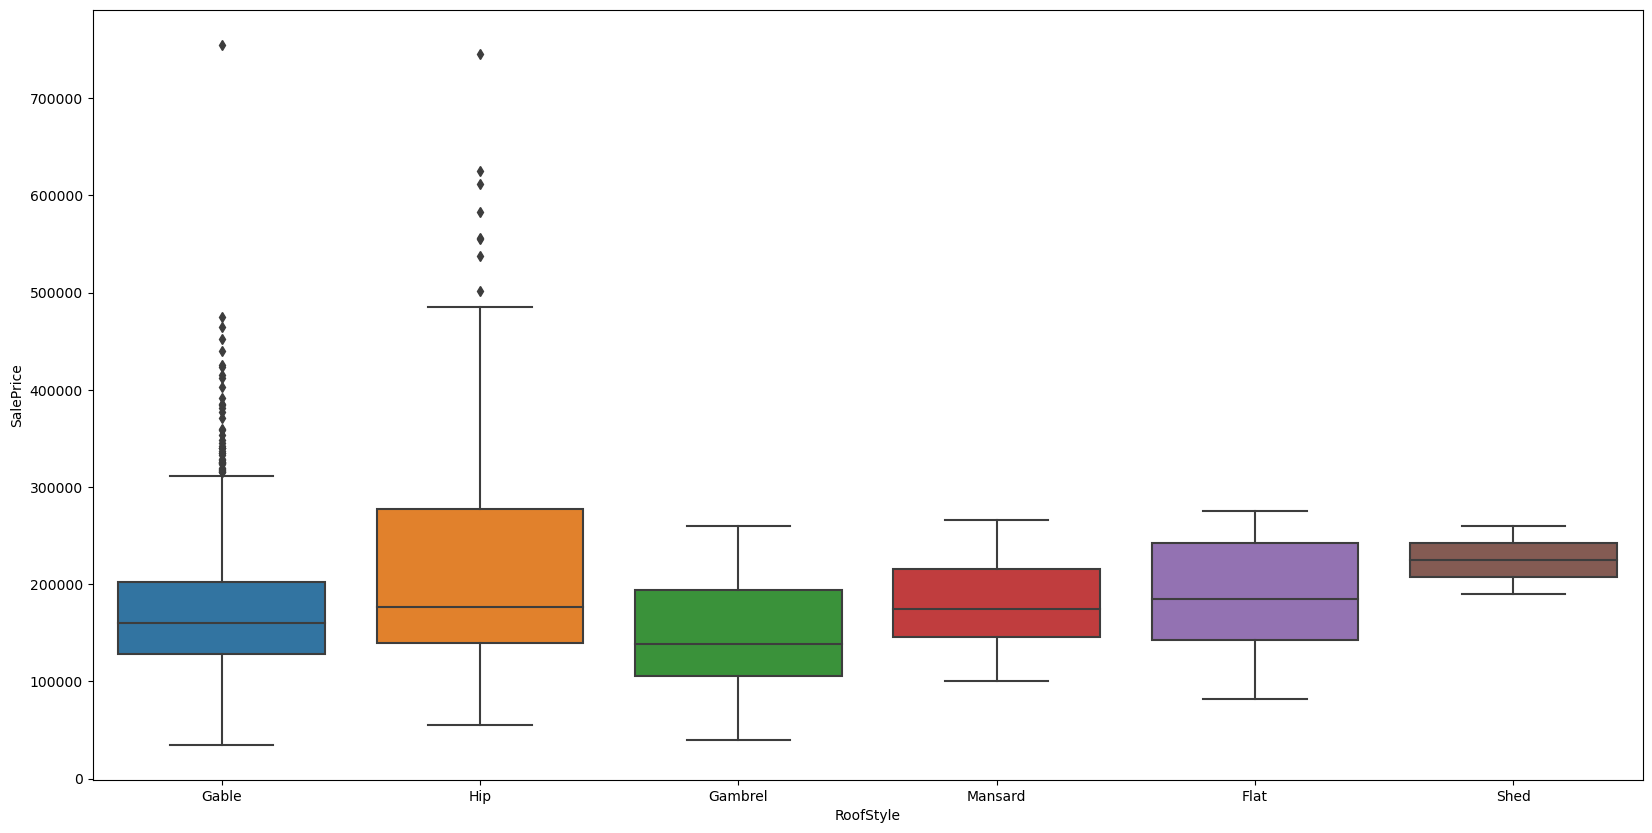

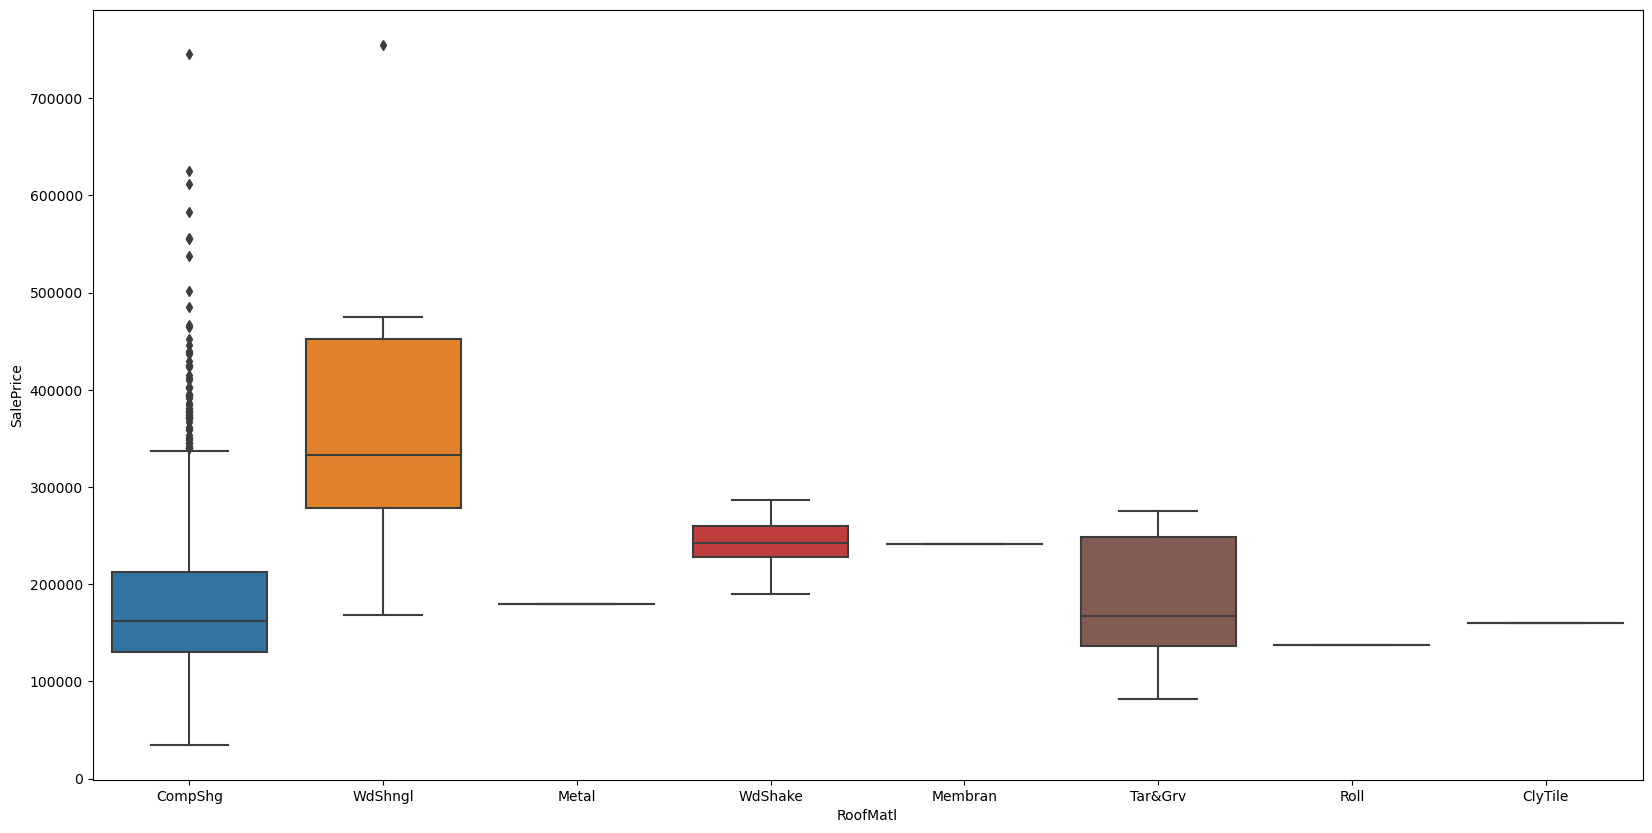

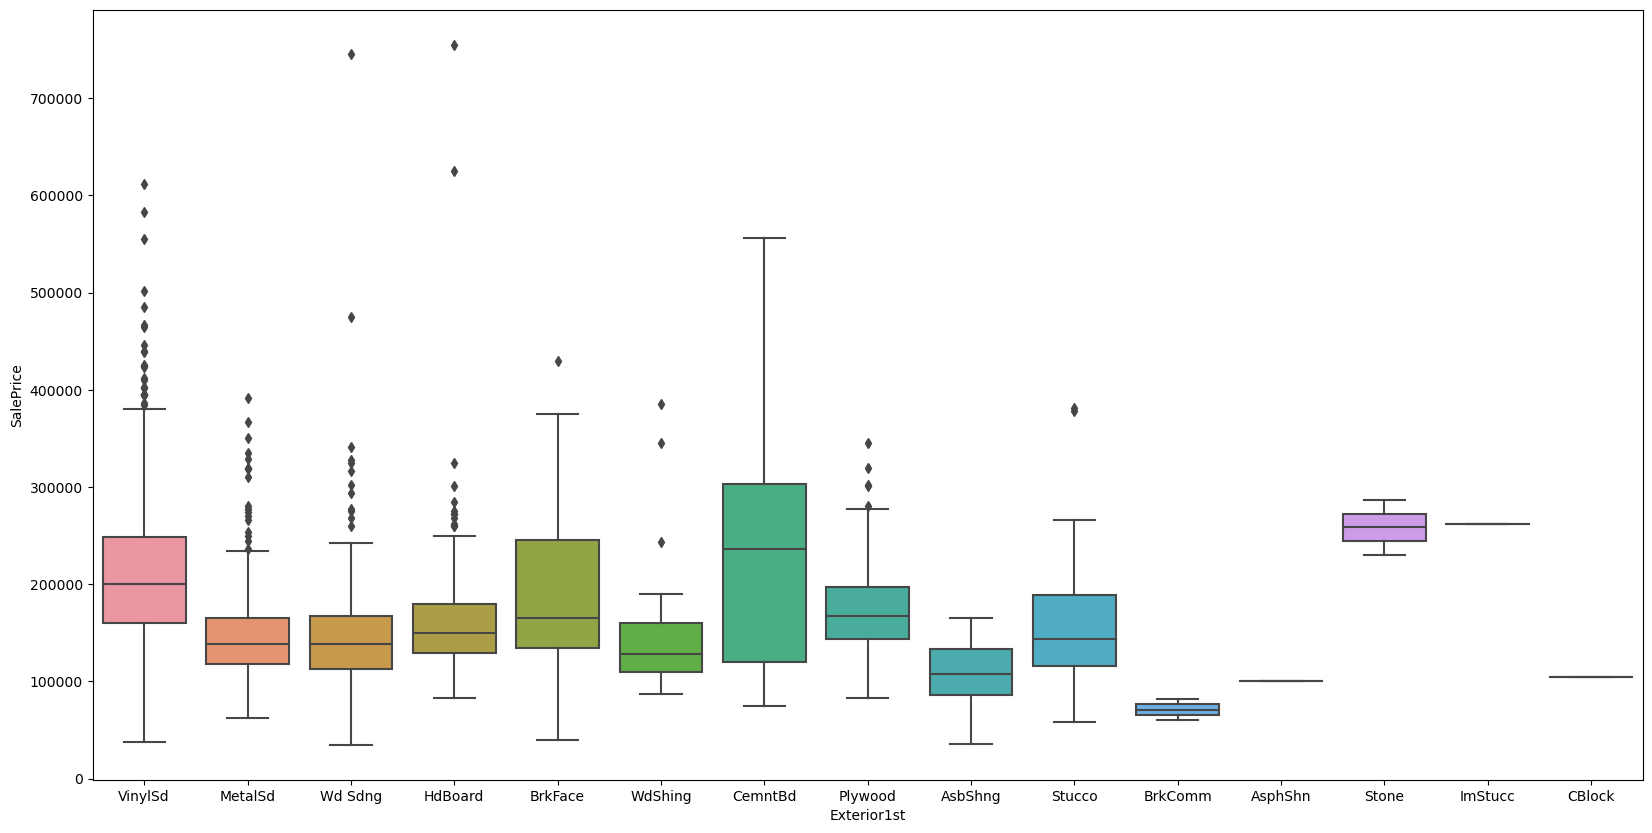

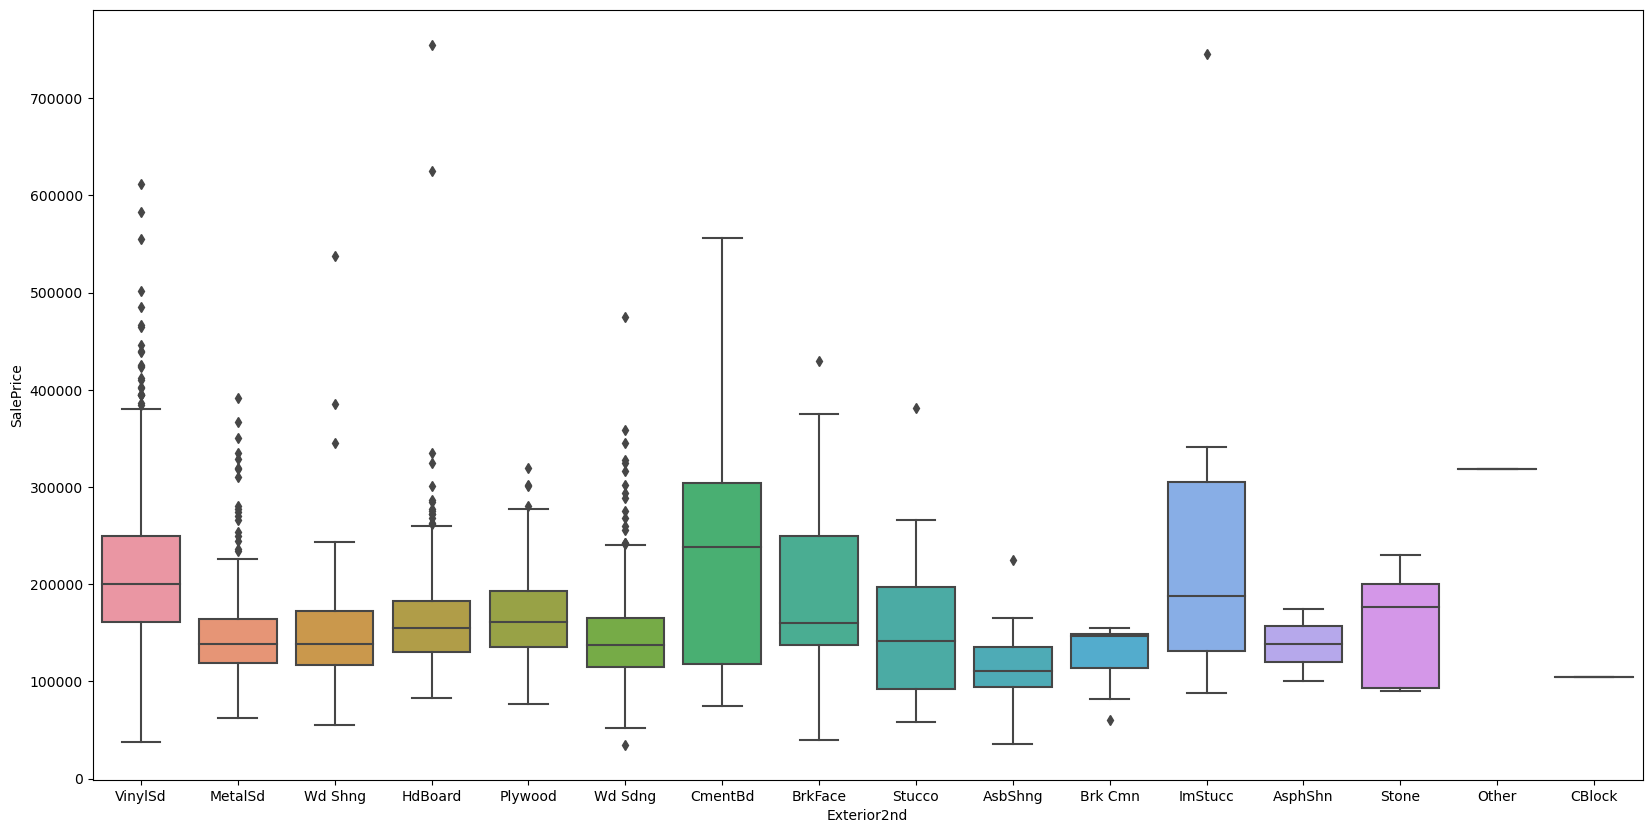

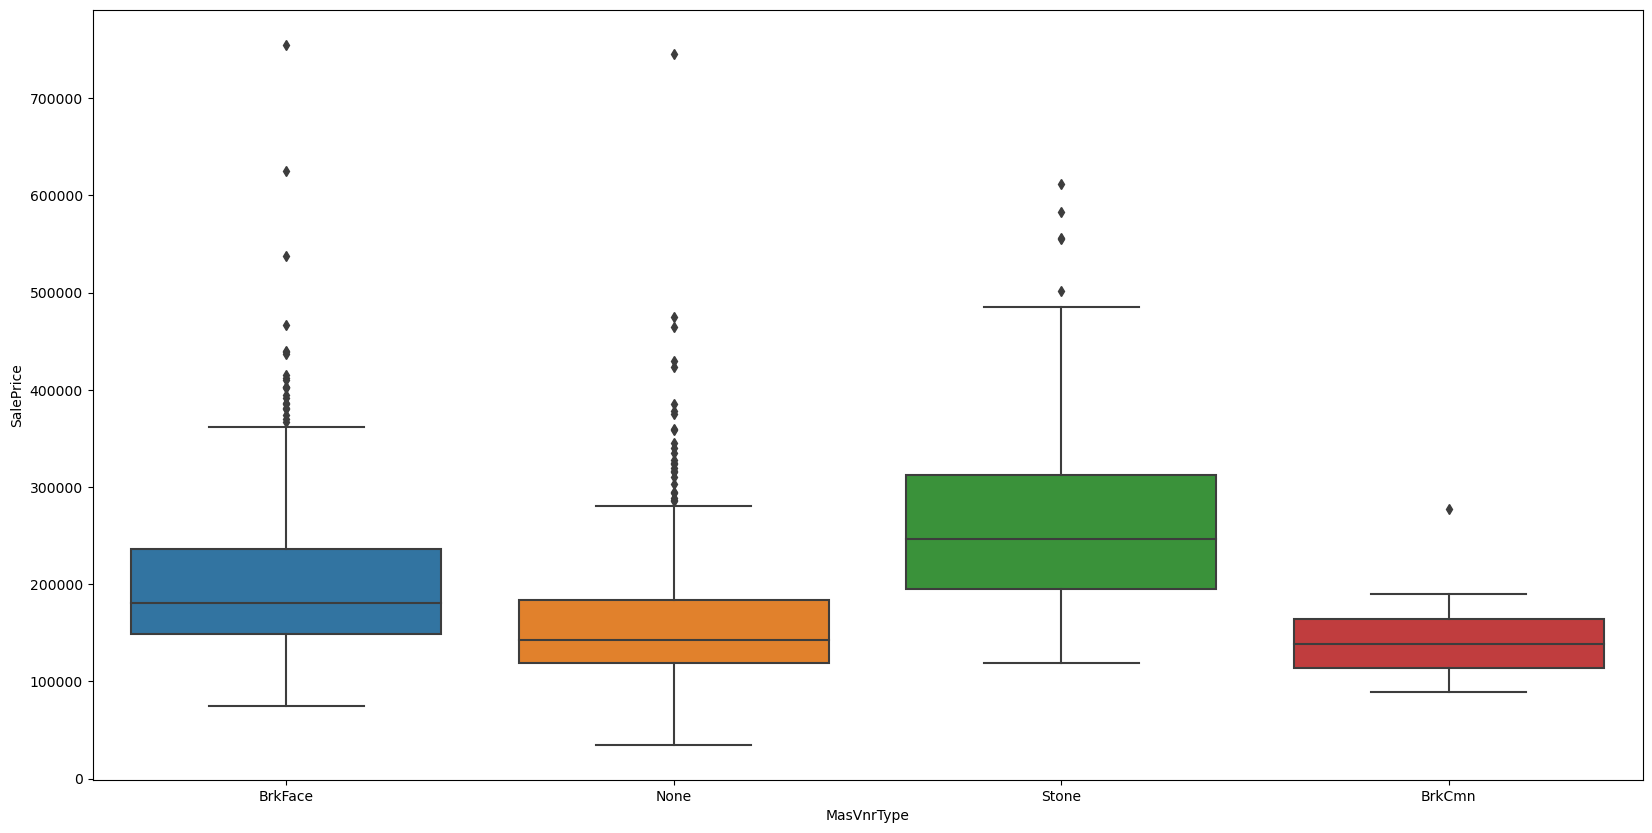

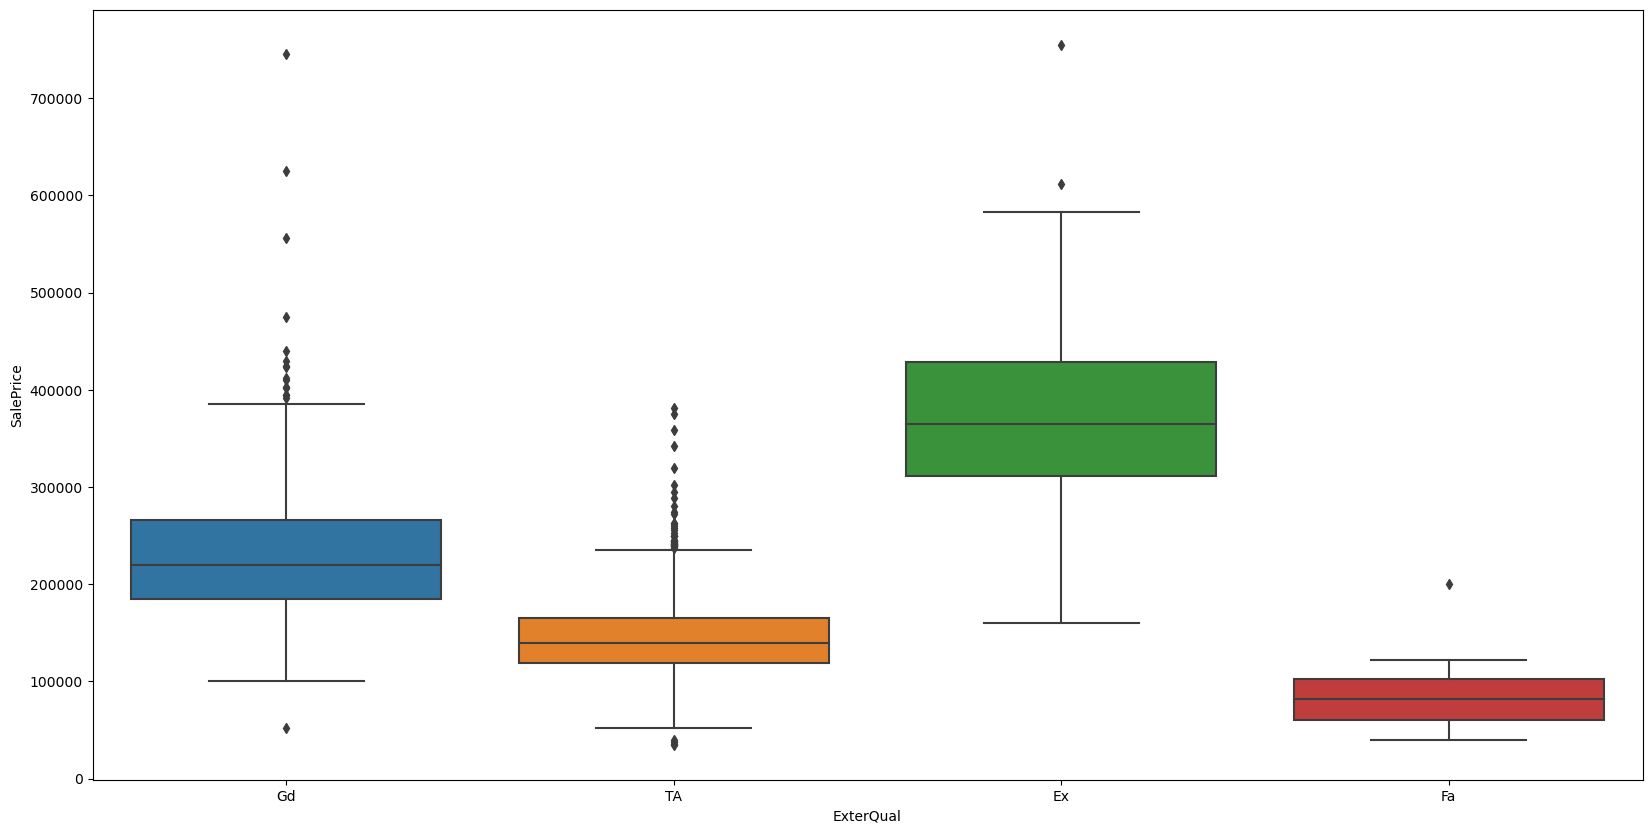

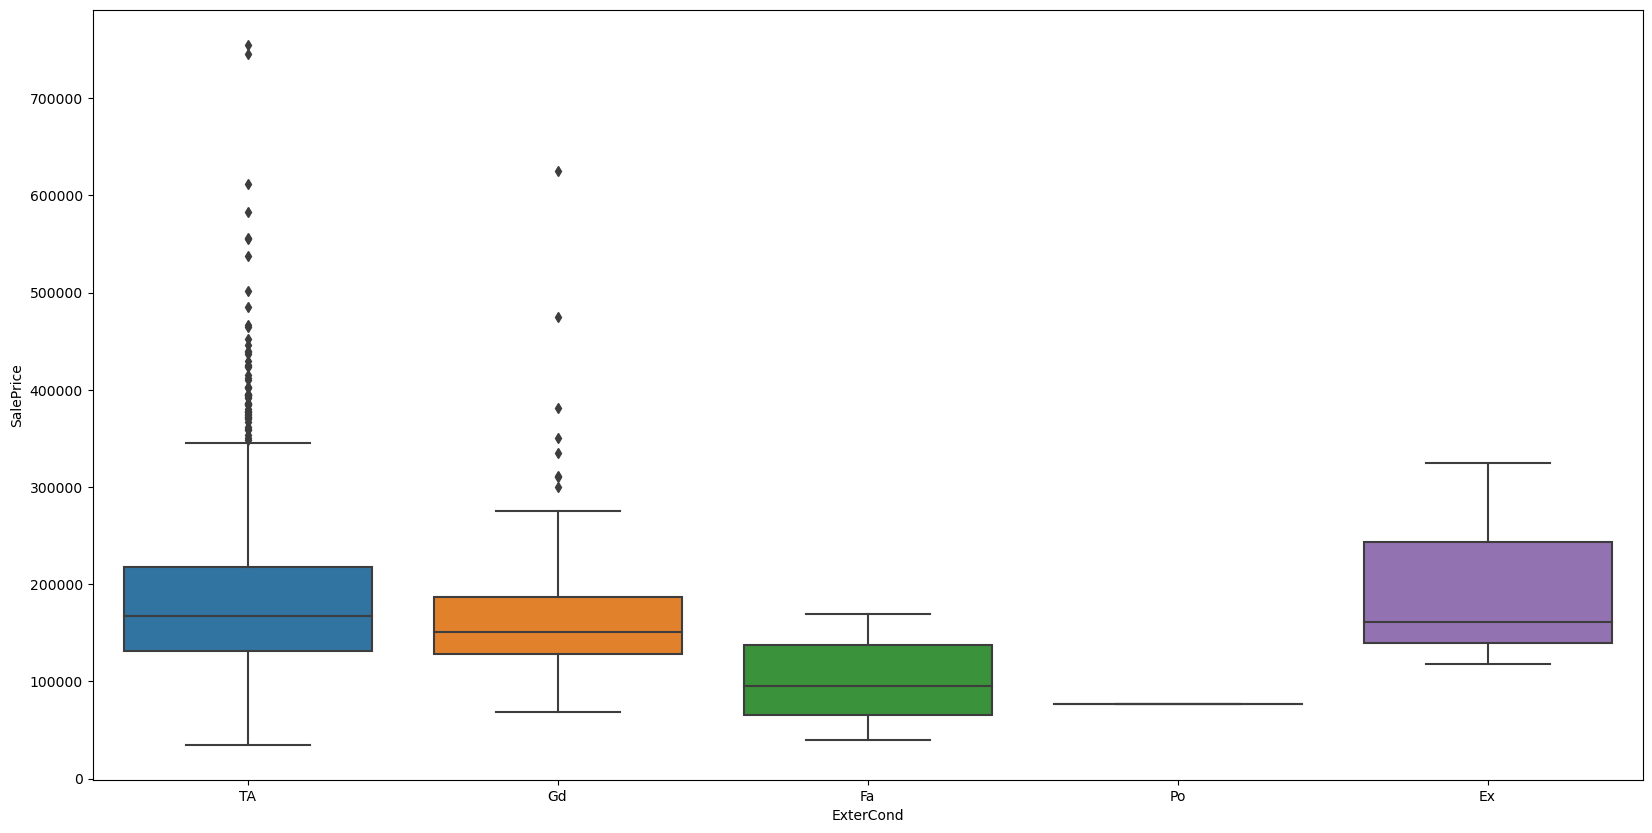

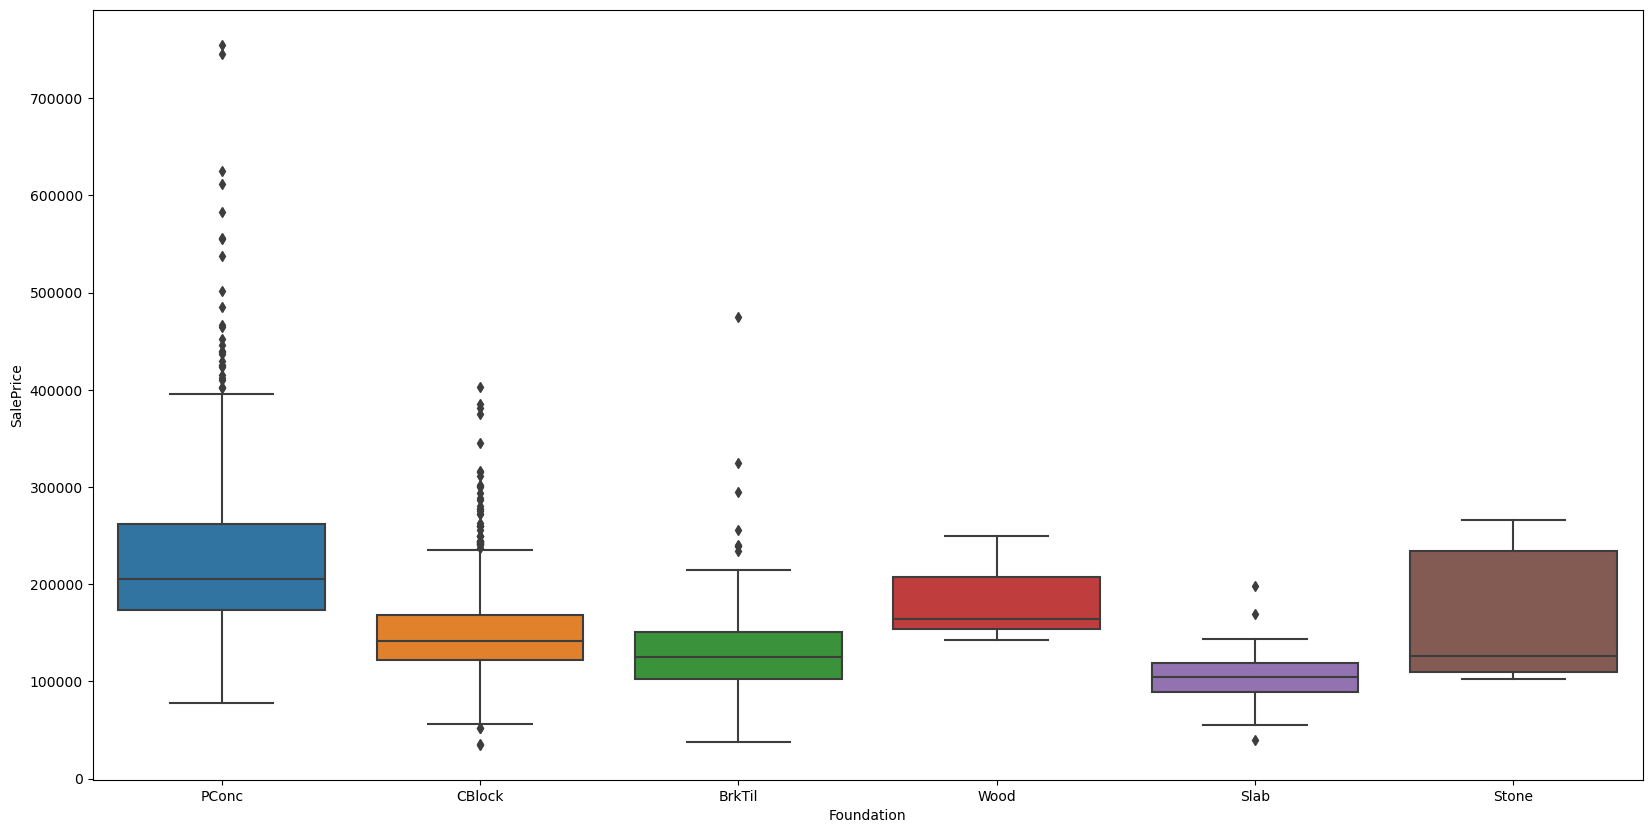

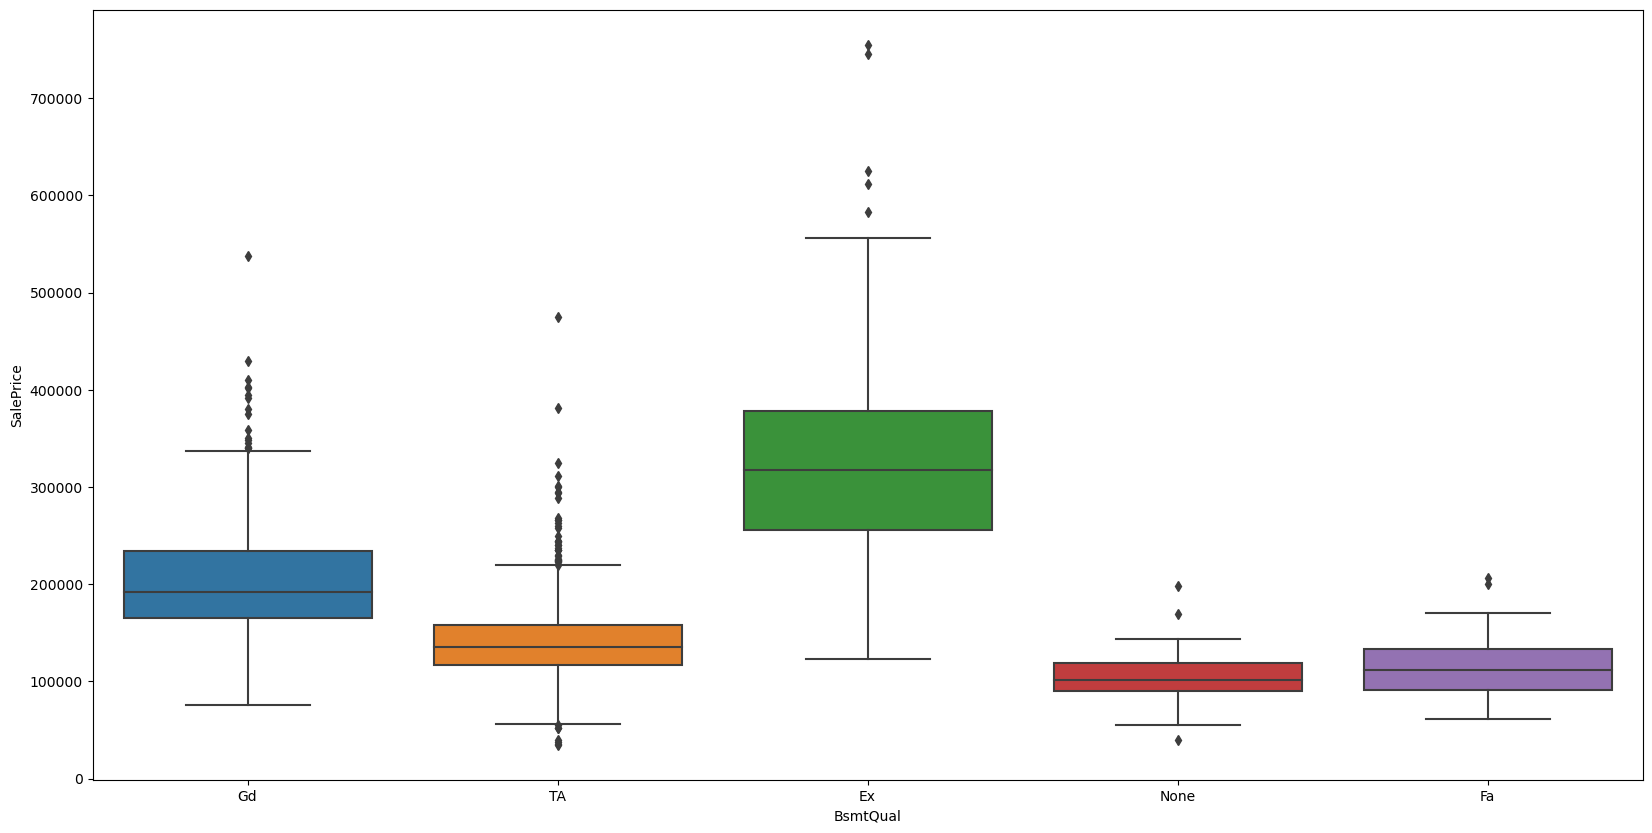

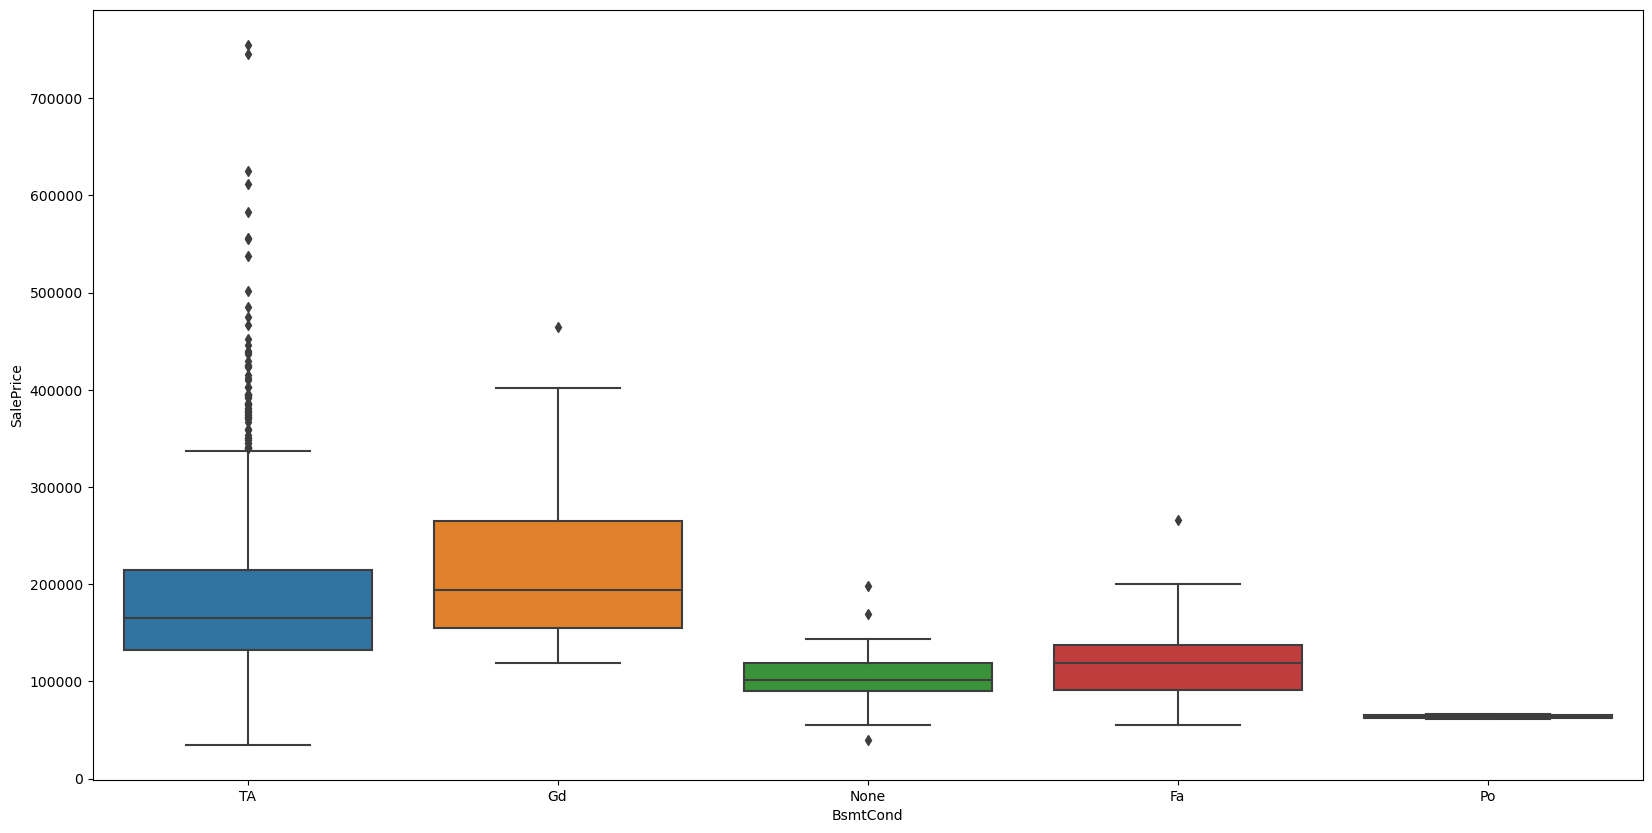

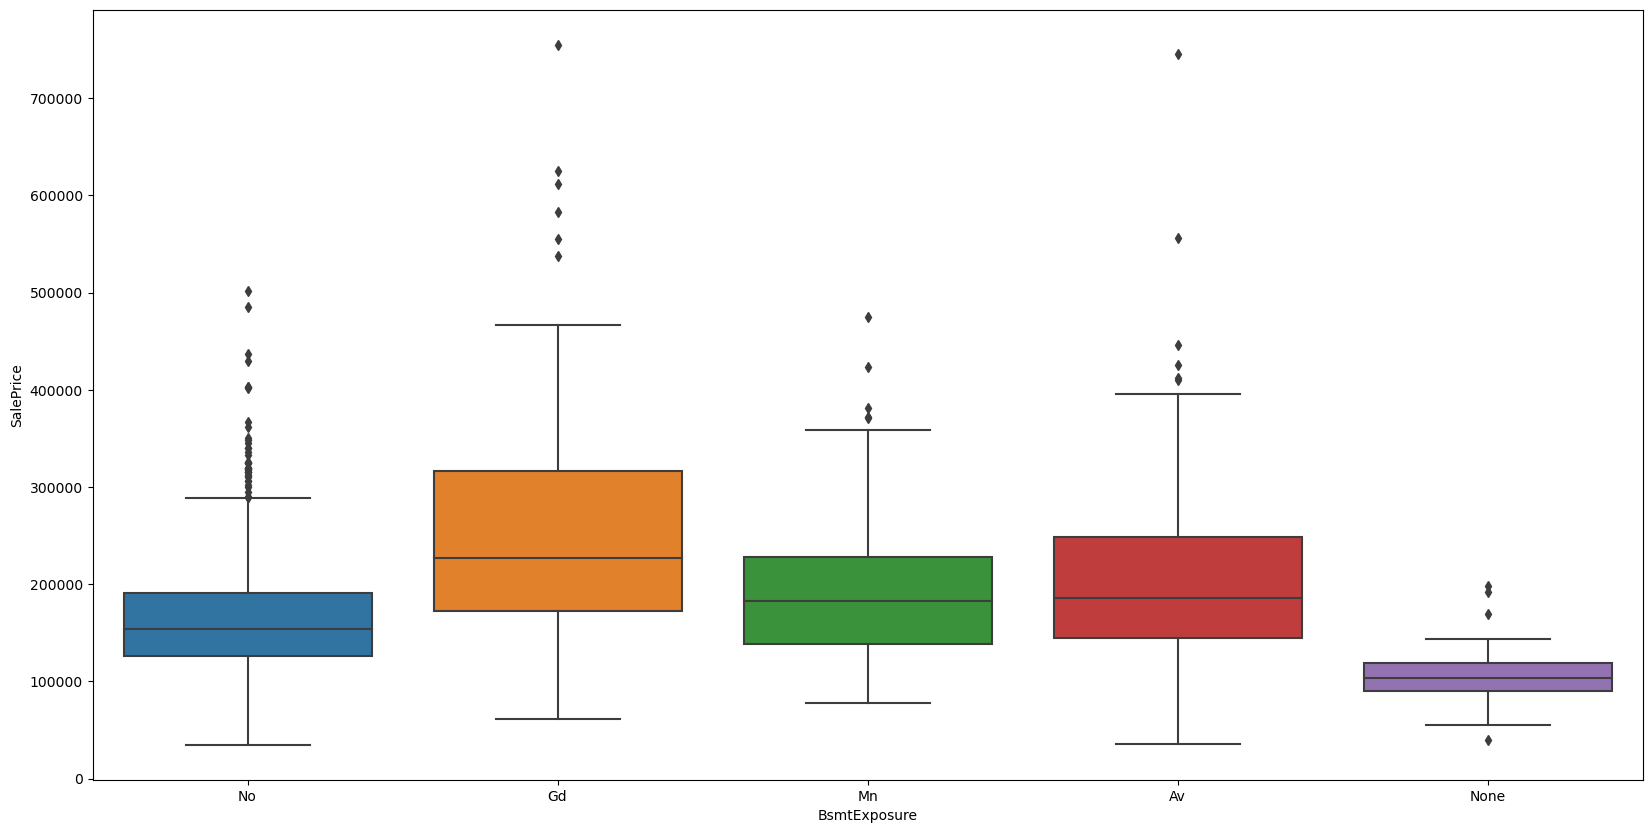

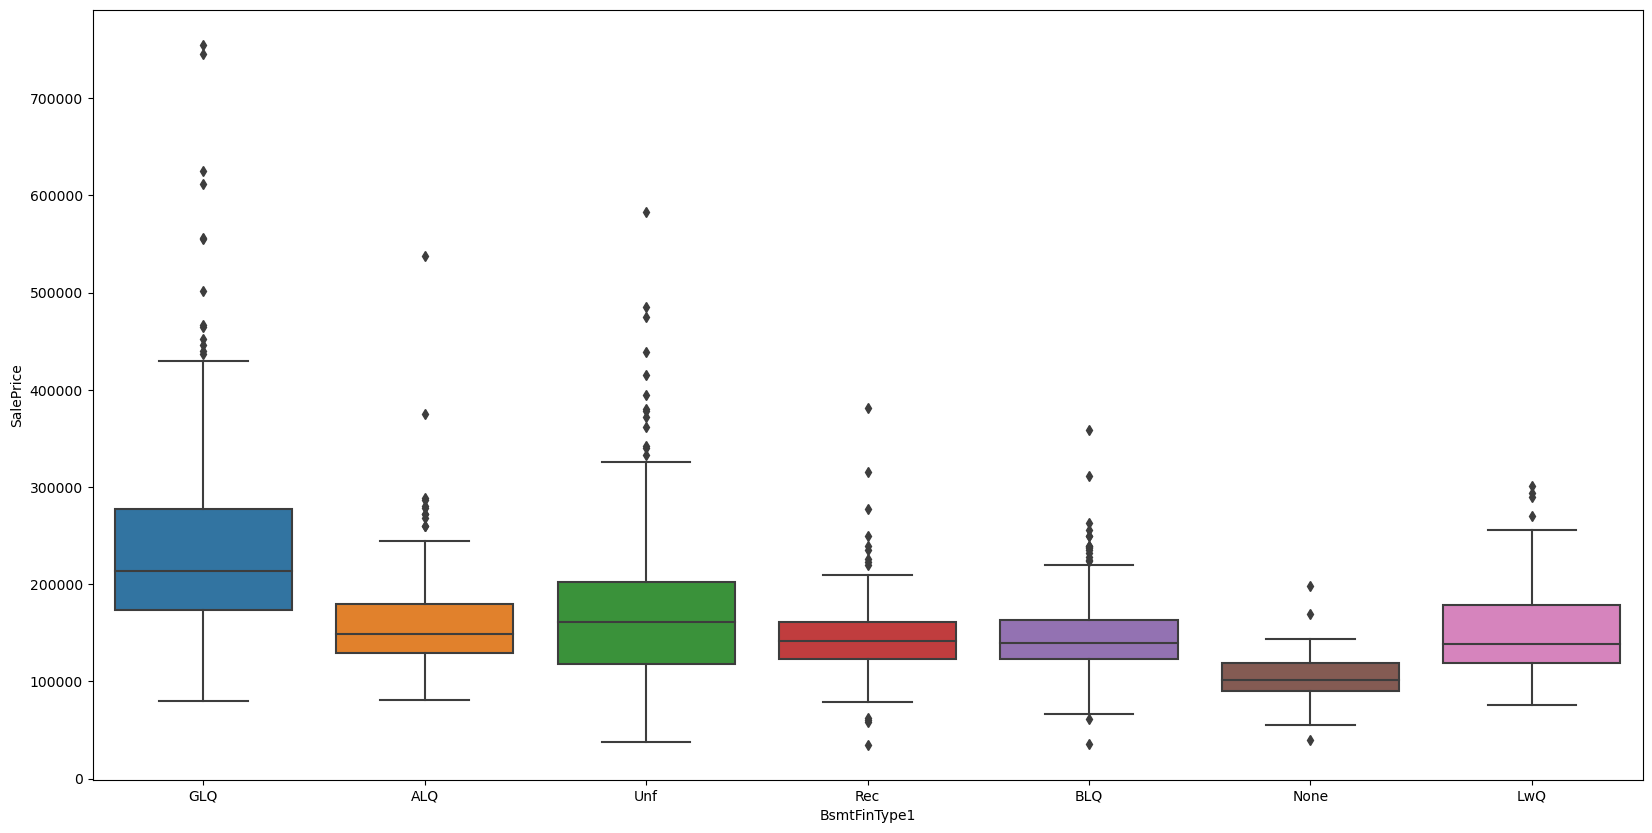

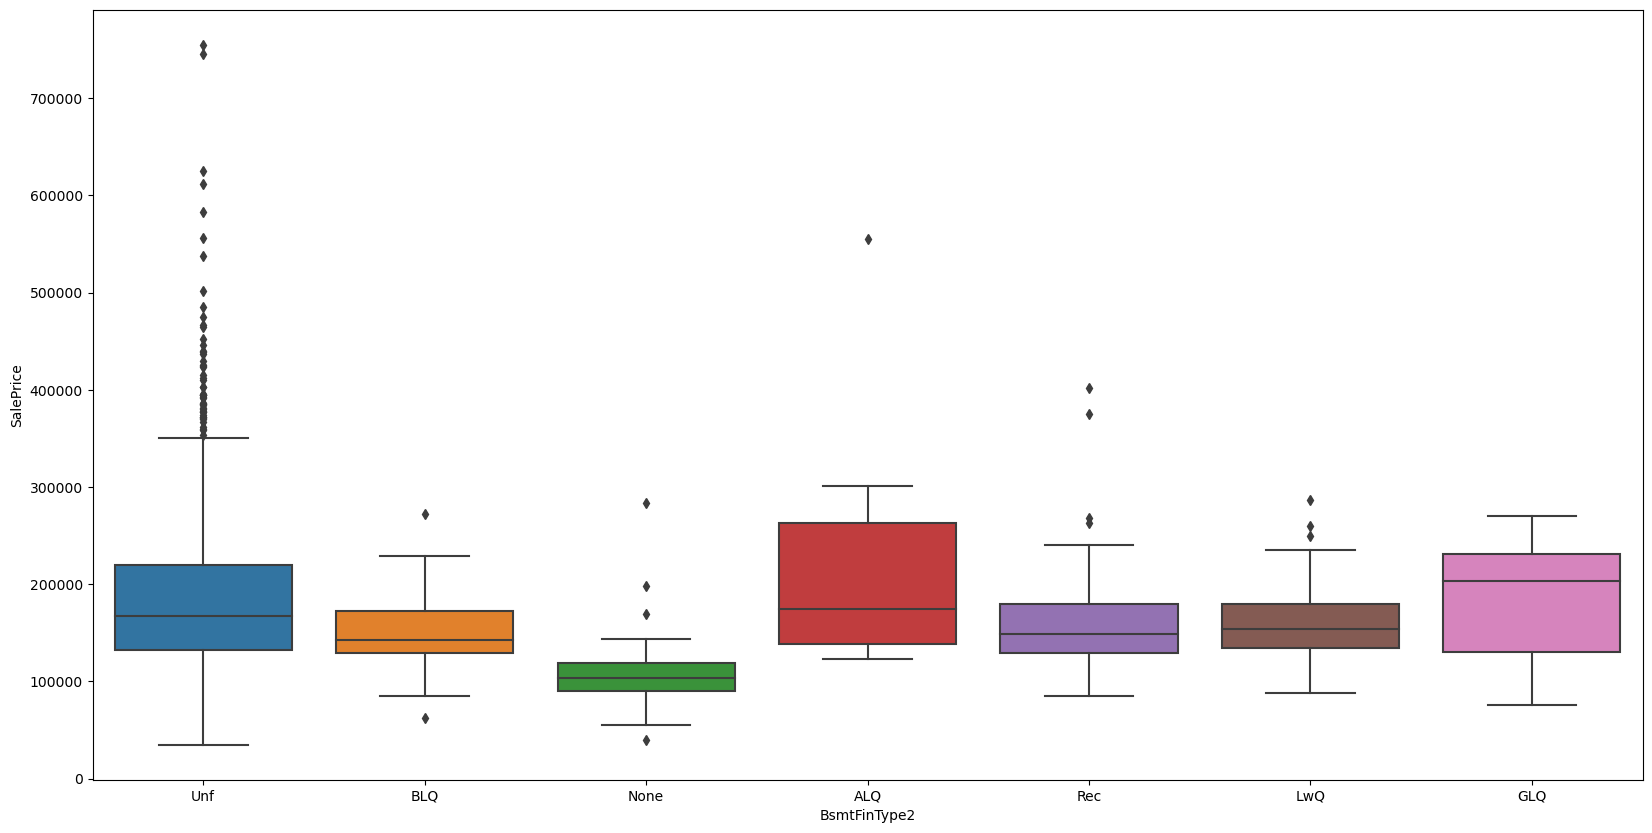

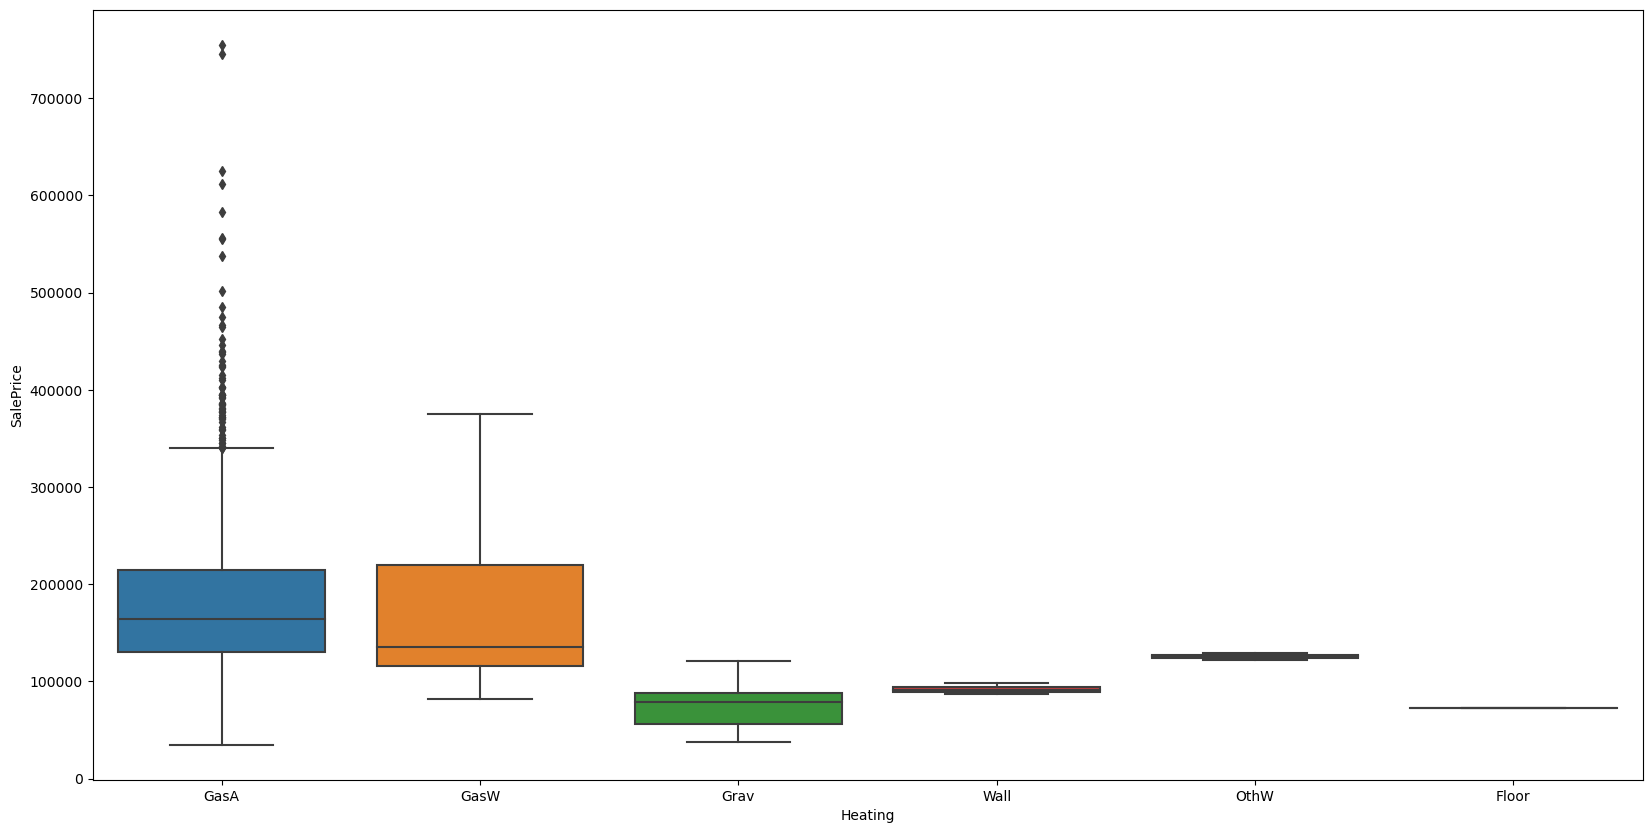

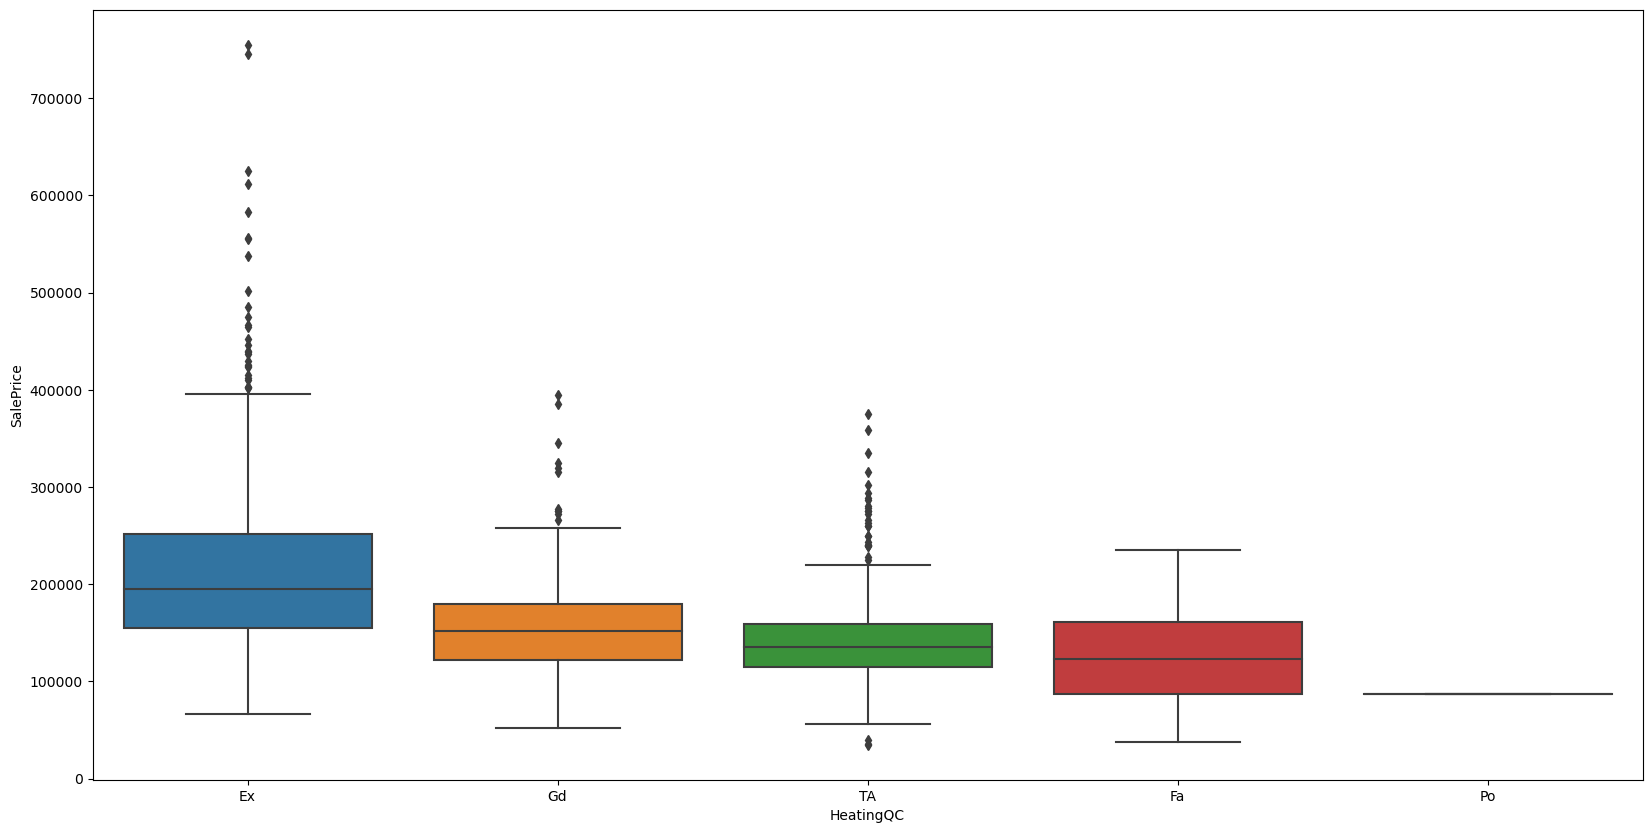

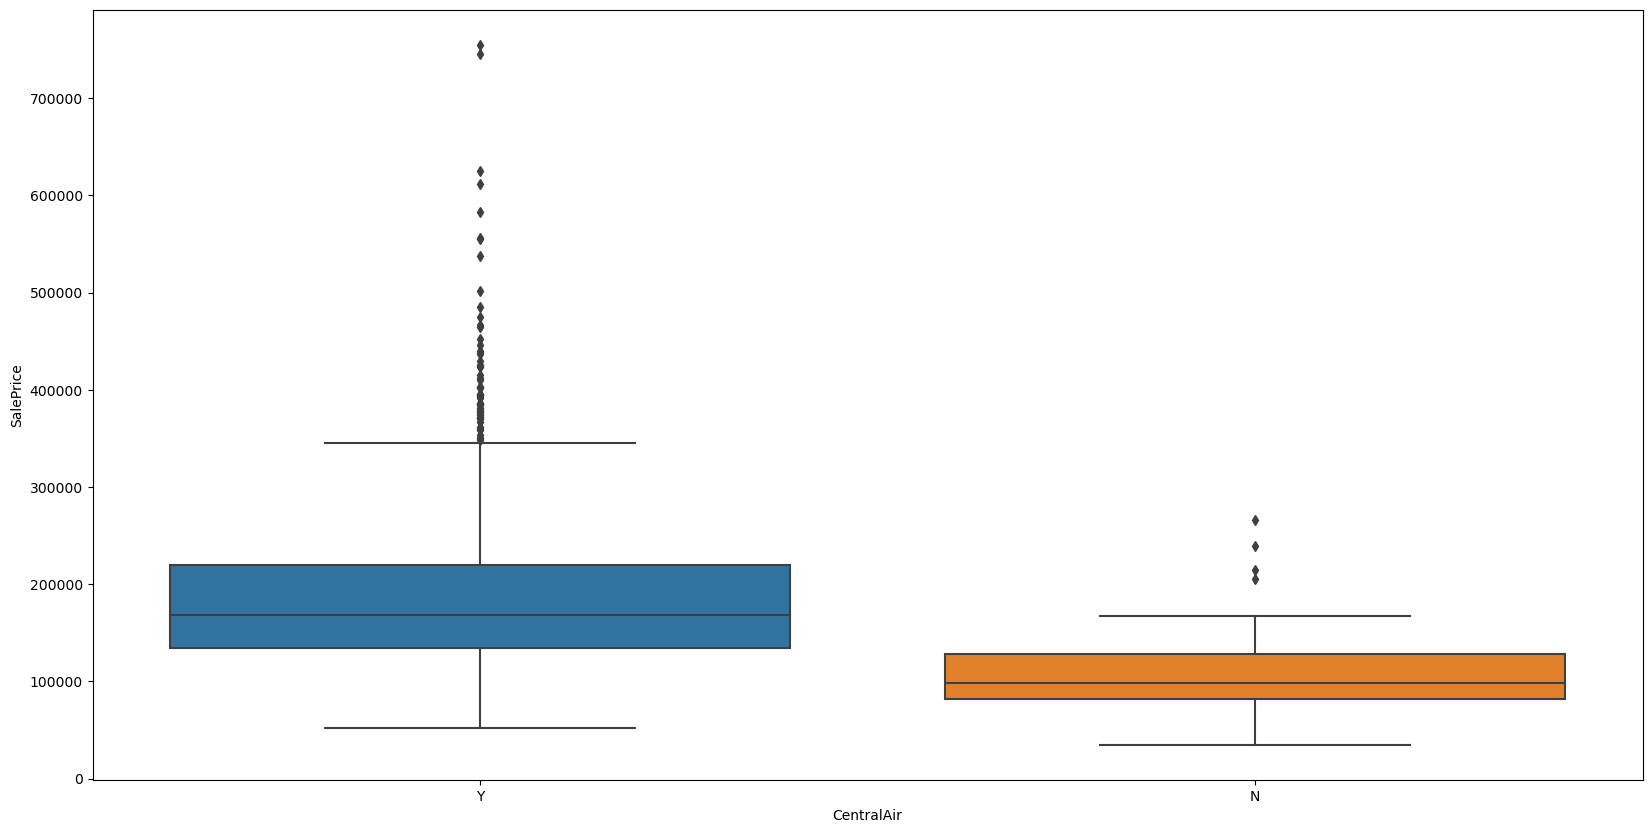

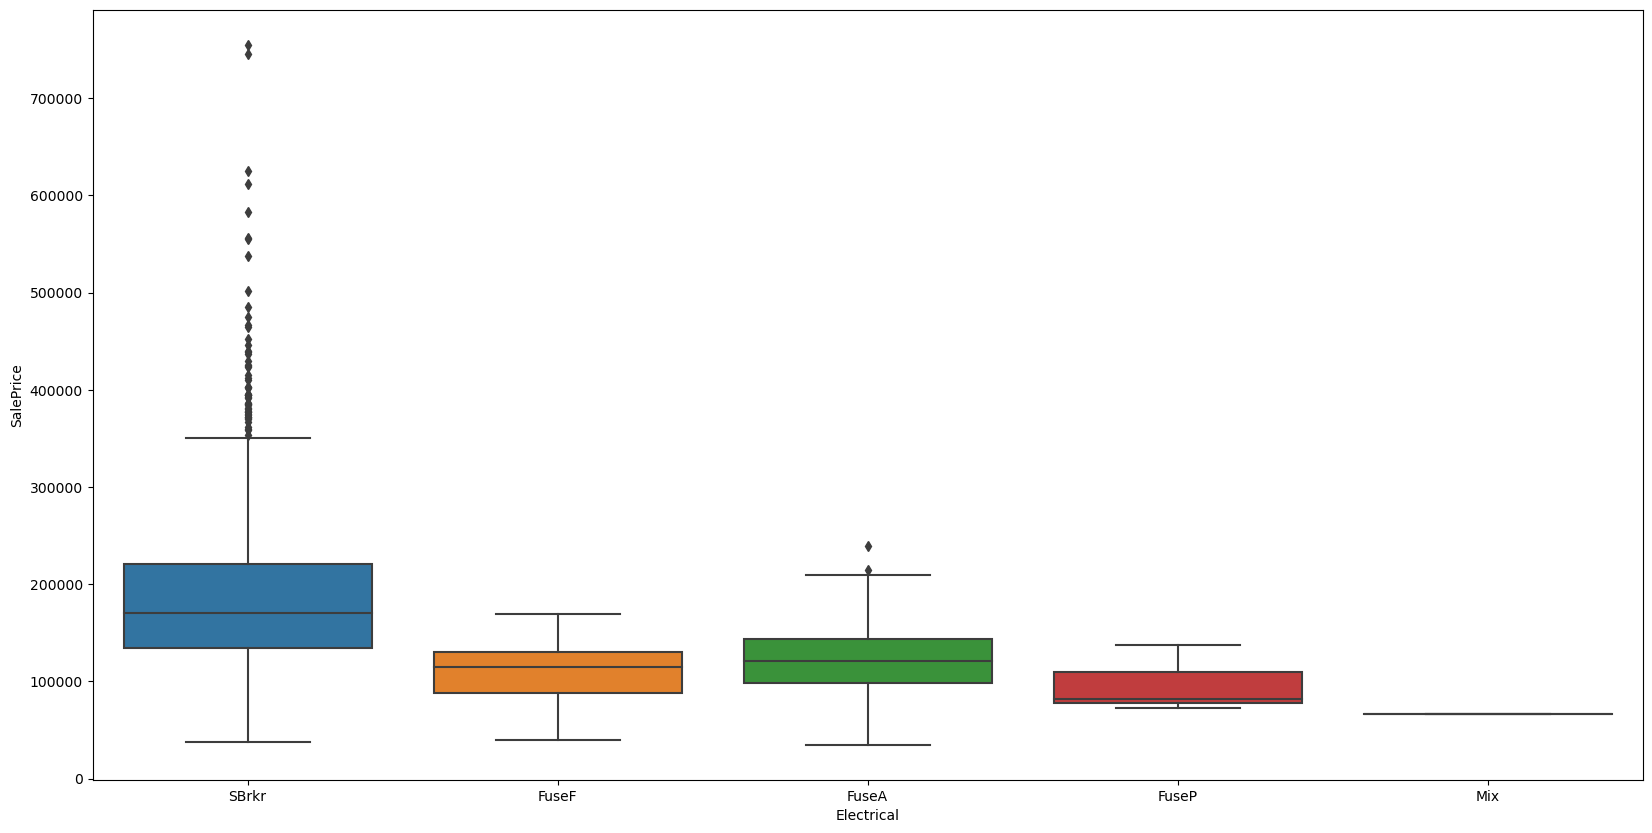

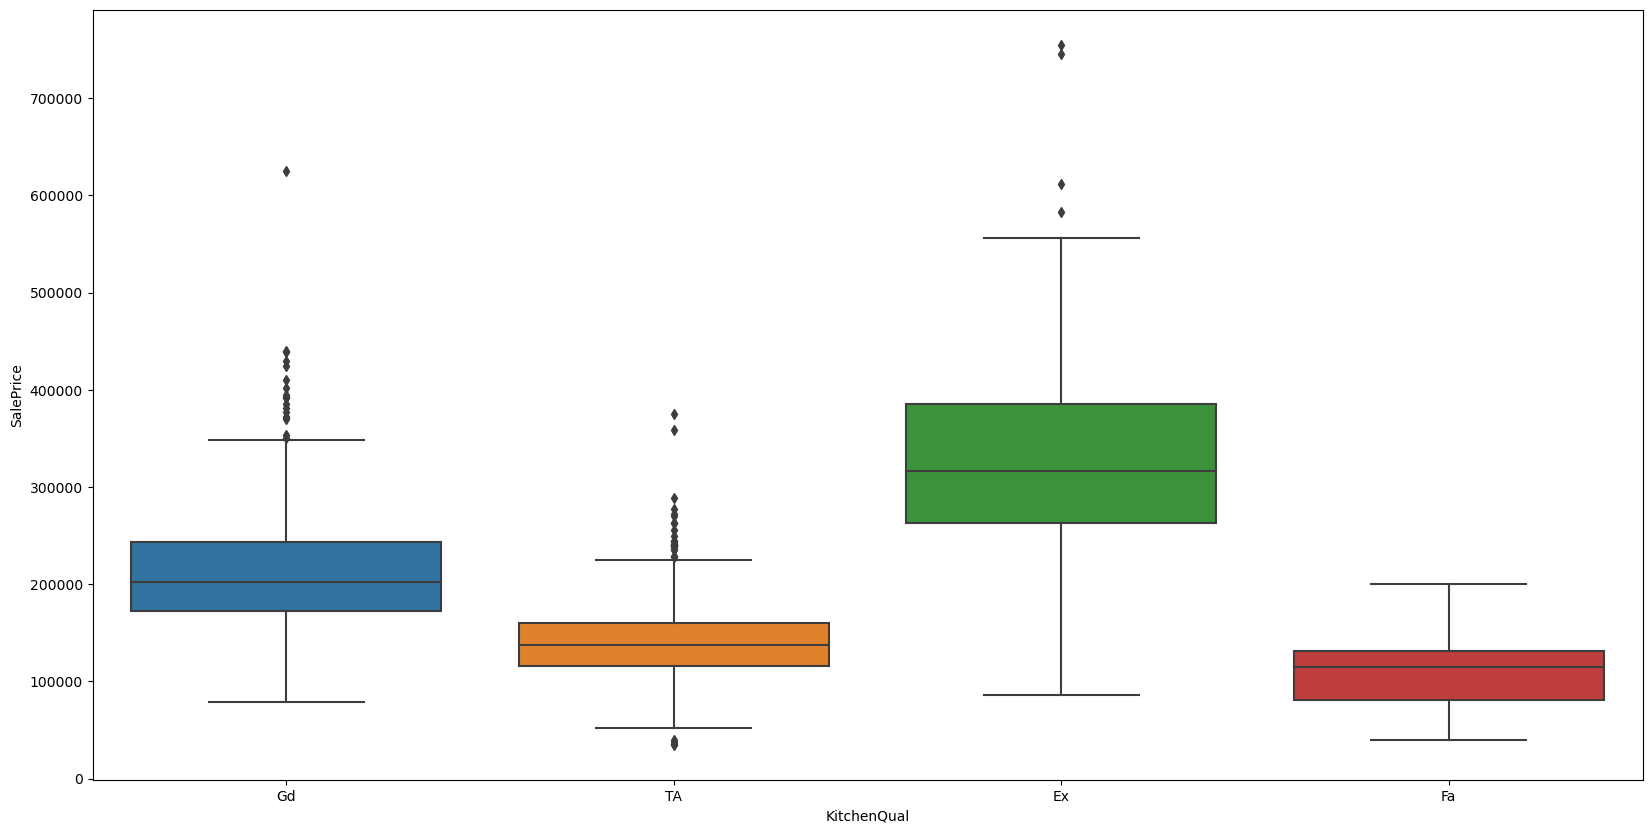

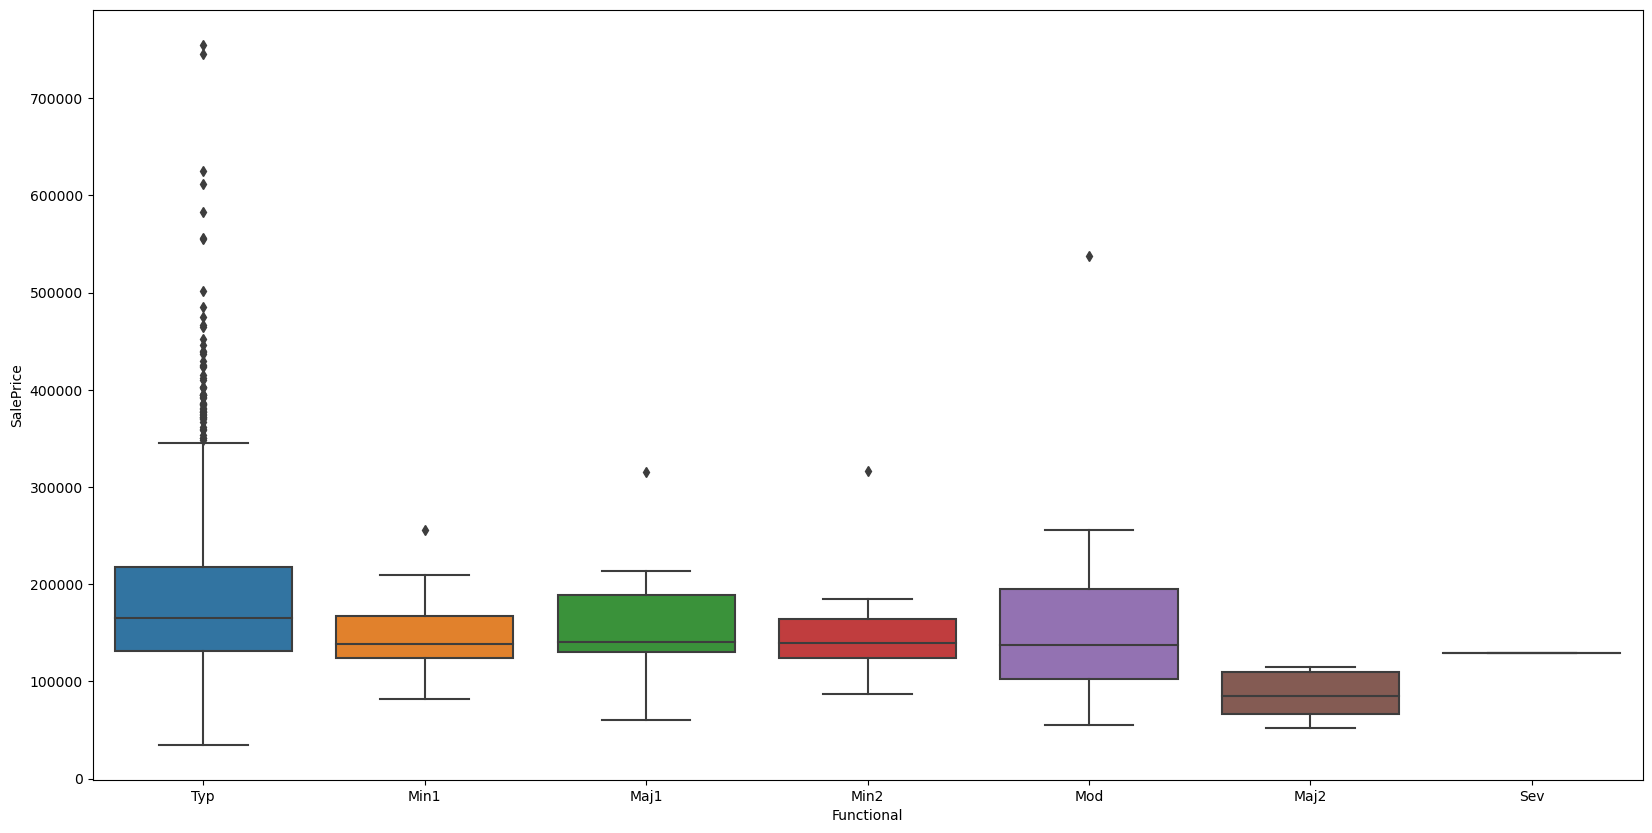

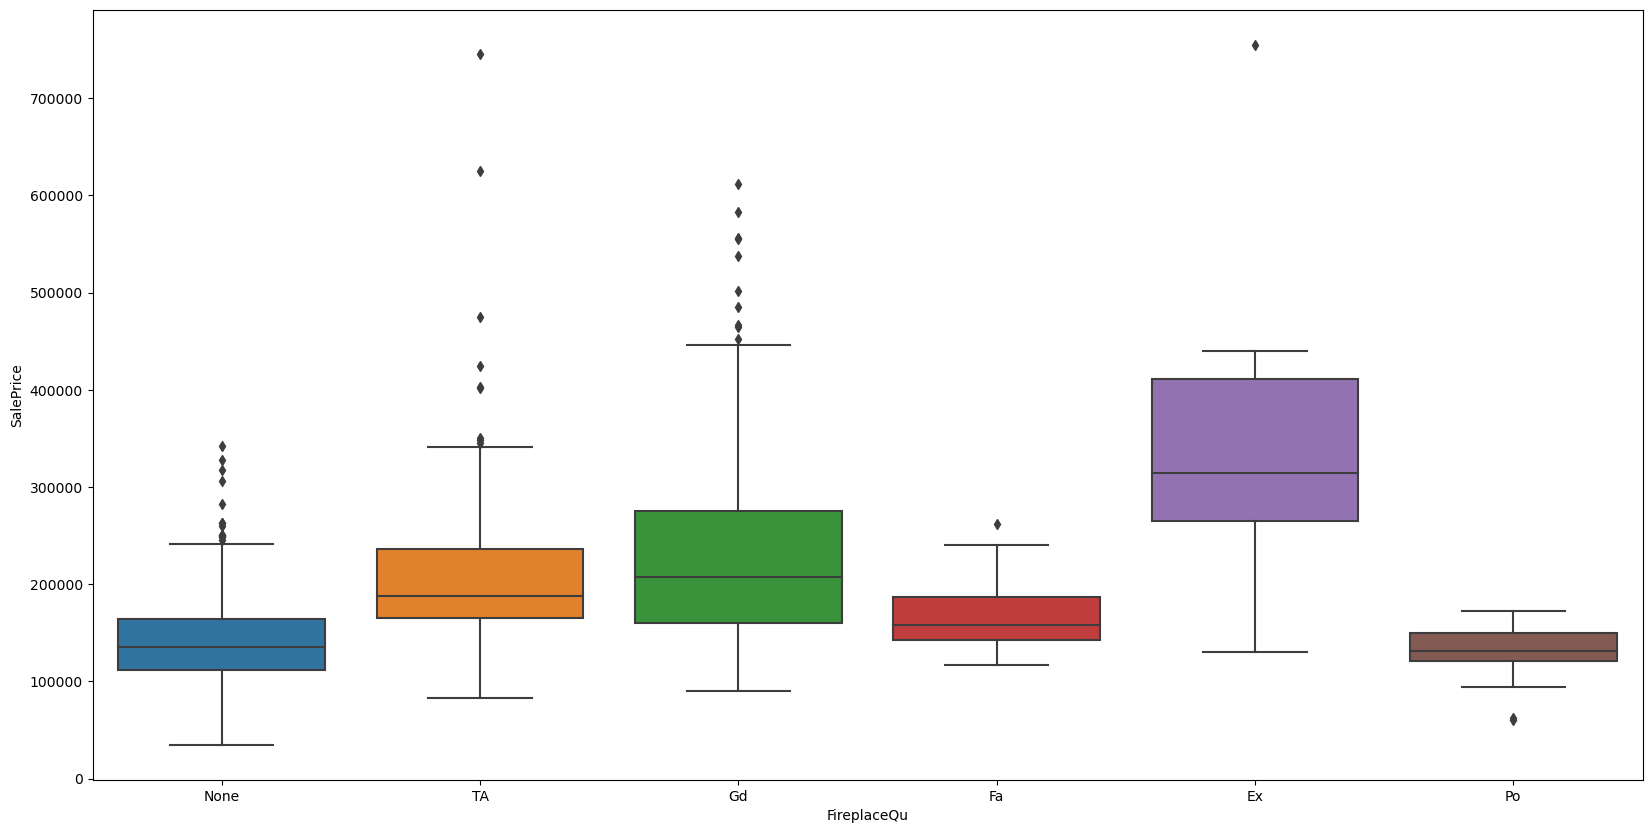

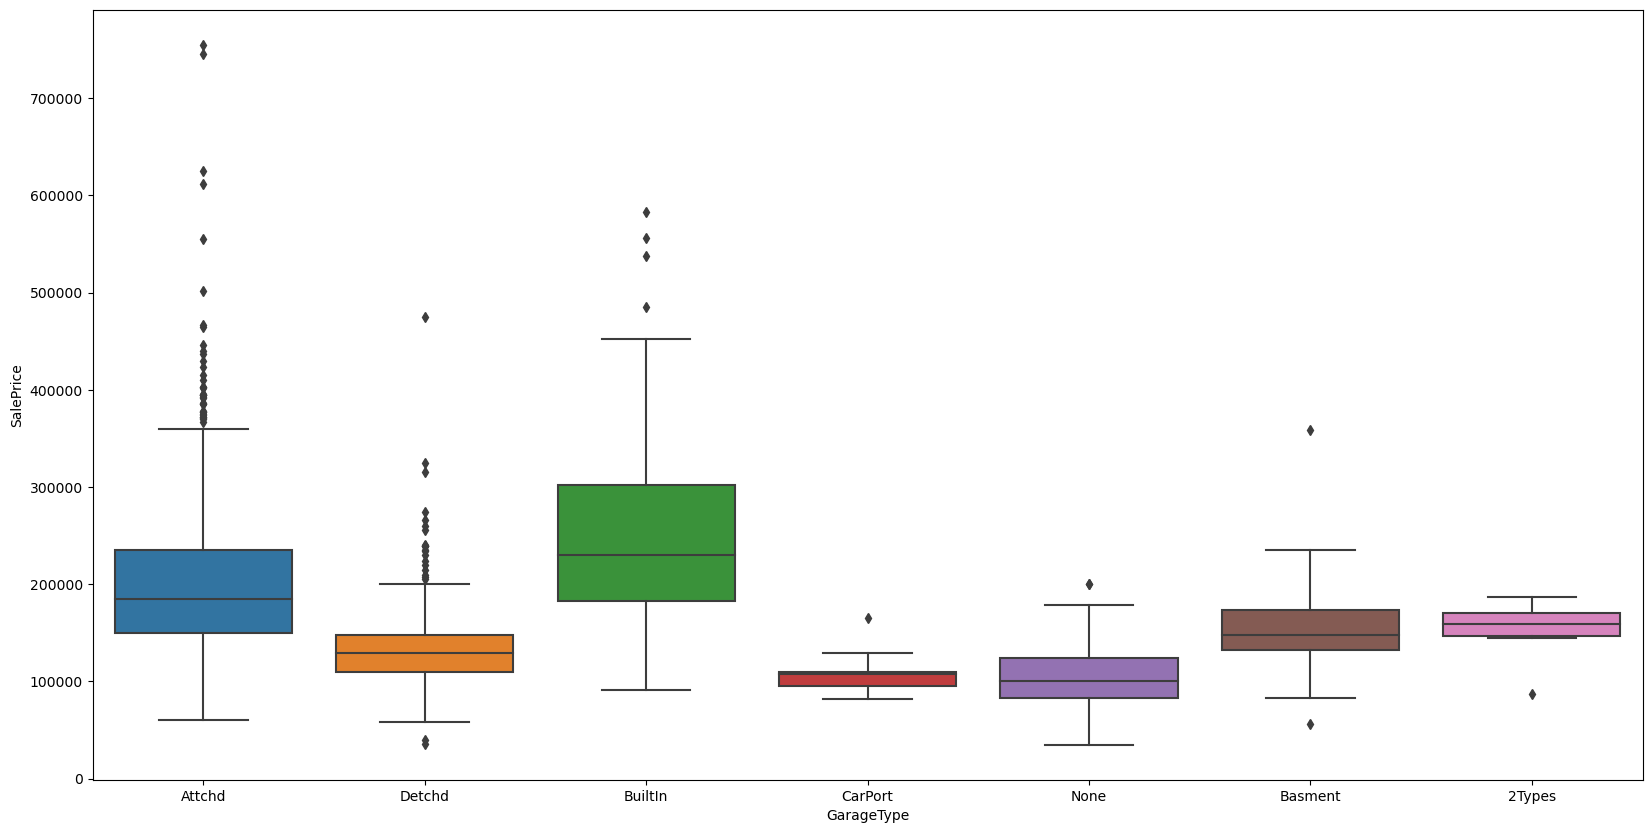

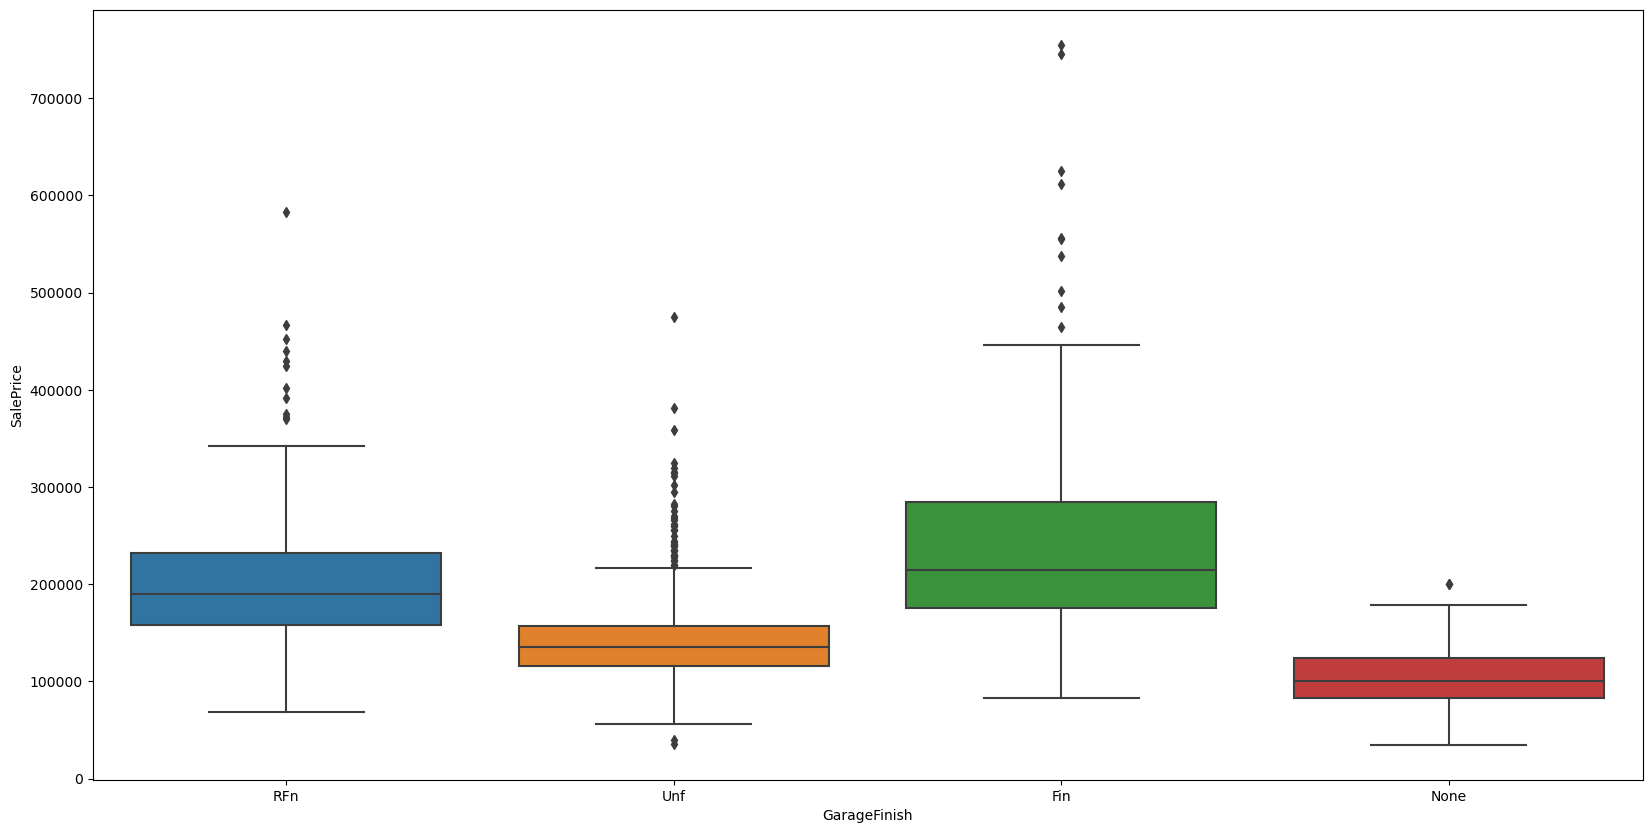

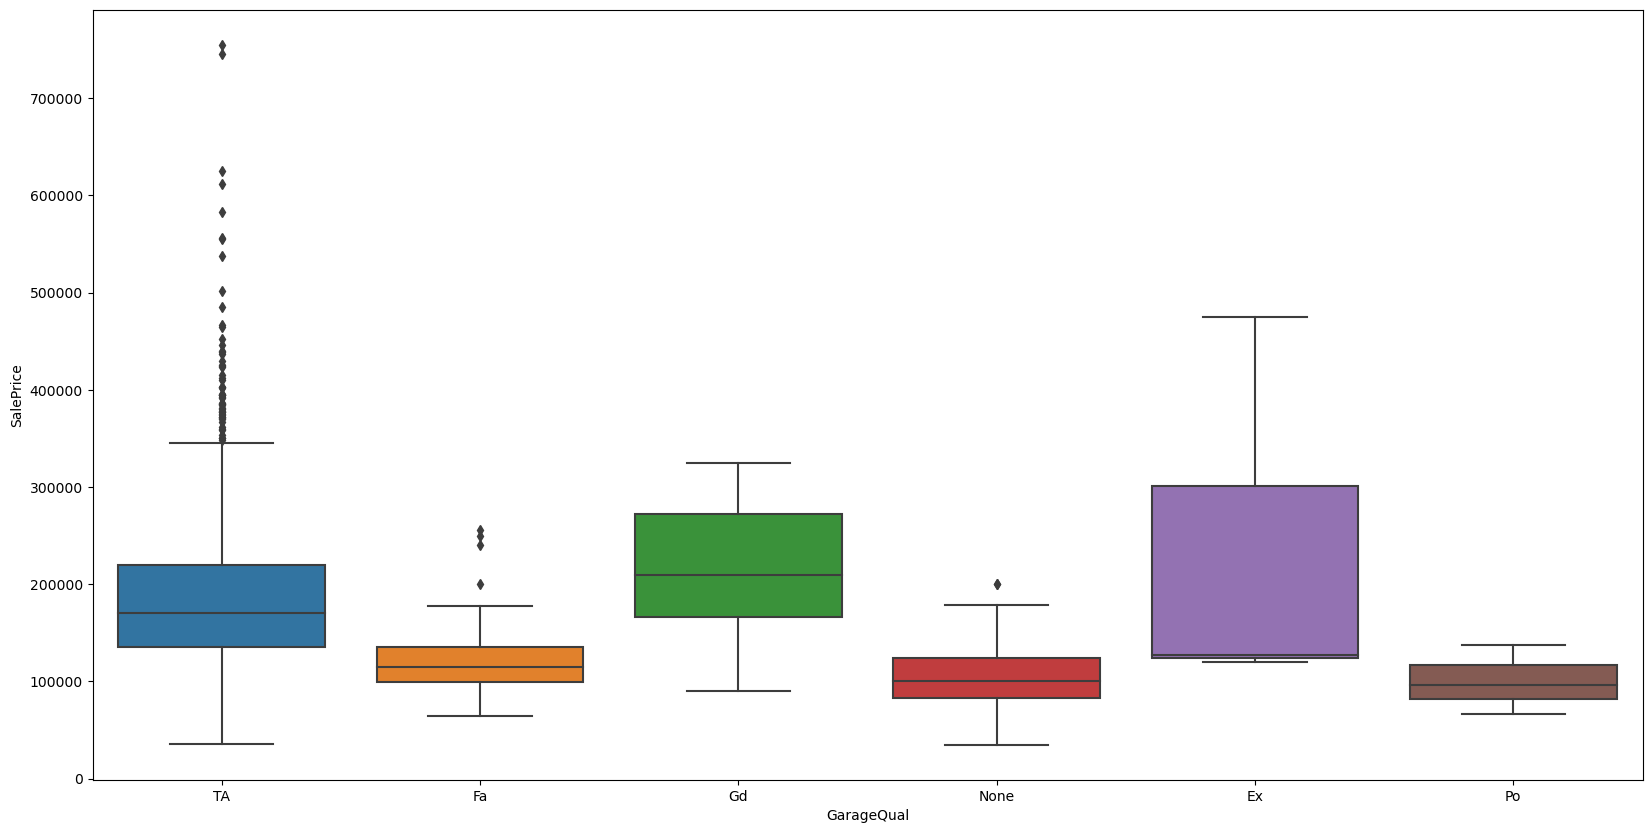

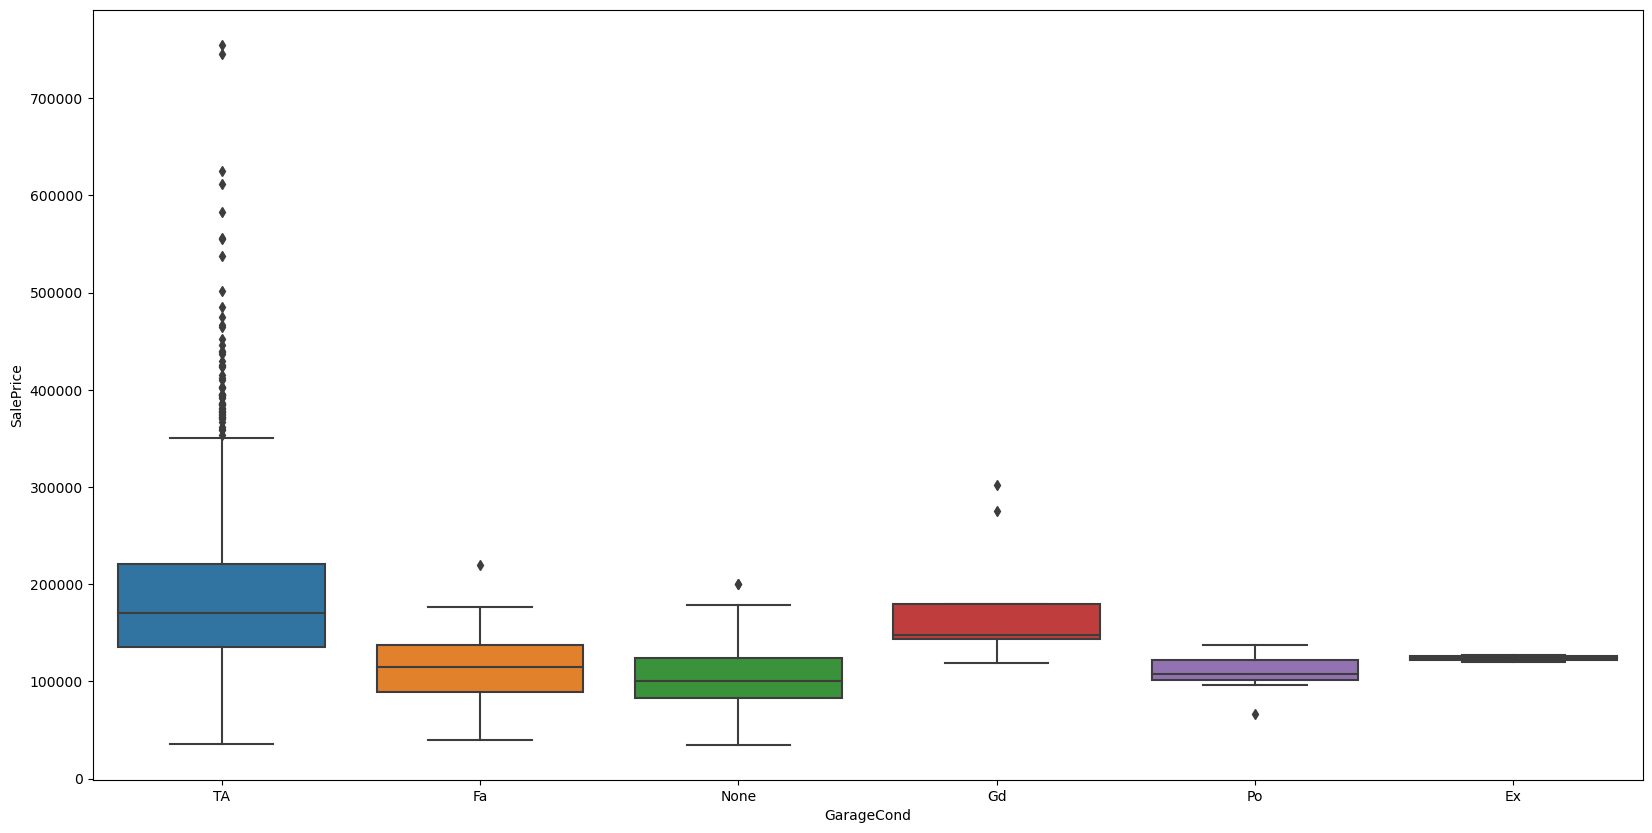

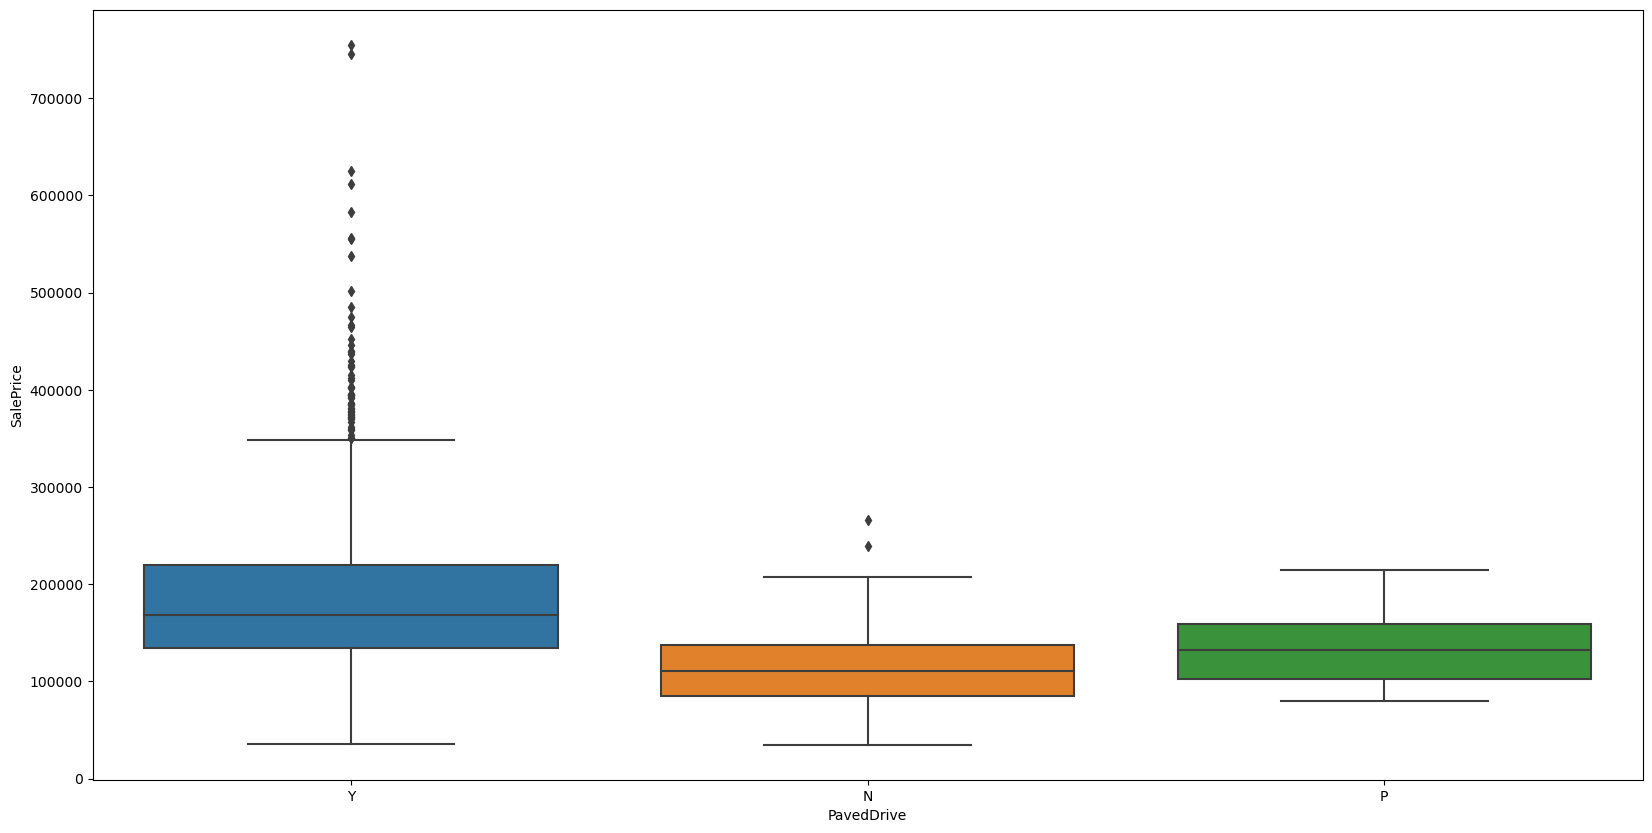

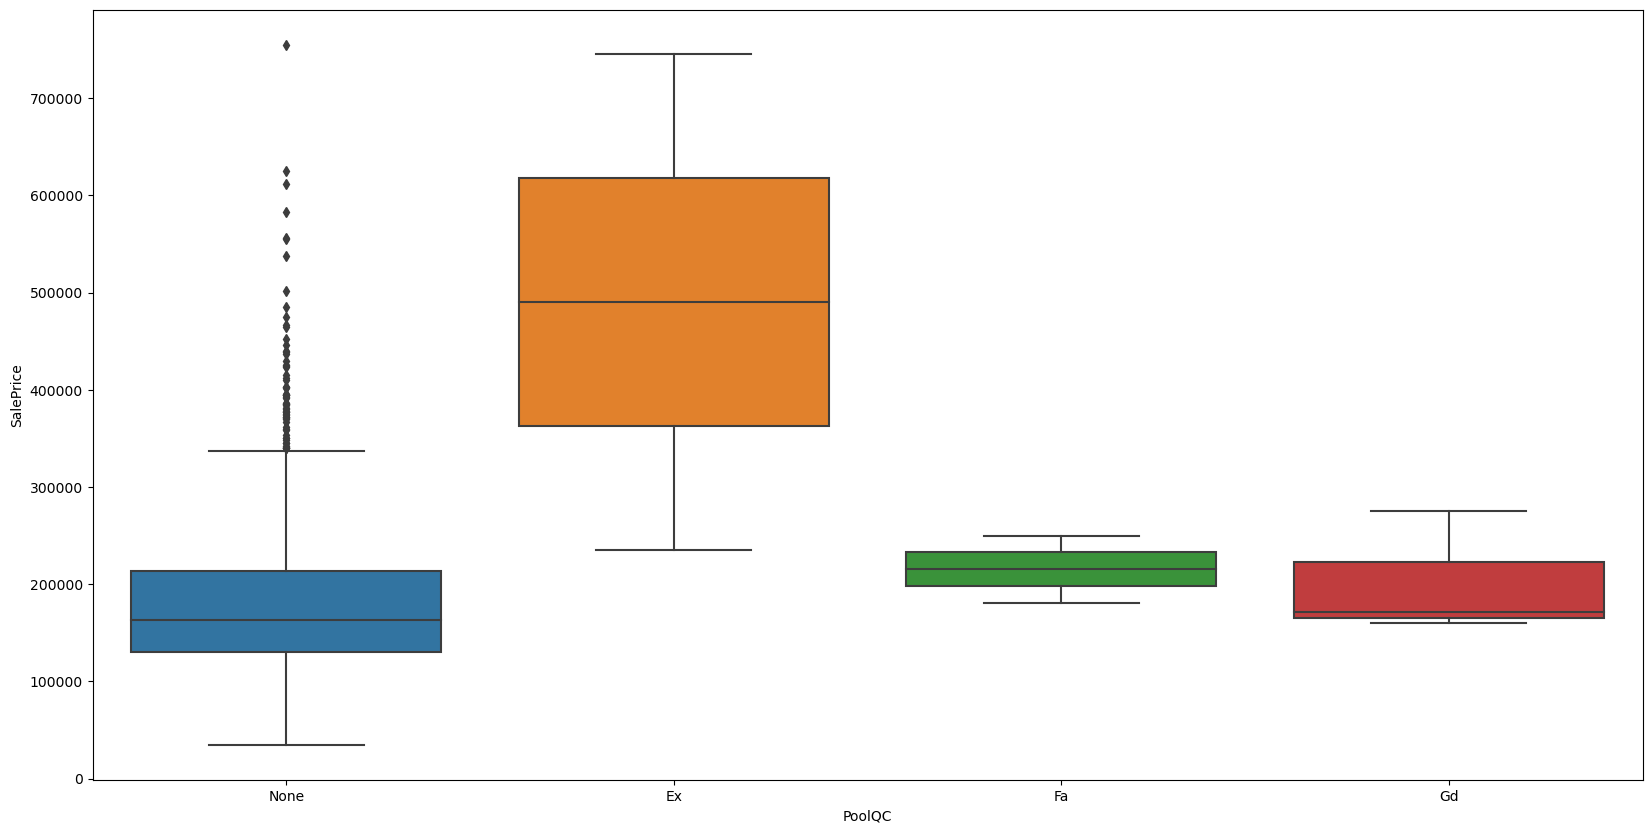

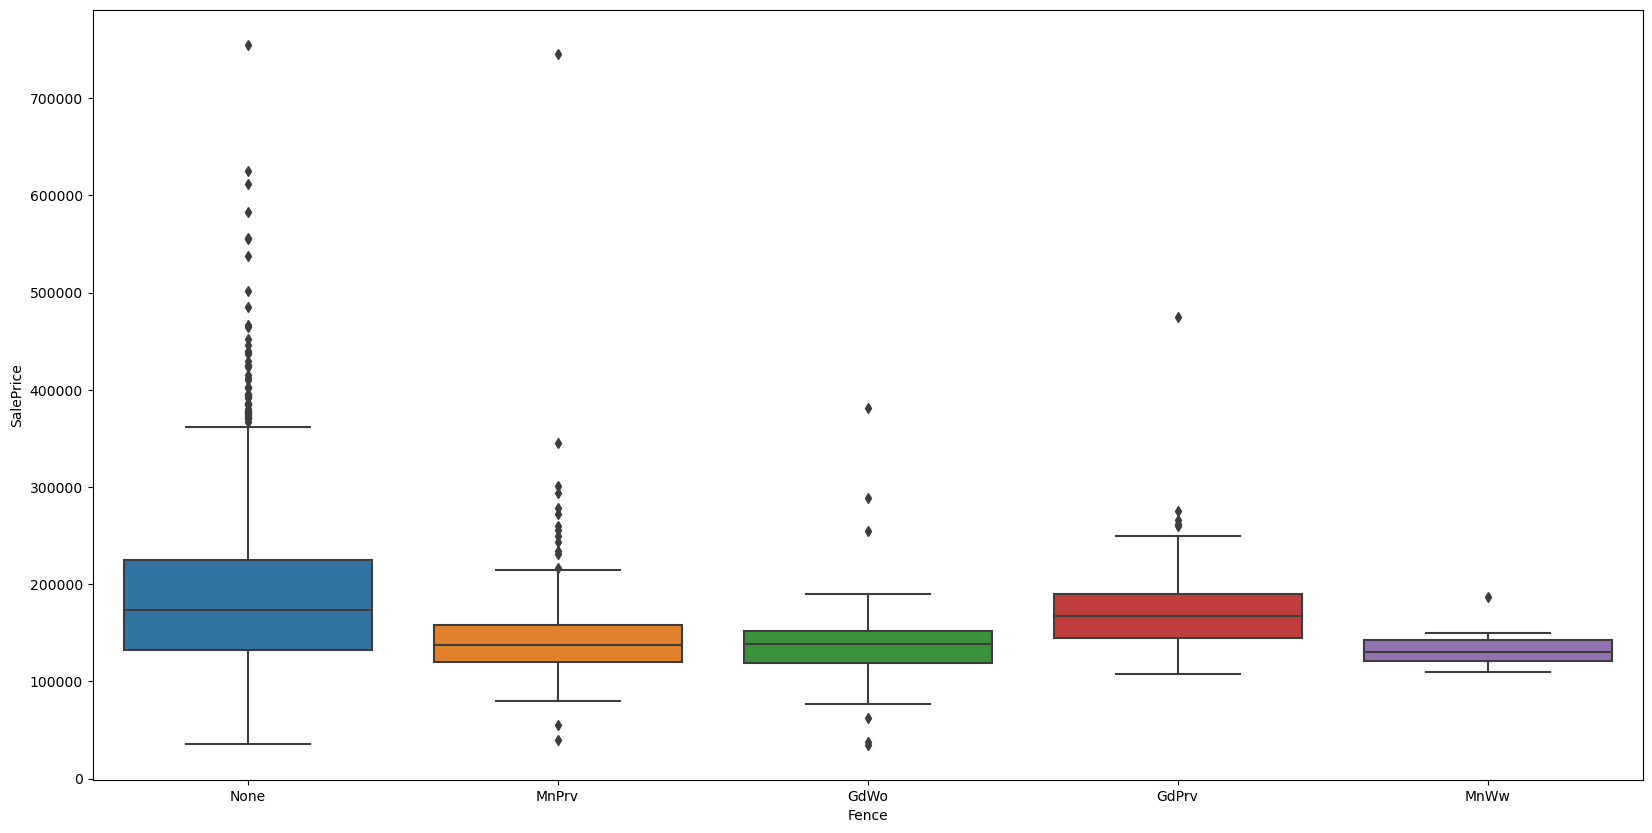

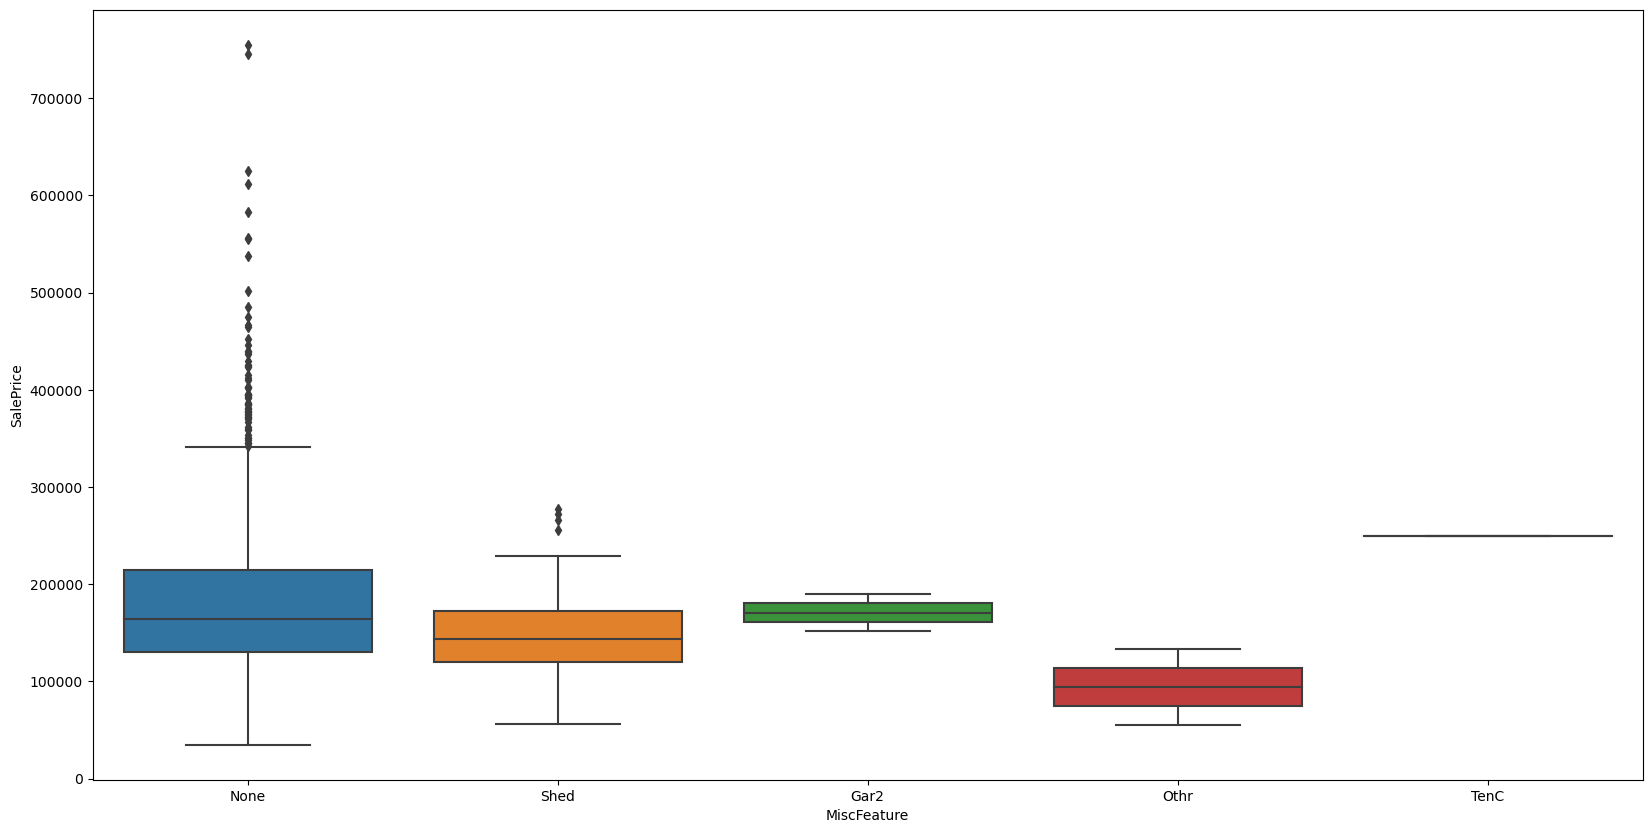

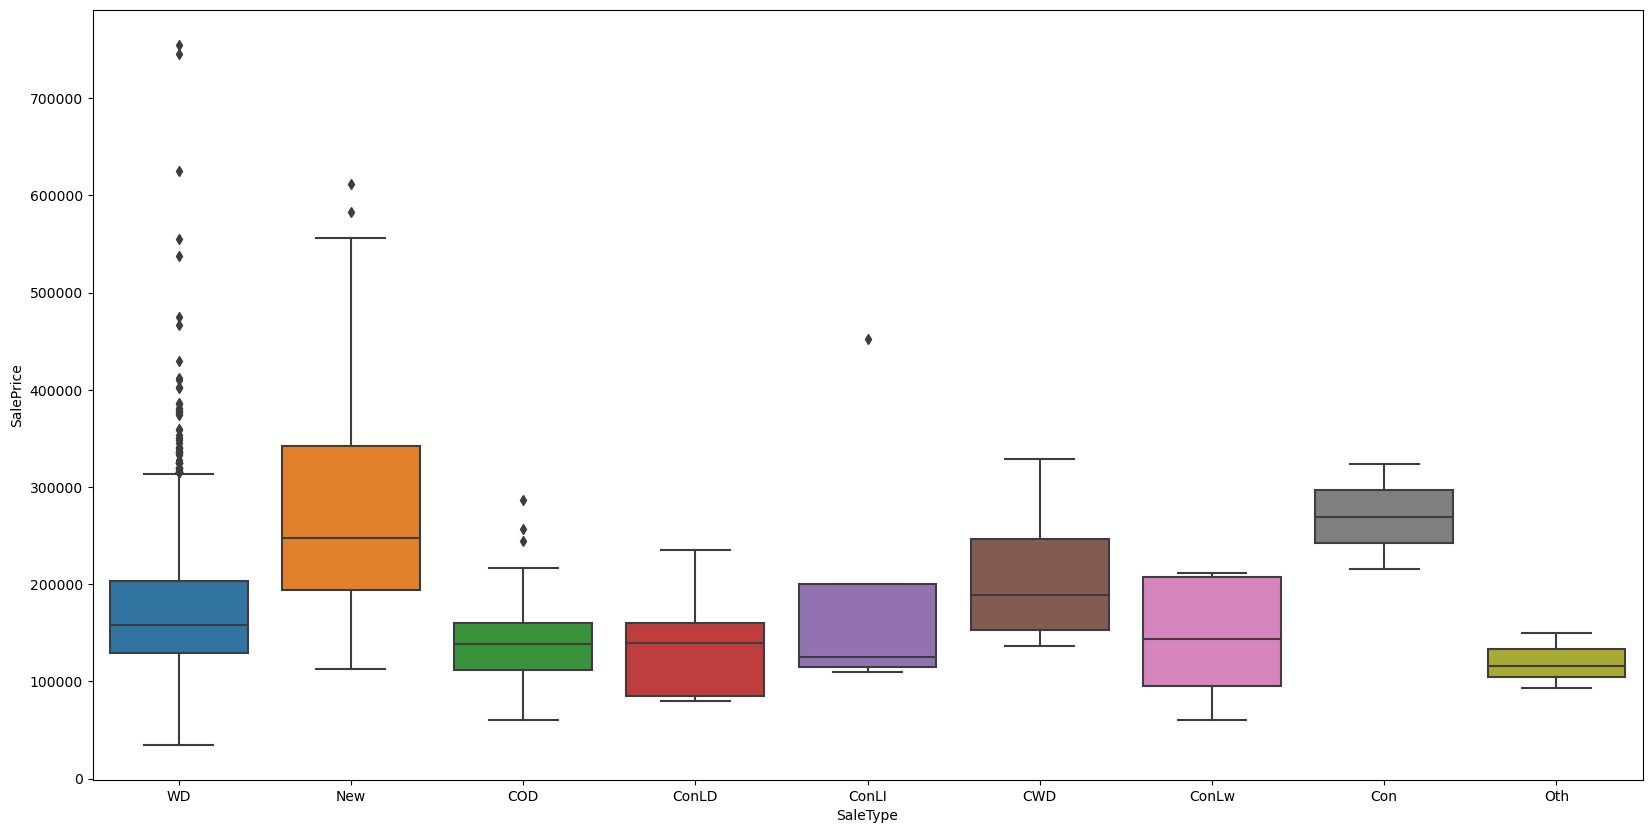

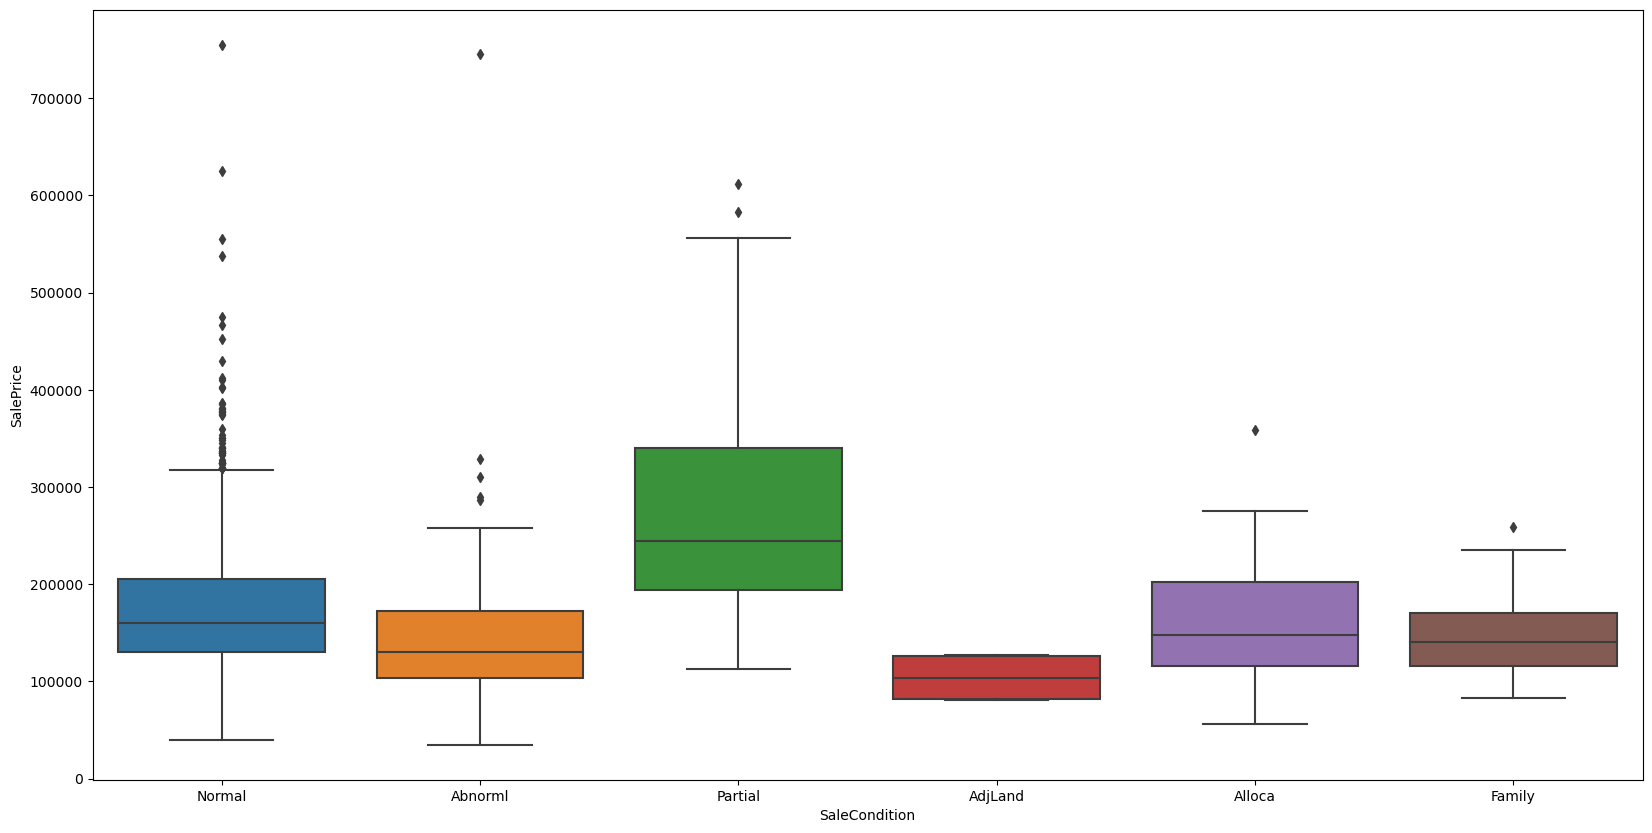

In [478]:
for i in categorical_columns:
    plt.figure(figsize=(20,10))
    sns.boxplot(data=housing, x=i, y='SalePrice')
    plt.show()

- We see from the box plot on categorical variables features show definite distingushable patterns for SalePrice for the categories they represent 
    - MSZoning, Street,Alley,BuildingType, MasVnrType, ExterQual, ExterCond, OverallCond, OverallQual, Foundation, BsmtType, BstmQual, BsmtExposure etc (the box plot above depicts the relation and other features)

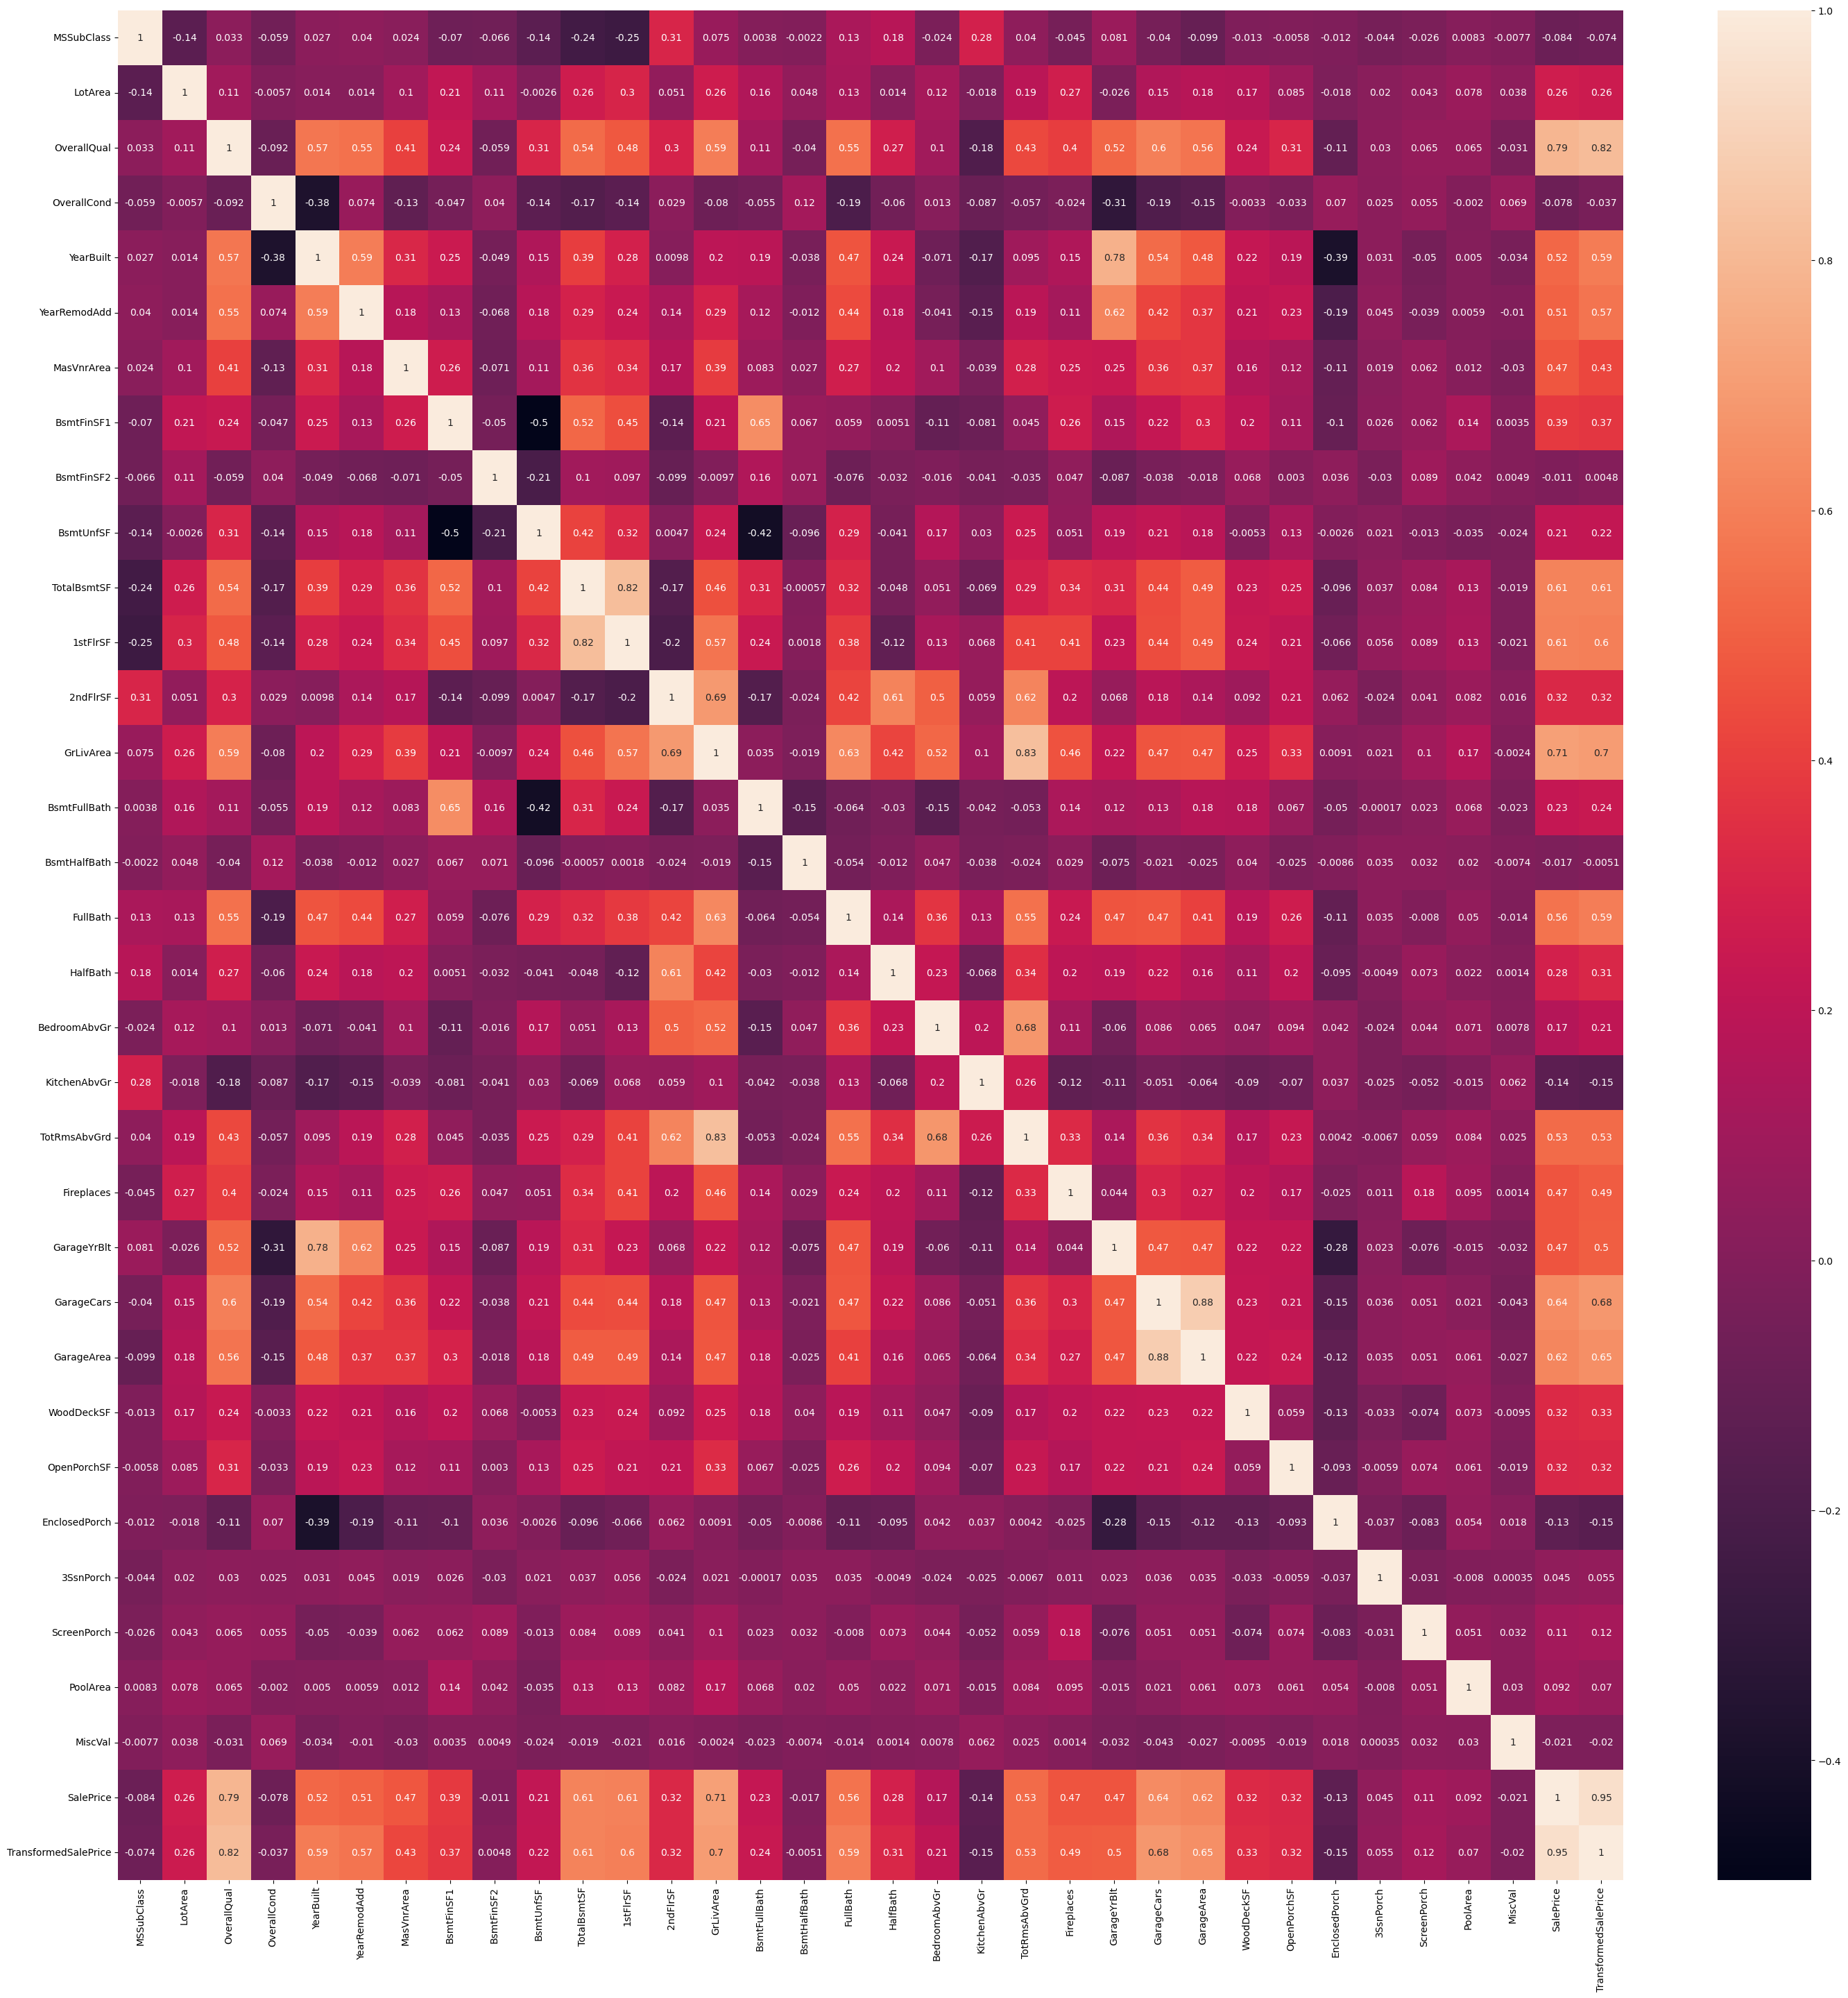

In [479]:
plt.figure(figsize=(35,35))
sns.heatmap(housing.corr(), annot=True)
plt.show()

- We see features which are correlated to SalePrice 
- We also see features which are correlated between then for ex ['GarageYrBuild', 'YearBuilt'] & ['TotalRmsAbvGrd', 'GrLivArea']

- Below we look at the subset of most prominent features and thier correlation

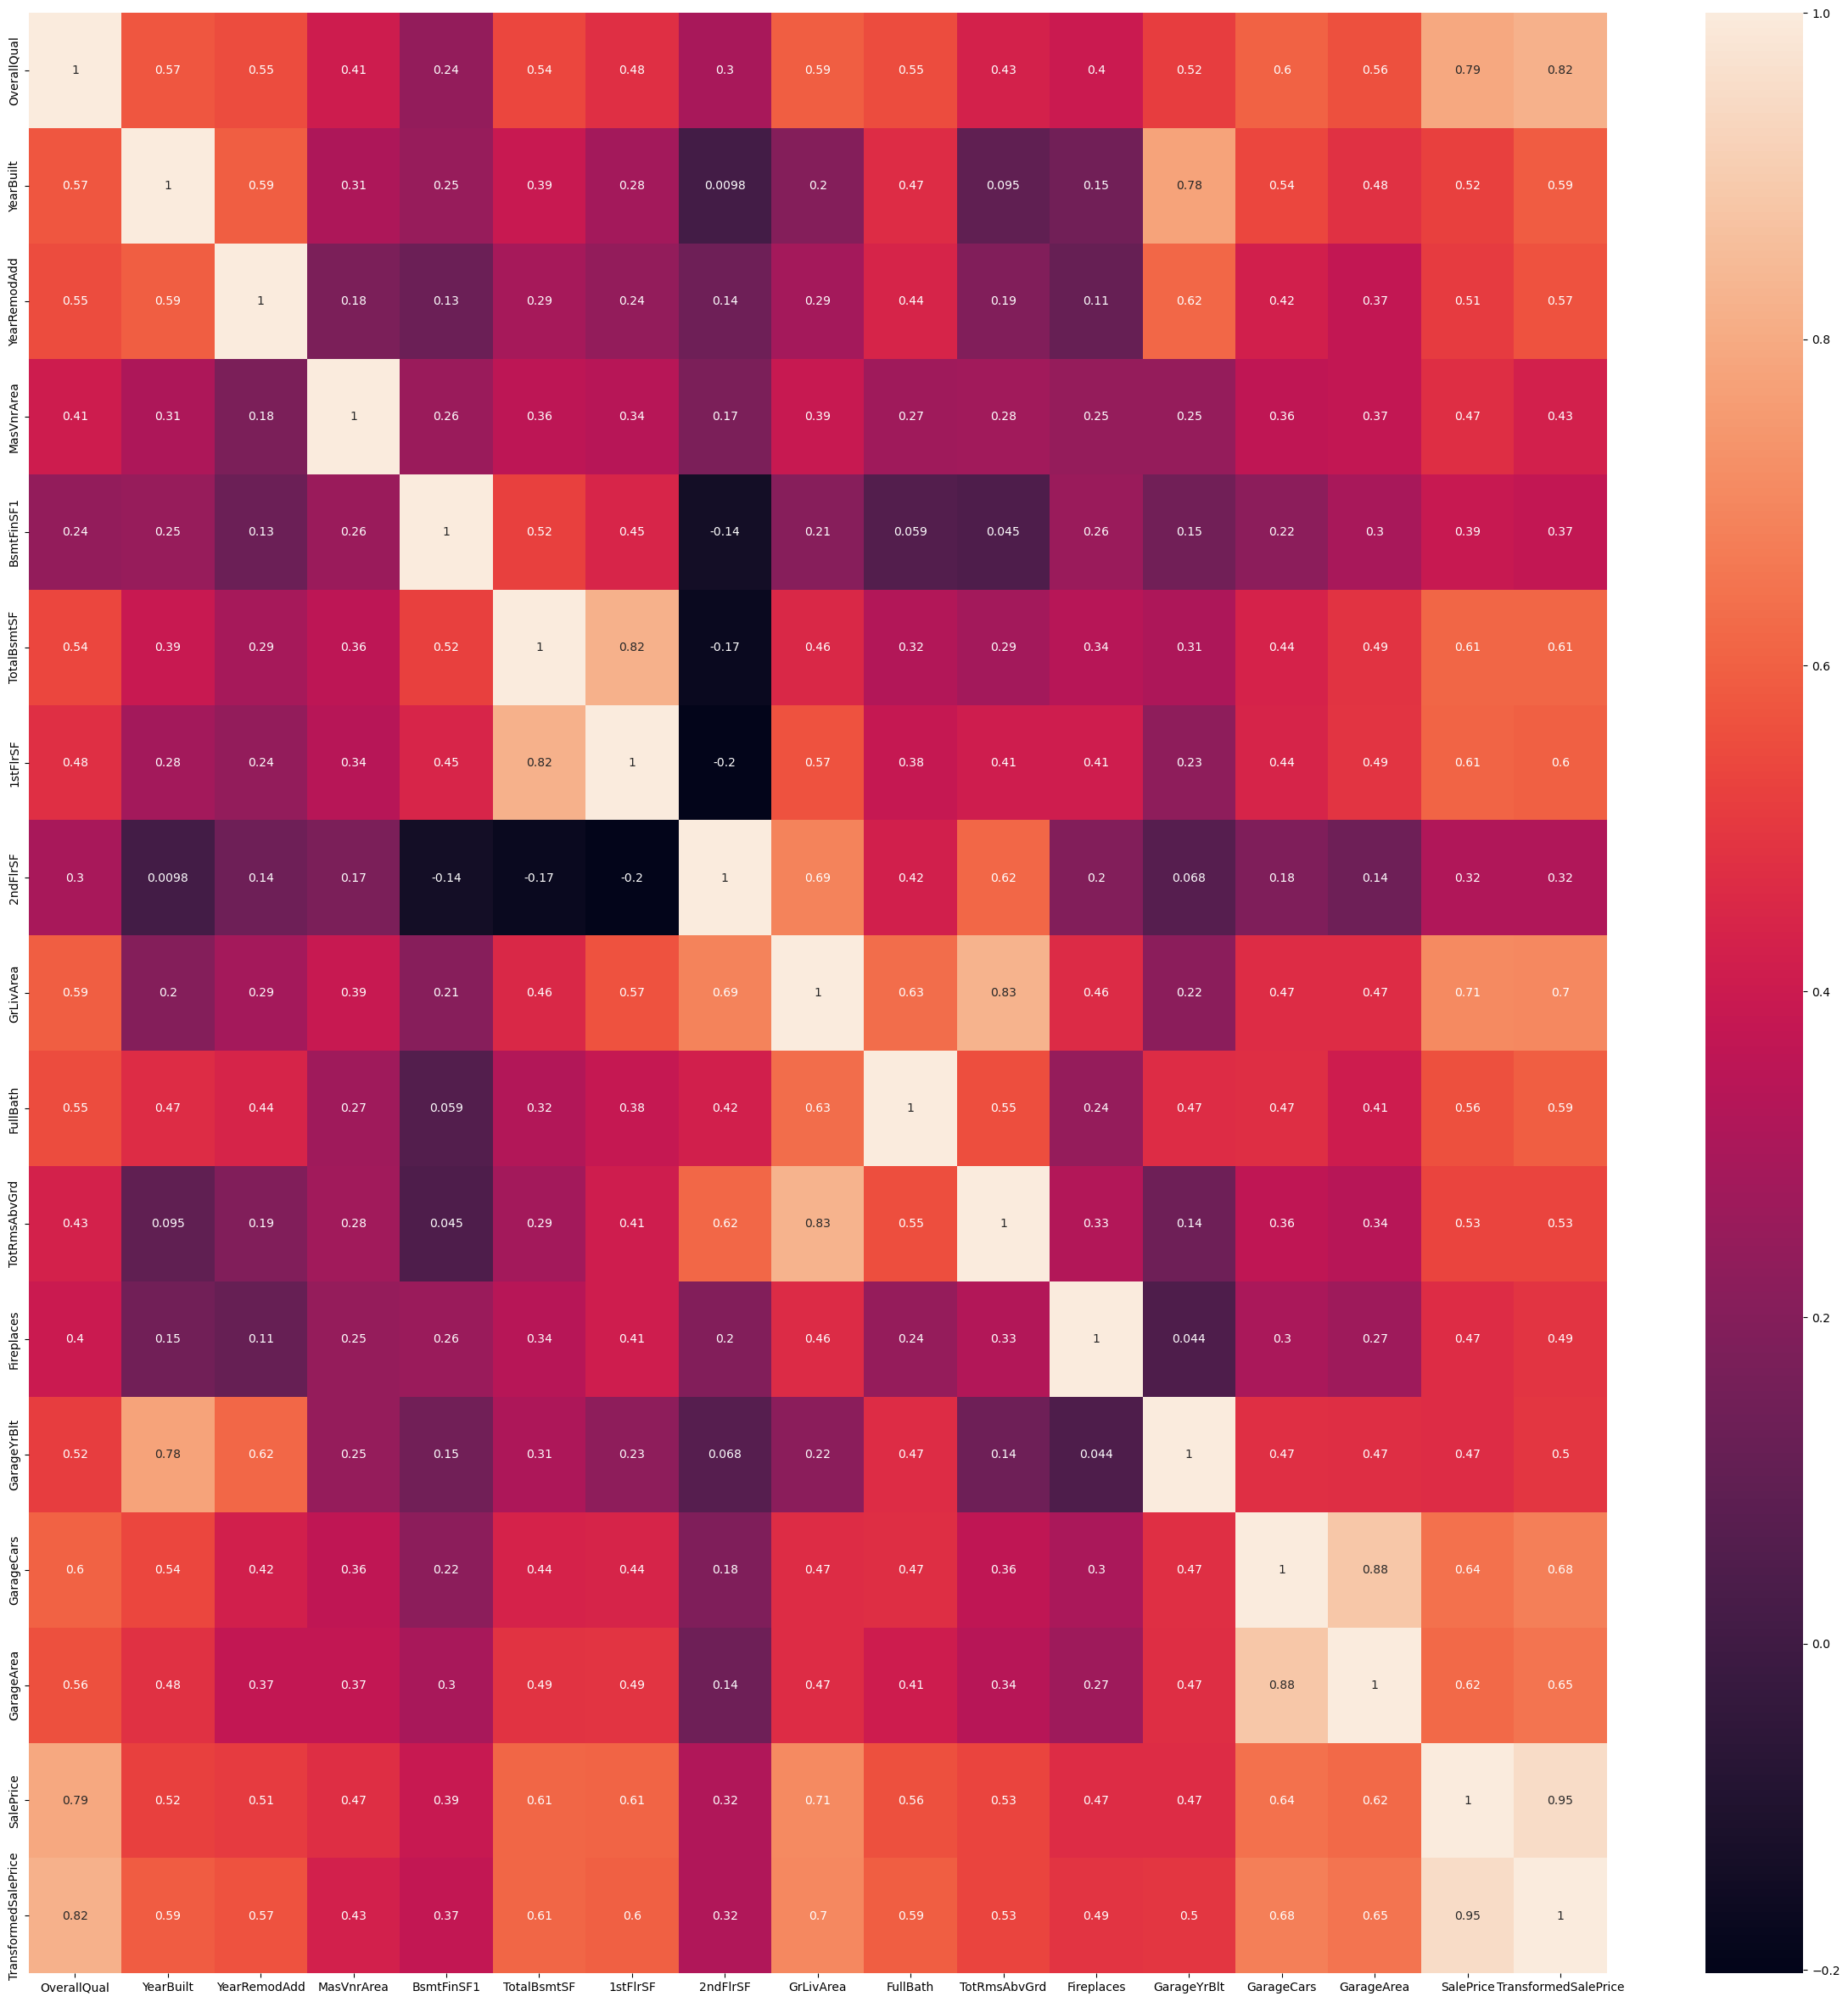

In [480]:
subset_columns = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
                  'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
                  'GrLivArea','FullBath', 'TotRmsAbvGrd', 'Fireplaces', 
                  'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice', 'TransformedSalePrice']

plt.figure(figsize=(30,30))
sns.heatmap(housing[subset_columns].corr(), annot=True)
plt.show()

##  Data Preparation

In [481]:
categorical_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

#### TODO: write conclusion on categorical and numerical feature analysis

In [482]:
for i in categorical_columns:
    feature_set = set(housing[i])
    for j in feature_set:
        feature_list = list(feature_set)
        housing.loc[housing[i] == j, i] = feature_list.index(j)

In [483]:
housing.drop(labels='SalePrice', axis=1, inplace=True)
housing.head()

MSSubClass MSZoning  LotArea Street Alley LotShape LandContour Utilities  \
0          60        4     8450      1     2        1           0         0   
1          20        4     9600      1     2        1           0         0   
2          60        4    11250      1     2        3           0         0   
3          70        4     9550      1     2        3           0         0   
4          60        4    14260      1     2        3           0         0   

  LotConfig LandSlope  ... 3SsnPorch ScreenPorch PoolArea PoolQC Fence  \
0         2         2  ...         0           0        0      3     4   
1         4         2  ...         0           0        0      3     4   
2         2         2  ...         0           0        0      3     4   
3         0         2  ...         0           0        0      3     4   
4         4         2  ...         0           0        0      3     4   

   MiscFeature  MiscVal  SaleType  SaleCondition TransformedSalePrice  
0            4        0         1              5            12.247694  
1            4        0         1              5            12.109011  
2            4        0         1              5            12.317167  
3            4        0         1              4            11.849398  
4            4        0         1              5            12.429216  

[5 rows x 76 columns]

In [484]:
def perf_plot_score_vs_alpha(train_score, test_score, 
                             alphas, x_string , y_string, 
                             x_log_transform):

    plt.plot(alphas, train_score)
    plt.plot(alphas, test_score)

    if (x_log_transform):
        plt.xscale('log')

    plt.xlabel(x_string)
    plt.ylabel(y_string)
    plt.legend(["train_score", "test_score"])
    plt.show()
    

def residual_plot(y, y_pred):
    residual = y-y_pred
    sns.displot(residual, kde=True)
    plt.show()
    
    plt.scatter(y_pred,residual)
    plt.axhline(y=0, color='r', linestyle=':')
    plt.show()
    
    fig, ax = plt.subplots()
    res = stats.probplot(residual, plot=plt)
    plt.show()
    
    print ("Training r2_score :: " + str(r2_score(y,y_pred)))
    print("skew :: " + str(residual.skew()))

    print ("kurtosis :: " + str(residual.kurt()))
    
    
def getPredictorCoeffs(columns, coefs):
    predictors = pd.DataFrame()
    predictors["predictors"] = columns
    predictors["predictor_coefs"] = coefs
    return predictors


def setUpRidgeRegressionModel(alpha, X_train, Y_train, X_test, Y_test):
    rr_model = Ridge(alpha=alpha)
    rr_model.fit(X_train, Y_train)
    
    residual_plot(Y_train, rr_model.predict(X_train))
    print ("alpha ::" + str(alpha))
    print("r2_test_score :: " + str(r2_score(Y_test, rr_model.predict(X_test))))

    rr_predictors = getPredictorCoeffs(X_train.columns, rr_model.coef_)
    return rr_predictors

def setUpLassoRegressionModel(alpha, X_train, Y_train, X_test, Y_test):
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, Y_train)
    
    residual_plot(Y_train, lasso_model.predict(X_train))
    print ("alpha ::" + str(alpha))
    print("r2_test_score :: " + str(r2_score(Y_test, lasso_model.predict(X_test))))
    
    lasso_predictors = getPredictorCoeffs(X_train.columns, lasso_model.coef_)
    return lasso_predictors

In [485]:
scaler = MinMaxScaler(copy=False)
df = housing.copy()

Y = df.pop("TransformedSalePrice")

transform = True

if transform:
    X = pd.DataFrame(scaler.fit_transform(df))
    X.columns = df.columns
else:
    X = df



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.70, test_size=0.30, random_state=50)

In [486]:
X_train.head(5)

MSSubClass  MSZoning   LotArea  Street  Alley  LotShape  LandContour  \
175     0.000000       1.0  0.052887     1.0    1.0  0.333333     0.000000   
710     0.058824       1.0  0.013228     1.0    1.0  1.000000     0.000000   
1147    0.294118       1.0  0.050013     1.0    1.0  0.333333     0.333333   
841     0.294118       0.0  0.042721     1.0    0.0  0.333333     0.000000   
220     0.000000       1.0  0.035944     1.0    1.0  1.000000     0.000000   

      Utilities  LotConfig  LandSlope  ...  EnclosedPorch  3SsnPorch  \
175         0.0        0.0        1.0  ...       0.070652        0.0   
710         0.0        0.5        1.0  ...       0.000000        0.0   
1147        0.0        0.5        1.0  ...       0.000000        0.0   
841         0.0        0.5        1.0  ...       0.123188        0.0   
220         0.0        0.5        1.0  ...       0.000000        0.0   

      ScreenPorch  PoolArea  PoolQC  Fence  MiscFeature  MiscVal  SaleType  \
175           0.0       0.0     1.0    0.0          1.0      0.0     0.125   
710           0.0       0.0     1.0    1.0          1.0      0.0     0.125   
1147          0.0       0.0     1.0    1.0          1.0      0.0     0.125   
841           0.0       0.0     1.0    1.0          1.0      0.0     0.125   
220           0.0       0.0     1.0    1.0          1.0      0.0     0.000   

      SaleCondition  
175             1.0  
710             1.0  
1147            1.0  
841             1.0  
220             0.0  

[5 rows x 75 columns]

In [487]:
X.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Encl

In [488]:
alpha_candidates=[0.000000001,0.00000001,0.0000001,0.000001,0.00001,0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 520, 540, 560, 580, 600, 700, 800, 900, 1000 ]
params = {'alpha': alpha_candidates }

In [489]:
# We create a DataFrame to hold model performance runs for final decision making and model selection
cols = {'model':[], 'alpha':[], 'train_r2':[], 'test_r2':[]}
model_perf_df = pd.DataFrame(data=cols)

### Ridge Regression Model

In [490]:
rr_model = Ridge()

rr_model_cv = GridSearchCV(estimator=rr_model, param_grid=params, 
                           scoring=[ 'neg_mean_absolute_error', 'r2'],
                           return_train_score= True, 
                           cv=5, verbose=1, refit='r2')

rr_model_cv.fit(X_train,Y_train)

Fitting 5 folds for each of 41 candidates, totalling 205 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                                   0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, ...]},
             refit='r2', return_train_score=True,
             scoring=['neg_mean_absolute_error', 'r2'], verbose=1)

In [491]:
print(rr_model_cv.best_params_)
print(rr_model_cv.best_score_)

{'alpha': 5.0}
0.844884472361171


In [492]:
results_rr_df = pd.DataFrame(rr_model_cv.cv_results_)

In [493]:
results_rr_df[['param_alpha', 'mean_train_r2', 'mean_test_r2', 'mean_train_neg_mean_absolute_error', 'mean_test_neg_mean_absolute_error']]

param_alpha  mean_train_r2  mean_test_r2  \
0          0.0       0.910958      0.784259   
1          0.0       0.910958      0.784259   
2          0.0       0.910958      0.784259   
3     0.000001       0.910958      0.784260   
4      0.00001       0.910958      0.784266   
5       0.0001       0.910958      0.784326   
6        0.001       0.910957      0.784913   
7         0.01       0.910859      0.789967   
8         0.05       0.909765      0.802842   
9          0.1       0.908230      0.810395   
10         0.2       0.905810      0.817650   
11         0.3       0.904110      0.821686   
12         0.4       0.902838      0.824549   
13         0.5       0.901823      0.826805   
14         0.6       0.900973      0.828681   
15         0.7       0.900234      0.830289   
16         0.8       0.899573      0.831693   
17         0.9       0.898970      0.832934   
18         1.0       0.898410      0.834043   
19         2.0       0.893930      0.840786   
20         3.0       0.890266      0.843607   
21         4.0       0.886963      0.844702   
22         5.0       0.883906      0.844884   
23         6.0       0.881045      0.844536   
24         7.0       0.878346      0.843860   
25         8.0       0.875788      0.842975   
26         9.0       0.873351      0.841953   
27        10.0       0.871021      0.840839   
28          20       0.851653      0.828382   
29          50       0.811217      0.794729   
30         100       0.762699      0.750104   
31         500       0.546104      0.539745   
32         520       0.538660      0.532408   
33         540       0.531414      0.525264   
34         560       0.524359      0.518305   
35         580       0.517487      0.511523   
36         600       0.510789      0.504912   
37         700       0.479706      0.474199   
38         800       0.452128      0.446913   
39         900       0.427494      0.422515   
40        1000       0.405360      0.400576   

    mean_train_neg_mean_absolute_error  mean_test_neg_mean_absolute_error  
0                            -0.083308                          -0.098625  
1                            -0.083308                          -0.098625  
2                            -0.083308                          -0.098625  
3                            -0.083308                          -0.098625  
4                            -0.083308                          -0.098624  
5                            -0.083308                          -0.098621  
6                            -0.083310                          -0.098591  
7                            -0.083369                          -0.098368  
8                            -0.083755                          -0.097971  
9                            -0.084189                          -0.097788  
10                           -0.084898                          -0.097837  
11                           -0.085443                          -0.097951  
12                           -0.085886                          -0.098007  
13                           -0.086251                          -0.098077  
14                           -0.086568                          -0.098176  
15                           -0.086858                          -0.098270  
16                           -0.087130                          -0.098362  
17                           -0.087384                          -0.098440  
18                           -0.087625                          -0.098518  
19                           -0.089619                          -0.099416  
20                           -0.091269                          -0.100254  
21                           -0.092748                          -0.101186  
22                           -0.094097                          -0.102152  
23                           -0.095382                          -0.103065  
24                           -0.096607                          -0.103974  
25                           -0.097763              

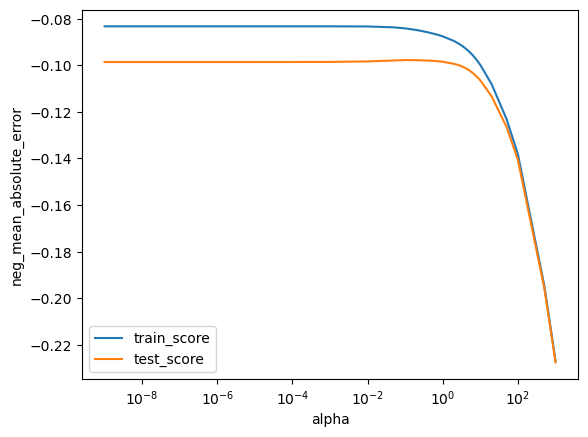

In [494]:
perf_plot_score_vs_alpha(results_rr_df.mean_train_neg_mean_absolute_error, results_rr_df.mean_test_neg_mean_absolute_error, 
                             results_rr_df.param_alpha, "alpha" , 'neg_mean_absolute_error', 
                             True)

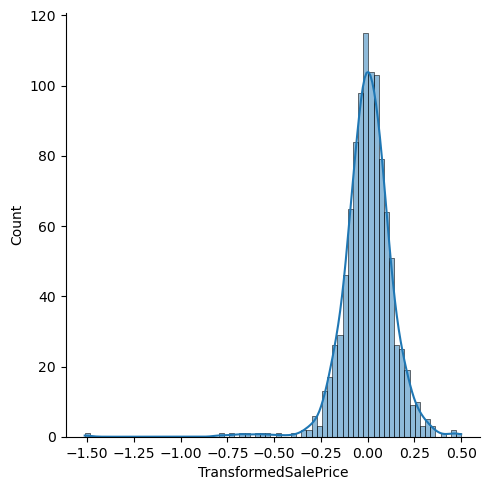

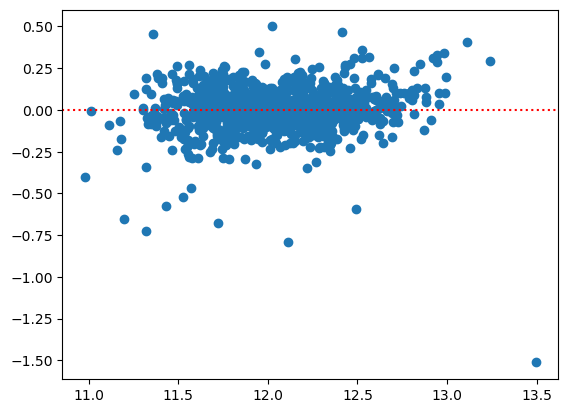

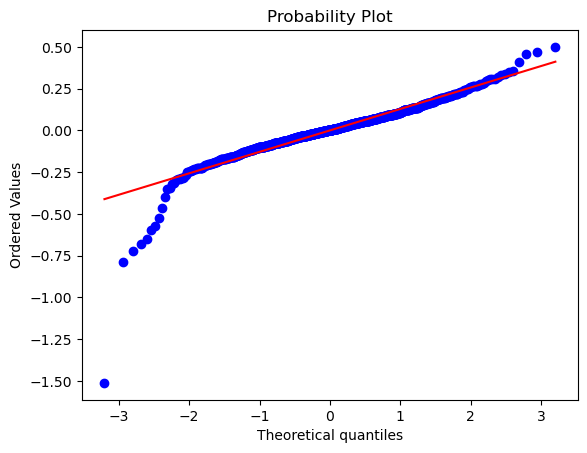

Training r2_score :: 0.8825204409838255
skew :: -1.9210755803381265
kurtosis :: 17.99402756810568
alpha ::5.0
r2_test_score :: 0.8493724515832943


In [495]:
rr_predictors = setUpRidgeRegressionModel(5.0, X_train, Y_train, X_test, Y_test)

In [496]:
model_perf_df.loc[len(model_perf_df.index)] = ["ridge_regression", 5, 0.8825, 0.8493]

## LASSO Model

In [497]:
lasso_model = Lasso()

lasso_model_cv = GridSearchCV(estimator=lasso_model, 
                           param_grid=params, scoring=[ 'neg_mean_absolute_error', 'r2'],
                           return_train_score=True, 
                           cv=5, refit='r2',
                           verbose=1)
lasso_model_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 41 candidates, totalling 205 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                                   0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, ...]},
             refit='r2', return_train_score=True,
             scoring=['neg_mean_absolute_error', 'r2'], verbose=1)

In [498]:
lasso_model_cv.best_estimator_

Lasso(alpha=0.001)

In [499]:
lasso_cv_results_df = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results_df[['param_alpha', 'mean_train_r2', 'mean_test_r2', 'mean_train_neg_mean_absolute_error', 'mean_test_neg_mean_absolute_error']]

param_alpha  mean_train_r2  mean_test_r2  \
0          0.0       0.910958      0.784264   
1          0.0       0.910958      0.784269   
2          0.0       0.910958      0.784316   
3     0.000001       0.910957      0.784794   
4      0.00001       0.910914      0.789513   
5       0.0001       0.909589      0.815909   
6        0.001       0.885674      0.841912   
7         0.01       0.769741      0.757815   
8         0.05       0.320038      0.314024   
9          0.1       0.064753      0.062260   
10         0.2       0.000000     -0.002985   
11         0.3       0.000000     -0.002985   
12         0.4       0.000000     -0.002985   
13         0.5       0.000000     -0.002985   
14         0.6       0.000000     -0.002985   
15         0.7       0.000000     -0.002985   
16         0.8       0.000000     -0.002985   
17         0.9       0.000000     -0.002985   
18         1.0       0.000000     -0.002985   
19         2.0       0.000000     -0.002985   
20         3.0       0.000000     -0.002985   
21         4.0       0.000000     -0.002985   
22         5.0       0.000000     -0.002985   
23         6.0       0.000000     -0.002985   
24         7.0       0.000000     -0.002985   
25         8.0       0.000000     -0.002985   
26         9.0       0.000000     -0.002985   
27        10.0       0.000000     -0.002985   
28          20       0.000000     -0.002985   
29          50       0.000000     -0.002985   
30         100       0.000000     -0.002985   
31         500       0.000000     -0.002985   
32         520       0.000000     -0.002985   
33         540       0.000000     -0.002985   
34         560       0.000000     -0.002985   
35         580       0.000000     -0.002985   
36         600       0.000000     -0.002985   
37         700       0.000000     -0.002985   
38         800       0.000000     -0.002985   
39         900       0.000000     -0.002985   
40        1000       0.000000     -0.002985   

    mean_train_neg_mean_absolute_error  mean_test_neg_mean_absolute_error  
0                            -0.083308                          -0.098624  
1                            -0.083308                          -0.098623  
2                            -0.083307                          -0.098620  
3                            -0.083305                          -0.098581  
4                            -0.083310                          -0.098228  
5                            -0.084235                          -0.096737  
6                            -0.094438                          -0.101074  
7                            -0.137967                          -0.140934  
8                            -0.242083                          -0.243088  
9                            -0.297239                          -0.297604  
10                           -0.311465                          -0.311626  
11                           -0.311465                          -0.311626  
12                           -0.311465                          -0.311626  
13                           -0.311465                          -0.311626  
14                           -0.311465                          -0.311626  
15                           -0.311465                          -0.311626  
16                           -0.311465                          -0.311626  
17                           -0.311465                          -0.311626  
18                           -0.311465                          -0.311626  
19                           -0.311465                          -0.311626  
20                           -0.311465                          -0.311626  
21                           -0.311465                          -0.311626  
22                           -0.311465                          -0.311626  
23                           -0.311465                          -0.311626  
24                           -0.311465                          -0.311626  
25                           -0.311465              

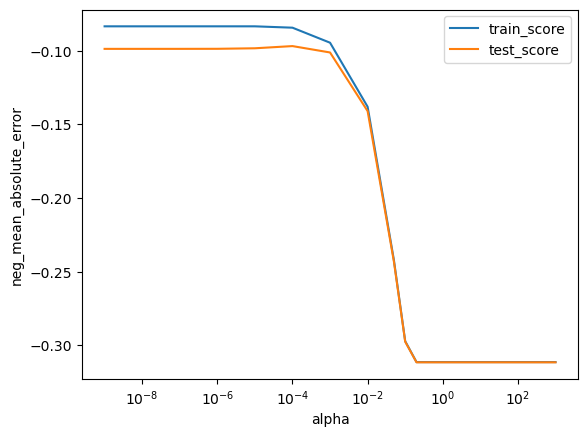

In [500]:
perf_plot_score_vs_alpha(lasso_cv_results_df.mean_train_neg_mean_absolute_error, lasso_cv_results_df.mean_test_neg_mean_absolute_error, 
                             lasso_cv_results_df.param_alpha, "alpha" , 'neg_mean_absolute_error', 
                             True)

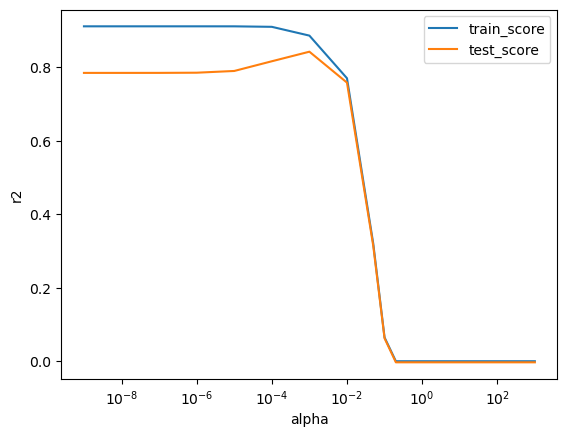

In [501]:
perf_plot_score_vs_alpha(lasso_cv_results_df.mean_train_r2, lasso_cv_results_df.mean_test_r2,
                             lasso_cv_results_df.param_alpha, "alpha" , 'r2', 
                             True)

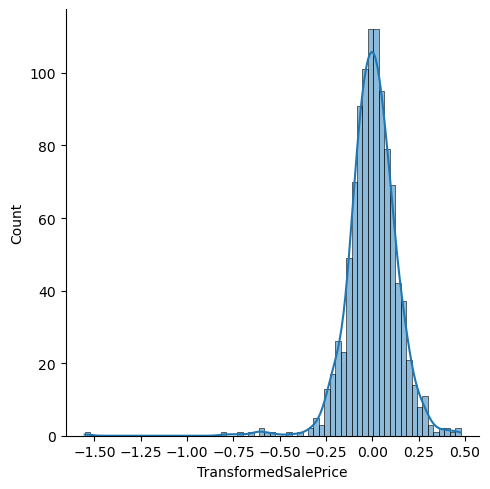

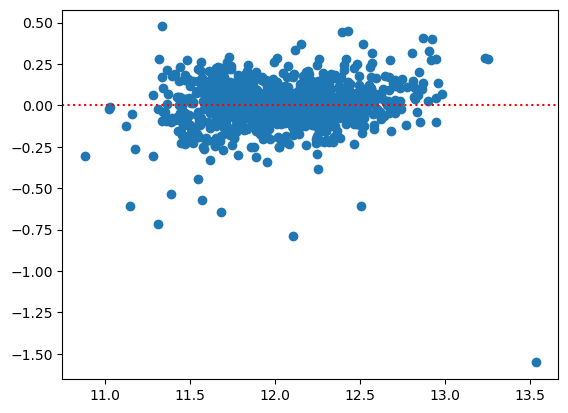

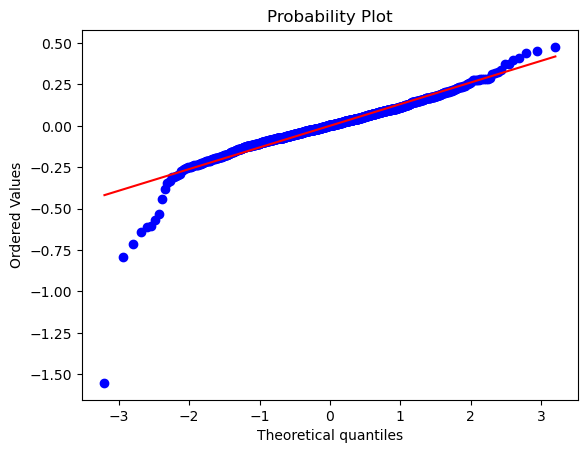

Training r2_score :: 0.879330808495274
skew :: -1.8962254211718583
kurtosis :: 18.200611273084075
alpha ::0.001
r2_test_score :: 0.8510408541991847


In [502]:
lasso_predictors = setUpLassoRegressionModel(0.001, X_train, Y_train, X_test, Y_test)

In [503]:
model_perf_df.loc[len(model_perf_df.index)] = ["lasso_regression", 0.001, 0.8793, 0.8510]

In [504]:
model_perf_df

model  alpha  train_r2  test_r2
0  ridge_regression  5.000    0.8825   0.8493
1  lasso_regression  0.001    0.8793   0.8510

## Model Selection Notes

- Given the above model performance metrics we can say that lasso performed better
- lasso model performed better and had a better test r2 score, i.e they are able to better explain the variance in test data given the training data

- We choose the below model as our choice for this excercise
    - ridge regression (alpha = 5.0)
    - scaled lasso regression (alpha = 0.001)
    
- below we rerun the model for the above alpha and double alpha and find the most import predictors

In [505]:
scaler = MinMaxScaler(copy=False)
df = housing.copy()
Y = df.pop("TransformedSalePrice")
X = pd.DataFrame(scaler.fit_transform(df))
X.columns = df.columns

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.70, test_size=0.30, random_state=50,shuffle=True)

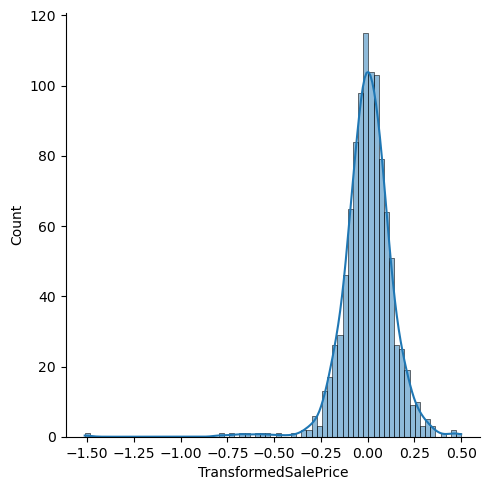

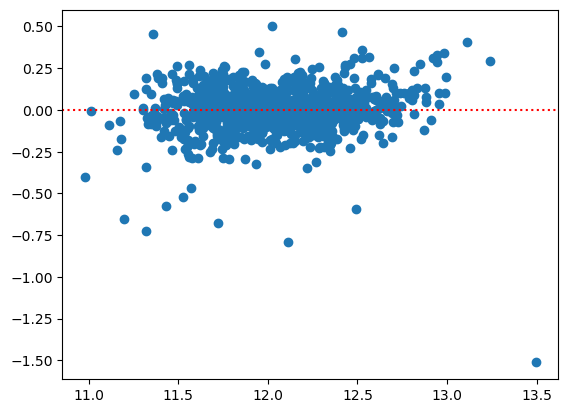

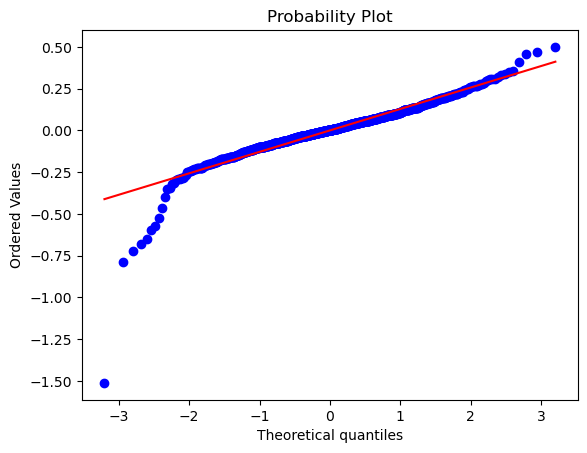

Training r2_score :: 0.8825204409838255
skew :: -1.9210755803381265
kurtosis :: 17.99402756810568
alpha ::5.0
r2_test_score :: 0.8493724515832943


predictors  predictor_coefs
15   OverallQual         0.473176
16   OverallCond         0.274718
43     GrLivArea         0.262262
41      1stFlrSF         0.260277
58    GarageCars         0.218832
51  TotRmsAbvGrd         0.199606
46      FullBath         0.173527
53    Fireplaces         0.161972
44  BsmtFullBath         0.158441
69        PoolQC         0.155293

In [506]:
rr_predictors = setUpRidgeRegressionModel(5.0, X_train, Y_train, X_test, Y_test)
rr_predictors.sort_values(by="predictor_coefs", ascending=False).head(10)

The above table indicated the top 10 most import predictors with alpha = 5.0 for Ridge Regression

#### Lasso model with alpha = 0.001

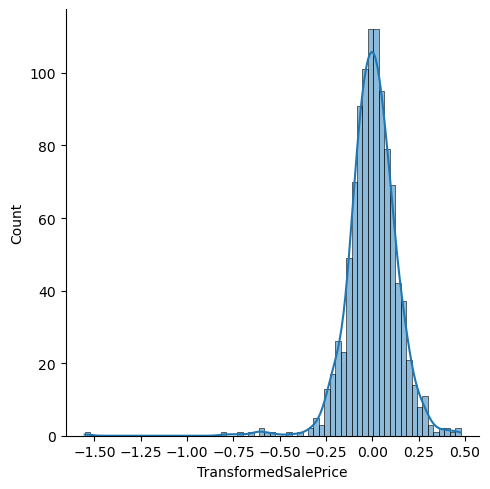

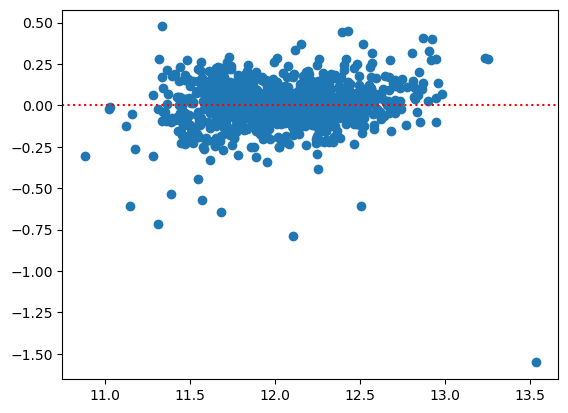

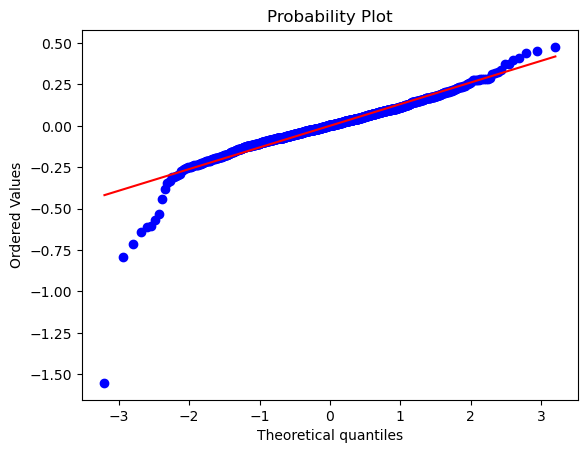

Training r2_score :: 0.879330808495274
skew :: -1.8962254211718583
kurtosis :: 18.200611273084075
alpha ::0.001
r2_test_score :: 0.8510408541991847


predictors  predictor_coefs
43     GrLivArea         0.839994
15   OverallQual         0.697493
16   OverallCond         0.298427
58    GarageCars         0.295750
17     YearBuilt         0.200949
44  BsmtFullBath         0.188629
41      1stFlrSF         0.163860
53    Fireplaces         0.150166
46      FullBath         0.129990
51  TotRmsAbvGrd         0.093386

In [507]:
lasso_predictors = setUpLassoRegressionModel(0.001, X_train, Y_train, X_test, Y_test)
lasso_predictors.sort_values(by="predictor_coefs", ascending=False).head(10)

The above table indicates top 10 predictors with lasso model and alpha = 0.001

### Model with double value of alpha (alpha =10) Ridge Regression for answering Assignment Part-2 Questions

In [508]:
# We create a DataFrame to hold model performance runs for final decision making and model selection
cols = {'model':[], 'alpha':[], 'train_r2':[], 'test_r2':[]}
model_perf_df = pd.DataFrame(data=cols)

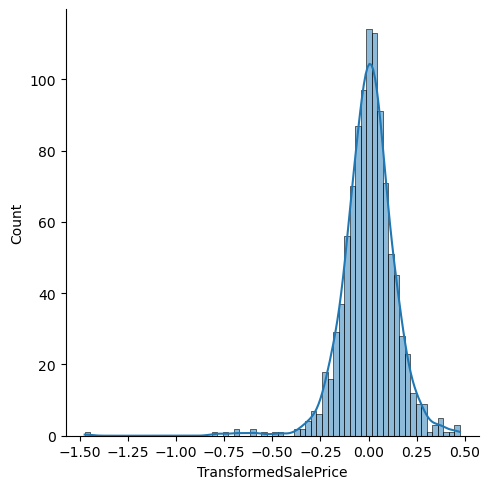

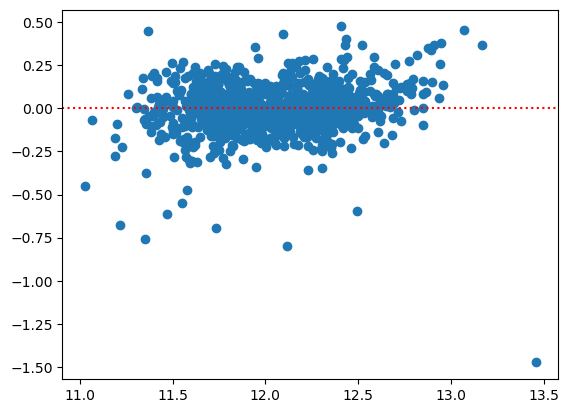

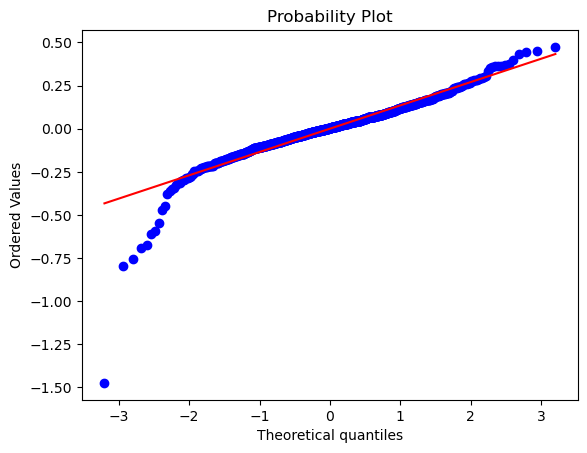

Training r2_score :: 0.8721657741946212
skew :: -1.665243824165914
kurtosis :: 14.283369115611258
alpha ::10.0
r2_test_score :: 0.8407425385147493


predictors  predictor_coefs
15   OverallQual         0.385610
43     GrLivArea         0.214763
16   OverallCond         0.209150
41      1stFlrSF         0.204608
58    GarageCars         0.196027
51  TotRmsAbvGrd         0.189321
46      FullBath         0.171887
53    Fireplaces         0.167896
44  BsmtFullBath         0.143415
36   TotalBsmtSF         0.132804

In [509]:
rr_predictors = setUpRidgeRegressionModel(10.0, X_train, Y_train, X_test, Y_test)
rr_predictors.sort_values(by="predictor_coefs", ascending=False).head(10)

The above table indicated the top 10 most import predictors with alpha = 10.0

In [510]:
model_perf_df.loc[len(model_perf_df.index)] = ["ridge_regression", 10, 0.8721, 0.8407]

#### Lasso model with alpha = 0.002 for answering Assignment Part-2 Questions-2

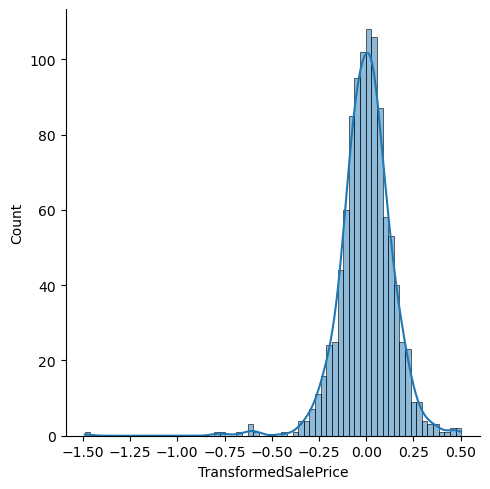

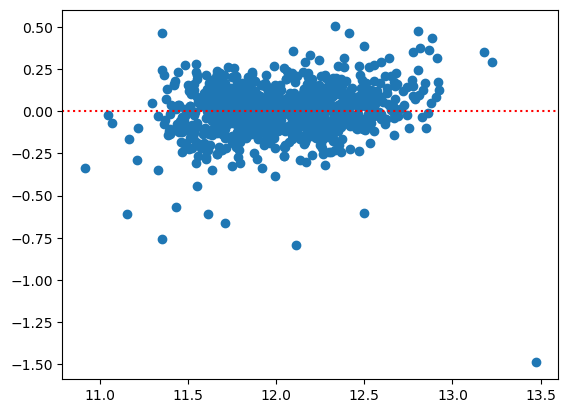

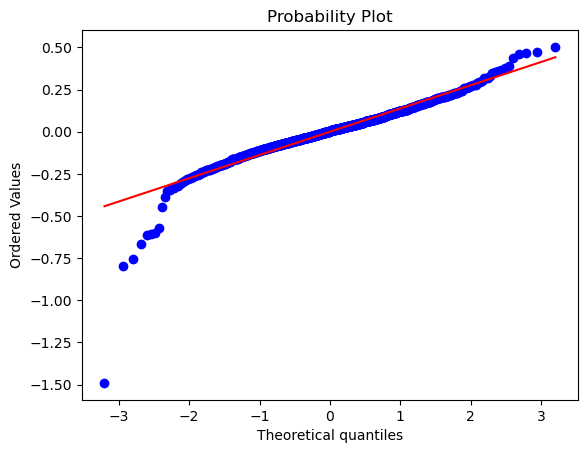

Training r2_score :: 0.8679633233624517
skew :: -1.5406282662363837
kurtosis :: 13.591859591038933
alpha ::0.002
r2_test_score :: 0.8455928521969032


predictors  predictor_coefs
43     GrLivArea         0.758871
15   OverallQual         0.716733
58    GarageCars         0.305513
16   OverallCond         0.189136
44  BsmtFullBath         0.168356
53    Fireplaces         0.168216
17     YearBuilt         0.140663
46      FullBath         0.122541
18  YearRemodAdd         0.105530
41      1stFlrSF         0.092855

In [511]:
lasso_predictors = setUpLassoRegressionModel(0.002, X_train, Y_train, X_test, Y_test)
lasso_predictors.sort_values(by="predictor_coefs", ascending=False).head(10)

The above table indicates top 10 predictors with lasso model and alpha = 0.002

In [512]:
model_perf_df.loc[len(model_perf_df.index)] = ["lasso_regression", 0.002, 0.8679, 0.8455]

In [513]:
model_perf_df

model   alpha  train_r2  test_r2
0  ridge_regression  10.000    0.8721   0.8407
1  lasso_regression   0.002    0.8679   0.8455

### Lasso Model for Assignment-2 Question Part-3

In [514]:
scaler = MinMaxScaler(copy=False)
df = housing.copy()
Y = df.pop("TransformedSalePrice")
X = pd.DataFrame(scaler.fit_transform(df))
X.columns = df.columns

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.70, test_size=0.30, random_state=50,shuffle=True)

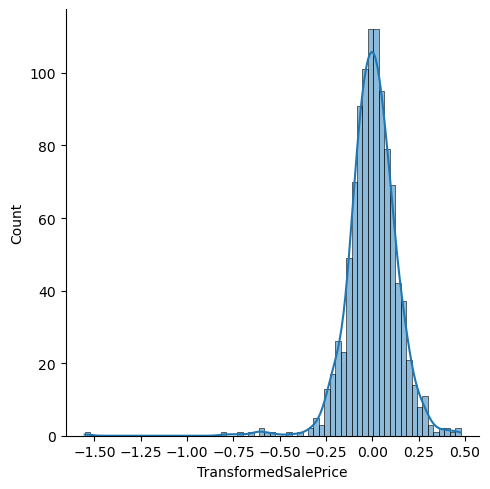

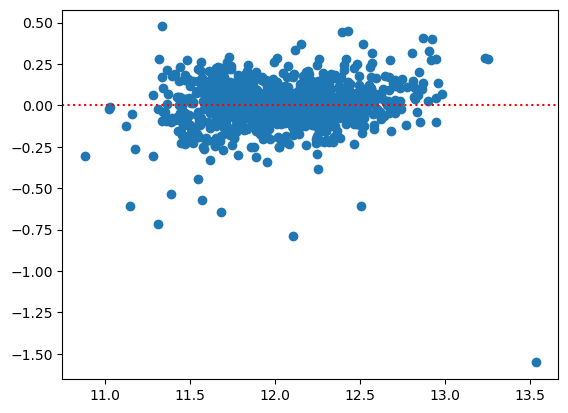

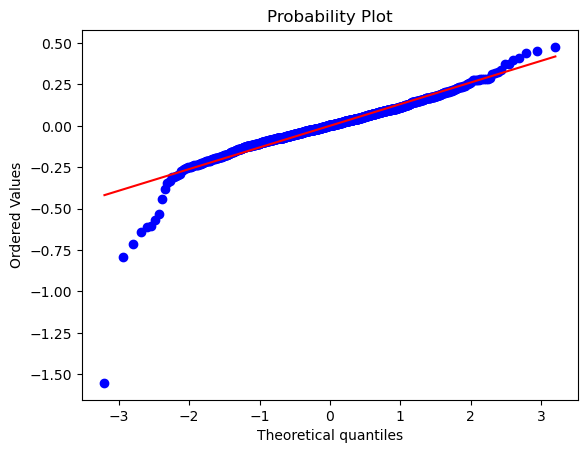

Training r2_score :: 0.879330808495274
skew :: -1.8962254211718583
kurtosis :: 18.200611273084075
alpha ::0.001
r2_test_score :: 0.8510408541991847


predictors  predictor_coefs
43     GrLivArea         0.839994
15   OverallQual         0.697493
16   OverallCond         0.298427
58    GarageCars         0.295750
17     YearBuilt         0.200949
44  BsmtFullBath         0.188629
41      1stFlrSF         0.163860
53    Fireplaces         0.150166
46      FullBath         0.129990
51  TotRmsAbvGrd         0.093386

In [515]:
lasso_predictors = setUpLassoRegressionModel(0.001, X_train, Y_train, X_test, Y_test)
lasso_predictors.sort_values(by="predictor_coefs", ascending=False).head(10)

In [516]:
features_with_alpha_001 = ["GrLivArea", "OverallQual", "OverallCond", "GarageCars", "YearBuilt"]

In [517]:
scaler = MinMaxScaler(copy=False)
df = housing.copy()
df.drop(labels=features_with_alpha_001, axis=1, inplace=True)
Y = df.pop("TransformedSalePrice")
X = pd.DataFrame(scaler.fit_transform(df))
X.columns = df.columns

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.70, test_size=0.30, random_state=50,shuffle=True)

- Dropping the top 5 features and trying with same alpha above

In [518]:
lasso_model = Lasso()

lasso_model_cv = GridSearchCV(estimator=lasso_model, 
                           param_grid=params, scoring=[ 'neg_mean_absolute_error', 'r2'],
                           return_train_score=True, 
                           cv=5, refit='r2',
                           verbose=1)
lasso_model_cv.fit(X_train, Y_train)
lasso_model_cv.best_estimator_

Fitting 5 folds for each of 41 candidates, totalling 205 fits


Lasso(alpha=0.001)

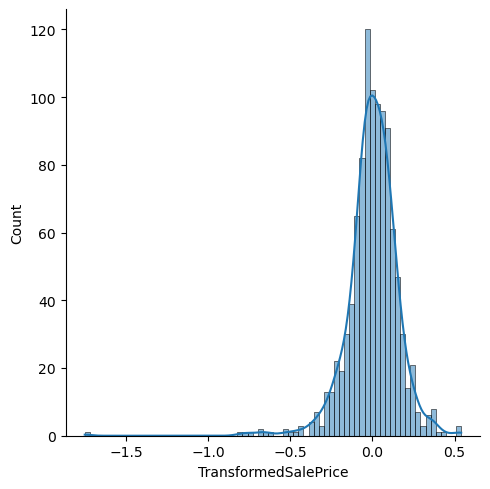

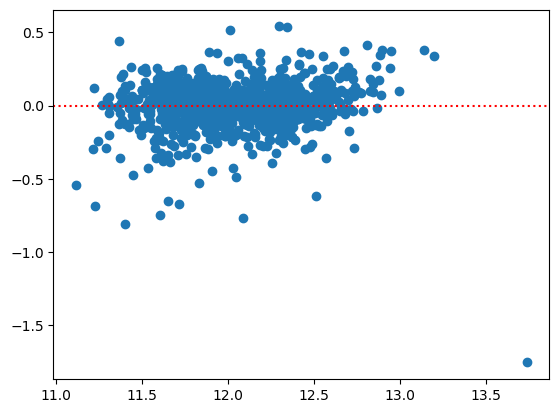

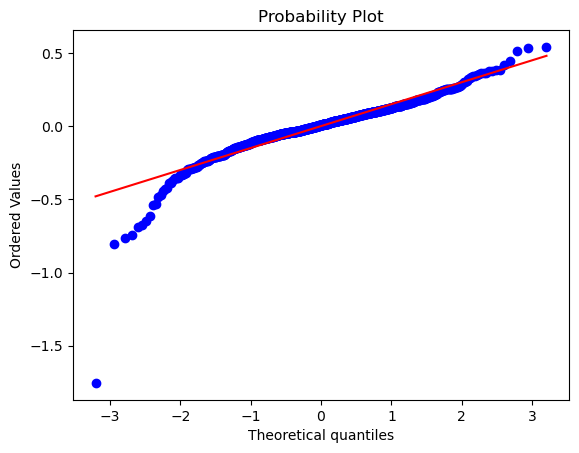

Training r2_score :: 0.8408667613954102
skew :: -1.9445341196719432
kurtosis :: 16.989595602876946
alpha ::0.001
r2_test_score :: 0.8062044584418467


predictors  predictor_coefs
38      1stFlrSF         0.811402
54    GarageArea         0.343698
39      2ndFlrSF         0.298478
33   TotalBsmtSF         0.230236
42      FullBath         0.226564
49    Fireplaces         0.202427
15  YearRemodAdd         0.186212
64        PoolQC         0.179961
47  TotRmsAbvGrd         0.173536
40  BsmtFullBath         0.146419

In [519]:
lasso_predictors = setUpLassoRegressionModel(0.001, X_train, Y_train, X_test, Y_test)
lasso_predictors.sort_values(by="predictor_coefs", ascending=False).head(10)